<p style="color:blue;text-align:center;font-size:250%">Санкт-Петербургский государственный </p>
<p style="color:blue;text-align:center;font-size:250%">архитектурно-строительный  университет</p>
<br>
<p style="color:blue;text-align:center;font-size:150%"> Стажировка</p>  <p style="color:blue;text-align:center;font-size:200%"> Исследовательский анализ данных</p> <br><br>
<p style="color:blue;text-align:start;font-size:150%"> Исполнитель: Григорьева Елена Владимировна</p> <br>

## Задачи:
    Проанализировать данные приемной кампании 2022 года. 
    Содержание отчета:
1.	Общая информация о приемной кампании:
•	Дата начала и окончания приема документов
•	Общее количество заявлений, количество заявлений по факультетам и направлениям подготовки
•	Количество уникальных абитуриентов
•	Количество заявлений на одного абитуриента, среднее, медиана (используйте результаты метода describe())
•	Распределение по способам подачи документов
•	Распределение по основаниям поступления, уровням подготовки, образованию
•	Распределение по регионам, гражданству
•	Количество согласий по направлениям подготовки до момента публикации конкурсных списков
•	Промежуточный вывод
Обратите внимание, что часть данных должна приводиться по уникальным абитуриентам!

2.	Портрет абитуриента 
Выберите 2 категории из предложенных и сравните их портреты:
•	Зачисленный на бюджет абитуриент
•	Зачисленный на контракт абитуриент
•	Ушедший абитуриент (обратите внимание, что нужно оставить только тех, кто не был зачислен ни по одному направлению подготовки)

Состав портрета: пол, возраст, где учился, где живет (Санкт-Петербург или регионы, может какой-то регион в среднем более активен), какие направления подготовки выбирал (т.е. самые популярные направления подготовки), сколько подал заявлений, каким способом, какие у него баллы вступительных испытаний. Что еще важное можно сказать о нем?

3.	Общий вывод


In [1]:
#Импорт библиотек

import pandas as pd
import numpy as np

#подключим библиотеки для форматирования даты
from datetime import datetime

#скроем информацию об устаревших модулях
import warnings
warnings.simplefilter("ignore")

import statistics

#подключим библиотеки для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from pylab import rcParams
sns.set_style("whitegrid", {'axes.grid' : True})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
#Исходный файл для анализа:
excel_data_df = pd.read_excel('admission_декабрь.xls')

In [3]:
 excel_data_df.head()

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,530-013 41,04.07.2022,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN


In [4]:
excel_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29470 entries, 0 to 29469
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Уникальный код                         29470 non-null  object
 1   Дата подачи заявления                  29470 non-null  object
 2   Сумма баллов                           29470 non-null  int64 
 3   Сумма баллов за инд.дост.(конкурсные)  29470 non-null  int64 
 4   Пол                                    29470 non-null  object
 5   Дата рождения                          29470 non-null  object
 6   Гражданство                            29453 non-null  object
 7   Основание поступления                  29470 non-null  object
 8   Категория приема                       29470 non-null  object
 9   Форма обучения                         29470 non-null  object
 10  Уровень подготовки                     29470 non-null  object
 11  Направление\спе

### Нулевые значения содержат признаки: Гражданство, Регион по прописке, Дата согласия на зачисление. Следует учесть при работе с данными. Признаки, содержащие дату, имеют тип Объект - приведем к типу Даты.

In [5]:
#рассмотрим уникальные значения
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in excel_data_df.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(excel_data_df[i].unique()))+'\033[0m')
    print(excel_data_df[i].unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак Уникальный код имеет 6237 следующих уникальных значений:
['702-875 69' '530-013 41' '853-207 15' ... '442-872 56' '932-664 04'
 '149-613 49']
---------------------------------------------------------------------------------
Признак Дата подачи заявления имеет 64 следующих уникальных значений:
['30.07.2022' '04.07.2022' '22.06.2022' '20.07.2022' '24.06.2022'
 '22.07.2022' '05.07.2022' '29.06.2022' '25.07.2022' '08.07.2022'
 '01.07.2022' '30.06.2022' '14.07.2022' '07.07.2022' '11.07.2022'
 '09.07.2022' '23.06.2022' '15.07.2022' '28.06.2022' '19.07.2022'
 '26.07.2022' '21.07.2022' '28.07.2022' '13.07.2022' '06.07.2022'
 '12.07.2022' '27.07.2022' '31.07.2022' '18.07.2022' '27.06.2022'
 '21.06.2022' '20.06.2022' '29.07.2022' '02.08.2022' '01.08.2022'
 '08.08.2022' '04.08.2022' '15.08.2022' '19.08.2022' '23.07.2022'
 '12.08.2022' '02.07.2022' '17.07.2022' '09.08.2022' '03.08.2022'
 '24.07.2022' '10.07.2022' '17.08.2022' '10.08.2022' '16.07.2022'
 '24.08.2022' '18

In [6]:
# в соответствии с заданием отфильтруем абитуриентов, поступающих на очную форму обучения
df_fulltime = excel_data_df[excel_data_df['Форма обучения'] == 'очная']
df_fulltime

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,Уровень подготовки,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление
0,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
1,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
2,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",30.07.2022 11:41:43
3,702-875 69,30.07.2022,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaN
4,530-013 41,04.07.2022,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29466,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29467,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN
29468,149-613 49,22.07.2022,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaN


### Преобразуем признаки, содержащие дату

In [7]:
df_fulltime['Дата согласия на зачисление'] = pd.to_datetime(df_fulltime['Дата согласия на зачисление'],dayfirst = True)

In [8]:
df_fulltime['Дата подачи заявления'] = pd.to_datetime(df_fulltime['Дата подачи заявления'],dayfirst = True)

In [9]:
#для расчета возраста зададим текущую дату на момент поступления
df_fulltime['dateNow'] = '01.06.2022'

In [10]:
df_fulltime['Возраст'] = round((df_fulltime['dateNow'].astype('datetime64') - df_fulltime['Дата рождения'].astype('datetime64')) / np.timedelta64 ( 1 , 'Y'))

## Дата начала и окончания приема документов

In [11]:
dictionary_month = ['января','февраля','марта','апреля','мая','июня','июля','августа','сентября','октября','ноября','декабря']


In [12]:
min_d = df_fulltime['Дата подачи заявления'].min() 
print(f'Дата начала приёма документов: {min_d.day} {dictionary_month[min_d.month - 1]} {min_d.year} г.')

Дата начала приёма документов: 20 июня 2022 г.


In [13]:
max_d = df_fulltime['Дата подачи заявления'].max()
print(f'Дата окончания приема приёма документов: {max_d.day} {dictionary_month[max_d.month - 1]} {max_d.year} г.')

Дата окончания приема приёма документов: 31 августа 2022 г.


---
**Комментарий Юлии:**
Что-то пошло не так с датами...попробуй преобразовать через dt.date - OLL



---

## Анализ общего количества заявлений, количества заявлений по факультетам и направлениям подготовки

### Удаляем дубликаты

In [14]:
df_fulltime.duplicated().sum()

35

---
**Комментарий Юлии:**
Перед удалением всегда смотри глазами на дубликаты


---

In [15]:
d = df_fulltime[df_fulltime.duplicated(keep=False)]
dub_oll = d.groupby(['Уникальный код','Основание поступления','Категория приема','Направление\специальность'])['Доставка документов'].count().reset_index()
dub_oll

,Уникальный код,Основание поступления,Категория приема,Направление\специальность,Доставка документов
0,012-276 45,полное возмещение затрат,На общих основаниях,35.03.10 Ландшафтная архитектура,2
1,040-390 22,бюджетная основа,На общих основаниях,08.03.01 Строительство,2
2,040-390 22,бюджетная основа,На общих основаниях,08.05.01 Строительство уникальных зданий и соо...,2
3,040-390 22,бюджетная основа,На общих основаниях,13.03.01 Теплоэнергетика и теплотехника,2
4,040-390 22,бюджетная основа,На общих основаниях,23.03.01 Технология транспортных процессов,2
5,040-885 27,бюджетная основа,На общих основаниях,01.03.02 Прикладная математика и информатика,2
6,040-885 27,бюджетная основа,На общих основаниях,08.05.01 Строительство уникальных зданий и соо...,2
7,040-885 27,бюджетная основа,На общих основаниях,13.03.01 Теплоэнергетика и теплотехника,2
8,040-885 27,бюджетная основа,На общих основаниях,13.03.02 Электроэнергетика и электротехника,2
9,040-885 27,бюджетная основа,На общих основаниях,15.03.03 Прикладная механика,2


In [16]:
df_fulltime = df_fulltime.drop_duplicates()

In [17]:
df_fulltime.duplicated().sum()

0

In [18]:
df_fulltime

,Уникальный код,Дата подачи заявления,Сумма баллов,Сумма баллов за инд.дост.(конкурсные),Пол,Дата рождения,Гражданство,Основание поступления,Категория приема,Форма обучения,...,Направление\специальность,Факультет,Регион по прописке,Вид образования,Год завершения,Состояние,Доставка документов,Дата согласия на зачисление,dateNow,Возраст
0,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
1,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
2,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43,01.06.2022,17.0
3,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
4,530-013 41,2022-07-04,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT,01.06.2022,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0
29466,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0
29467,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0
29468,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0


### Переименуем столбцы

In [19]:
df_fulltime = df_fulltime.rename(columns={'Уникальный код': 'Уникальный_код', 'Дата подачи заявления': 'Дата_подачи_заявления', 
                              'Сумма баллов': 'Сумма_баллов', 'Сумма баллов за инд.дост.(конкурсные)': 'Баллы_конкурсные',
                              'Дата рождения': 'Дата_рождения','Основание поступления': 'Основание_поступления',
                              'Категория приема': 'Категория_приема','Форма обучения': 'Форма_обучения',
                              'Уровень подготовки': 'Уровень_подготовки','Регион по прописке': 'Регион_по_прописке',
                              'Вид образования': 'Вид_образования','Год завершения': 'Год_завершения',
                              'Доставка документов': 'Доставка_документов','Дата согласия на зачисление': 'Дата_согласия_на_зачисление',
                                              'Направление\специальность':'Направление-специальность'
                              
                             })

In [20]:
print(f'Общее количество заявлений: {df_fulltime.Уникальный_код.count()}')

Общее количество заявлений: 27975


### Количество заявлений по факультетам 

In [21]:
faculty = df_fulltime[['Факультет','Уникальный_код']].groupby(['Факультет']).count().reset_index().sort_values('Уникальный_код',ascending = False)
faculty.columns = ['Факультет','Количество заявлений абитуриентов']
faculty

,Факультет,Количество заявлений абитуриентов
1,архитектурный факультет,7336
2,строительный факультет,6971
0,автомобильно-дорожный факультет,5818
3,факультет инженерной экологии и городского хоз...,5332
5,факультет экономики и управления,2033
4,факультет судебных экспертиз и права в строите...,485


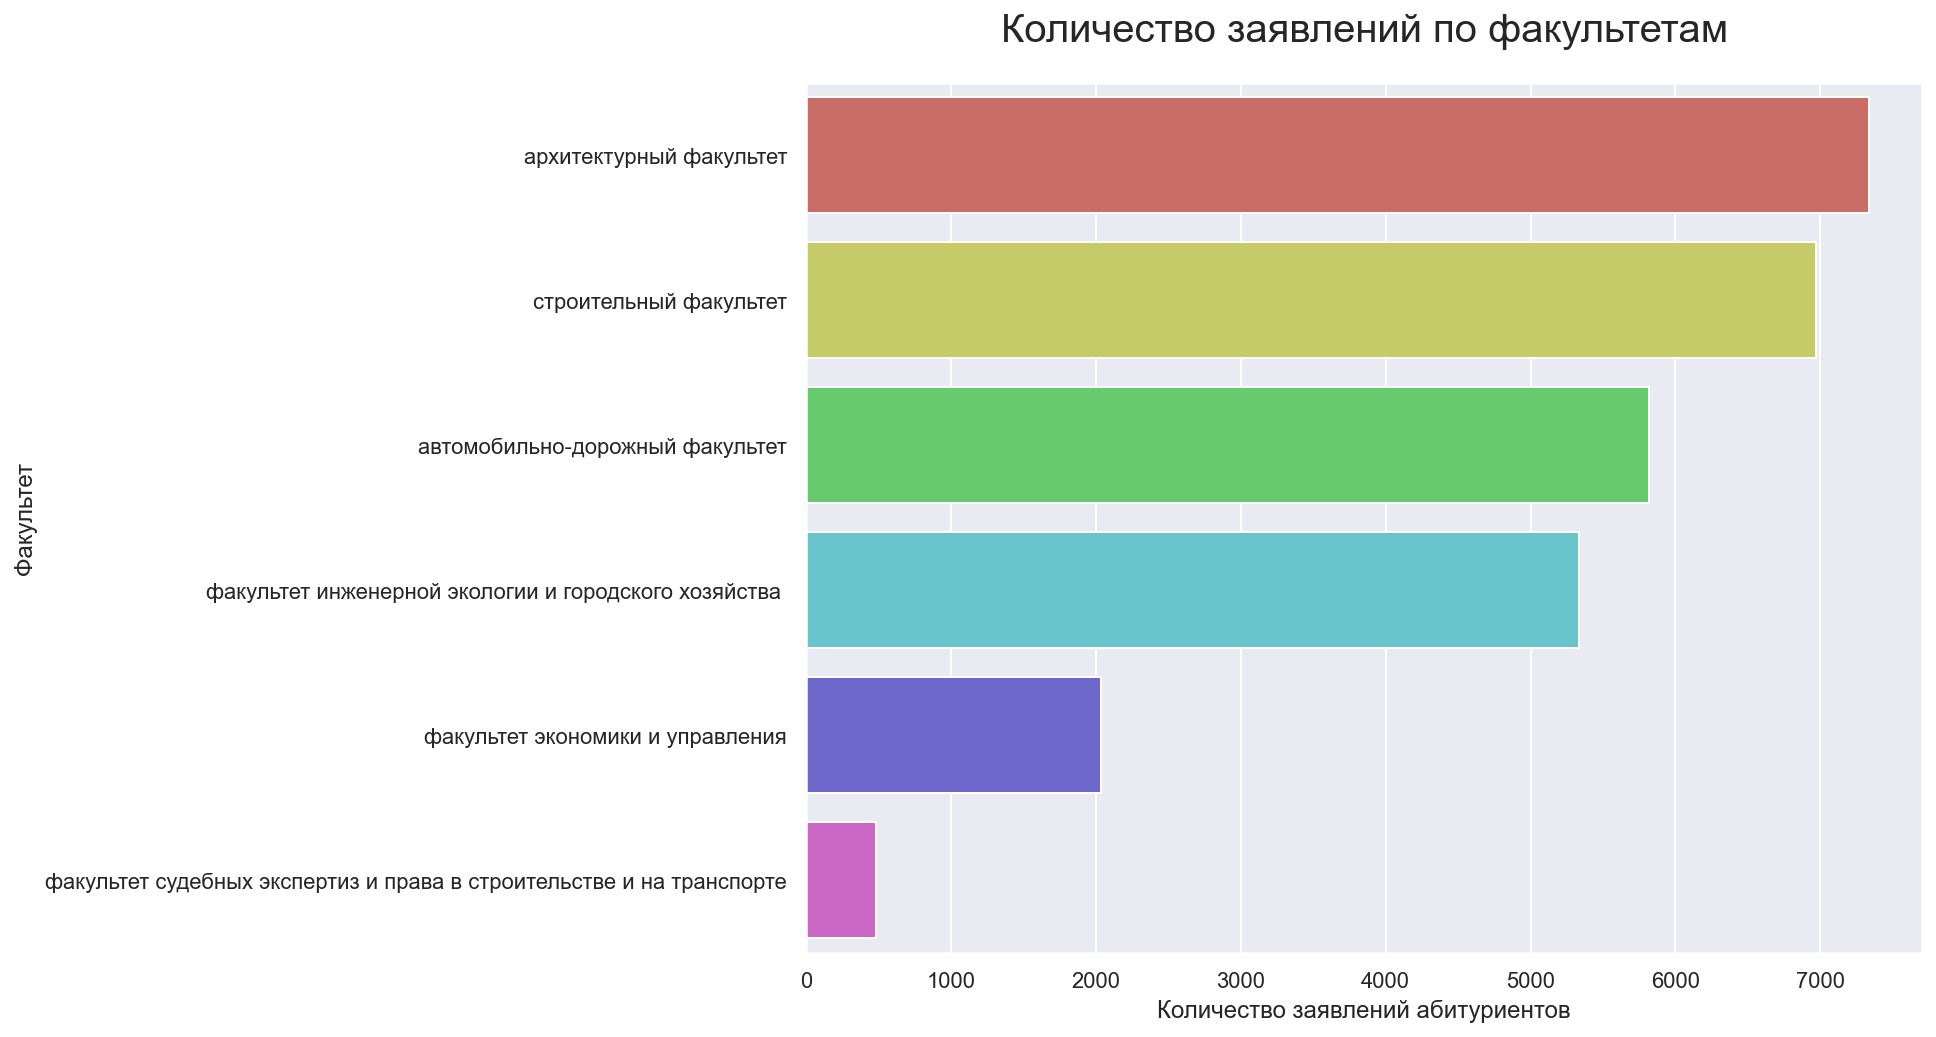

In [166]:
plt.figure(figsize=(10,8))
plt.title('Количество заявлений по факультетам', fontsize = 20, loc = 'center')
ax = sns.barplot(x="Количество заявлений абитуриентов", y="Факультет", data=faculty, palette='hls')

### Количество заявлений по направлениям подготовки 

In [23]:
speciality = df_fulltime[['Направление-специальность','Уникальный_код']].groupby(['Направление-специальность']).count().reset_index().sort_values('Уникальный_код',ascending = False)
speciality.columns = ['Направление/специальность','Количество заявлений абитуриентов']
speciality

,Направление/специальность,Количество заявлений абитуриентов
5,08.03.01 Строительство,5027
6,08.05.01 Строительство уникальных зданий и соо...,1926
1,07.03.01 Архитектура,1646
17,35.03.10 Ландшафтная архитектура,1532
3,07.03.03 Дизайн архитектурной среды,1463
4,07.03.04 Градостроительство,1461
13,23.03.01 Технология транспортных процессов,1280
12,21.03.02 Землеустройство и кадастры,1271
11,20.03.01 Техносферная безопасность,1251
2,07.03.02 Реконструкция и реставрация архитекту...,1234


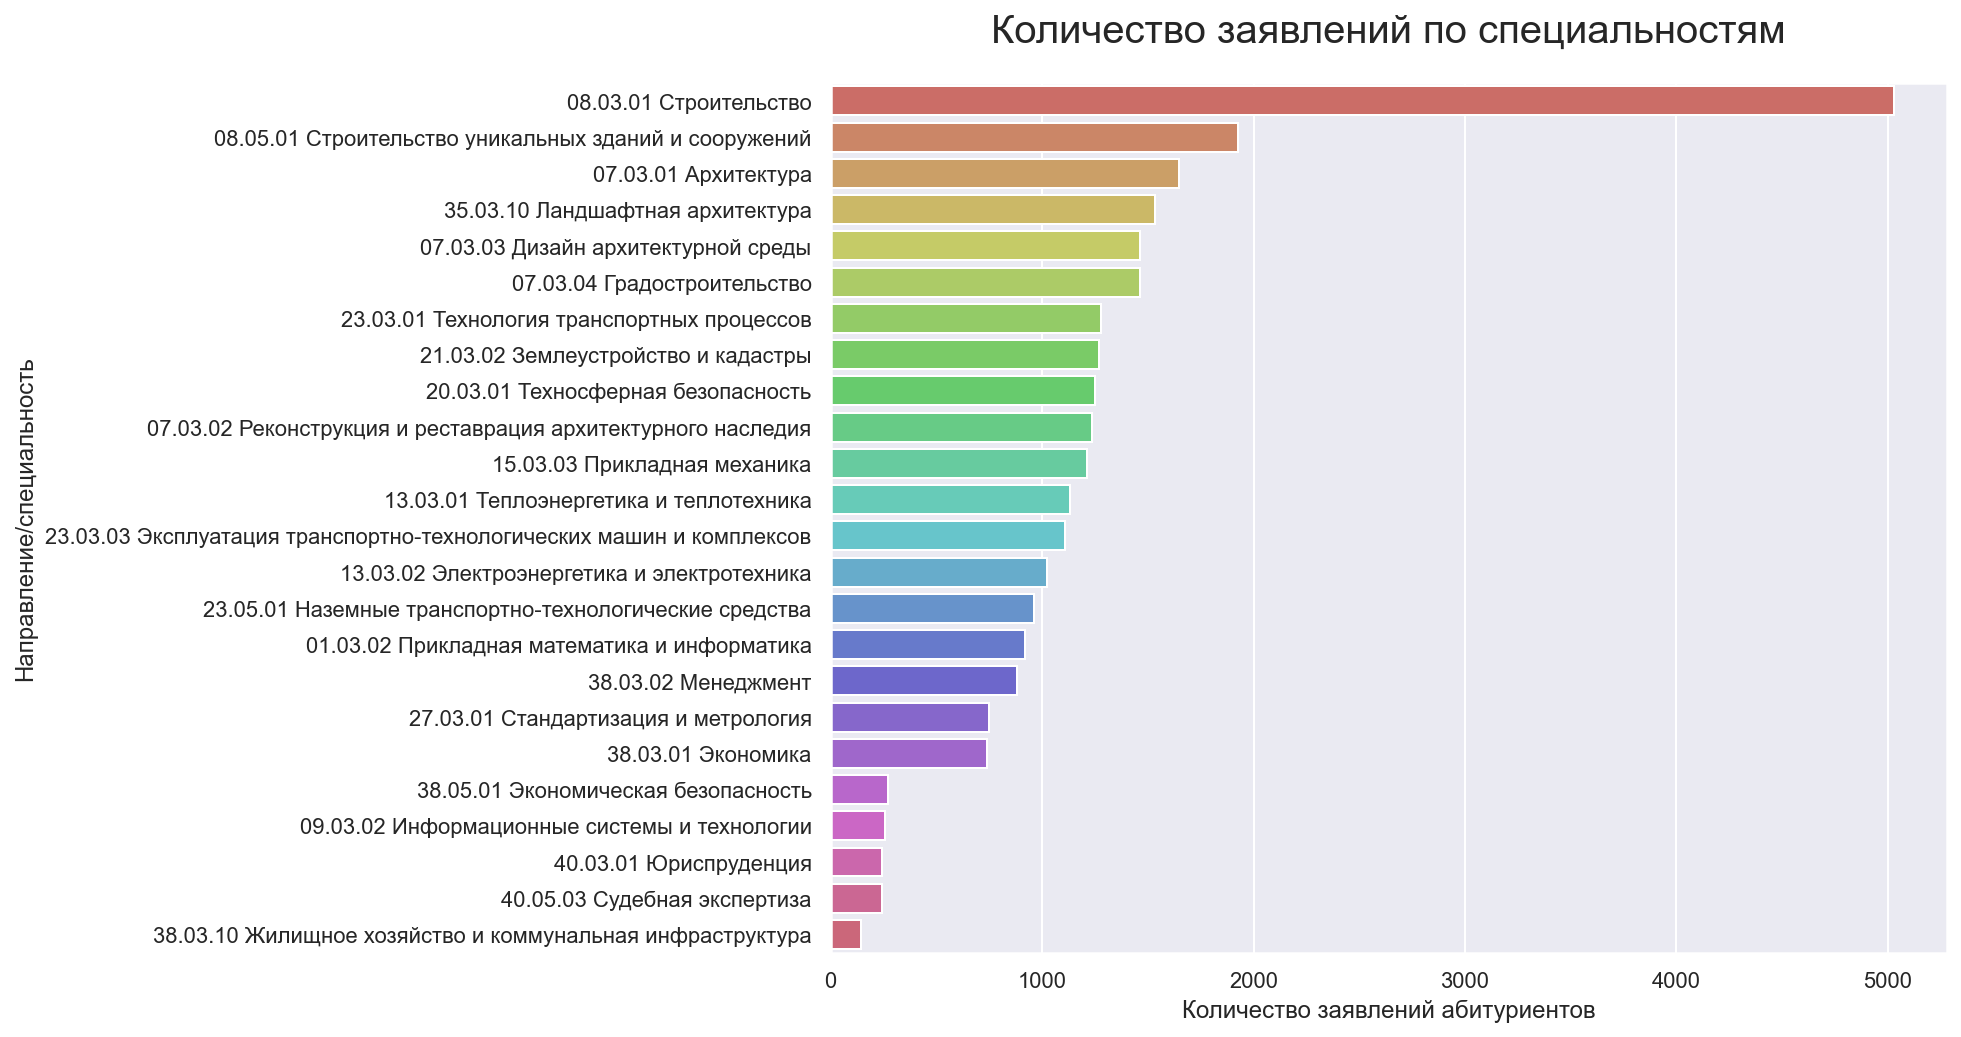

In [167]:
plt.figure(figsize=(10,8))
plt.title('Количество заявлений по специальностям', fontsize = 20, loc = 'center')
ax = sns.barplot(x="Количество заявлений абитуриентов", y="Направление/специальность", data=speciality, palette='hls')

### 	Количество уникальных абитуриентов

In [25]:
print(f'Количество уникальных абитуриентов: {len(df_fulltime.Уникальный_код.unique())} человек.')

Количество уникальных абитуриентов: 5334 человек.


### Количество заявлений на одного абитуриента, среднее, медиана 

In [26]:
a = df_fulltime[['Уникальный_код','Направление-специальность']].groupby(['Уникальный_код']).count().reset_index().sort_values('Направление-специальность',ascending = False)
a.columns = ['Уникальный_код','Количество заявлений']
a.agg(Количество_заявлений=('Количество заявлений', 'count'),
       Среднее_количество=('Количество заявлений', 'mean'),
       Медиана=('Количество заявлений', 'median')).round(1)

,Количество заявлений
Количество_заявлений,5334.0
Среднее_количество,5.2
Медиана,4.0


###  Распределение по способам подачи документов

In [27]:
df_way_of_submitting_documents = df_fulltime[['Доставка_документов','Уникальный_код']].groupby(['Доставка_документов']).count().reset_index()
df_way_of_submitting_documents.columns = ['Способ подачи документа','Количество']
df_way_of_submitting_documents

,Способ подачи документа,Количество
0,Веб,8928
1,Лично,8473
2,Почта,143
3,"Суперсервис ""Поступление в вуз онлайн""",10431


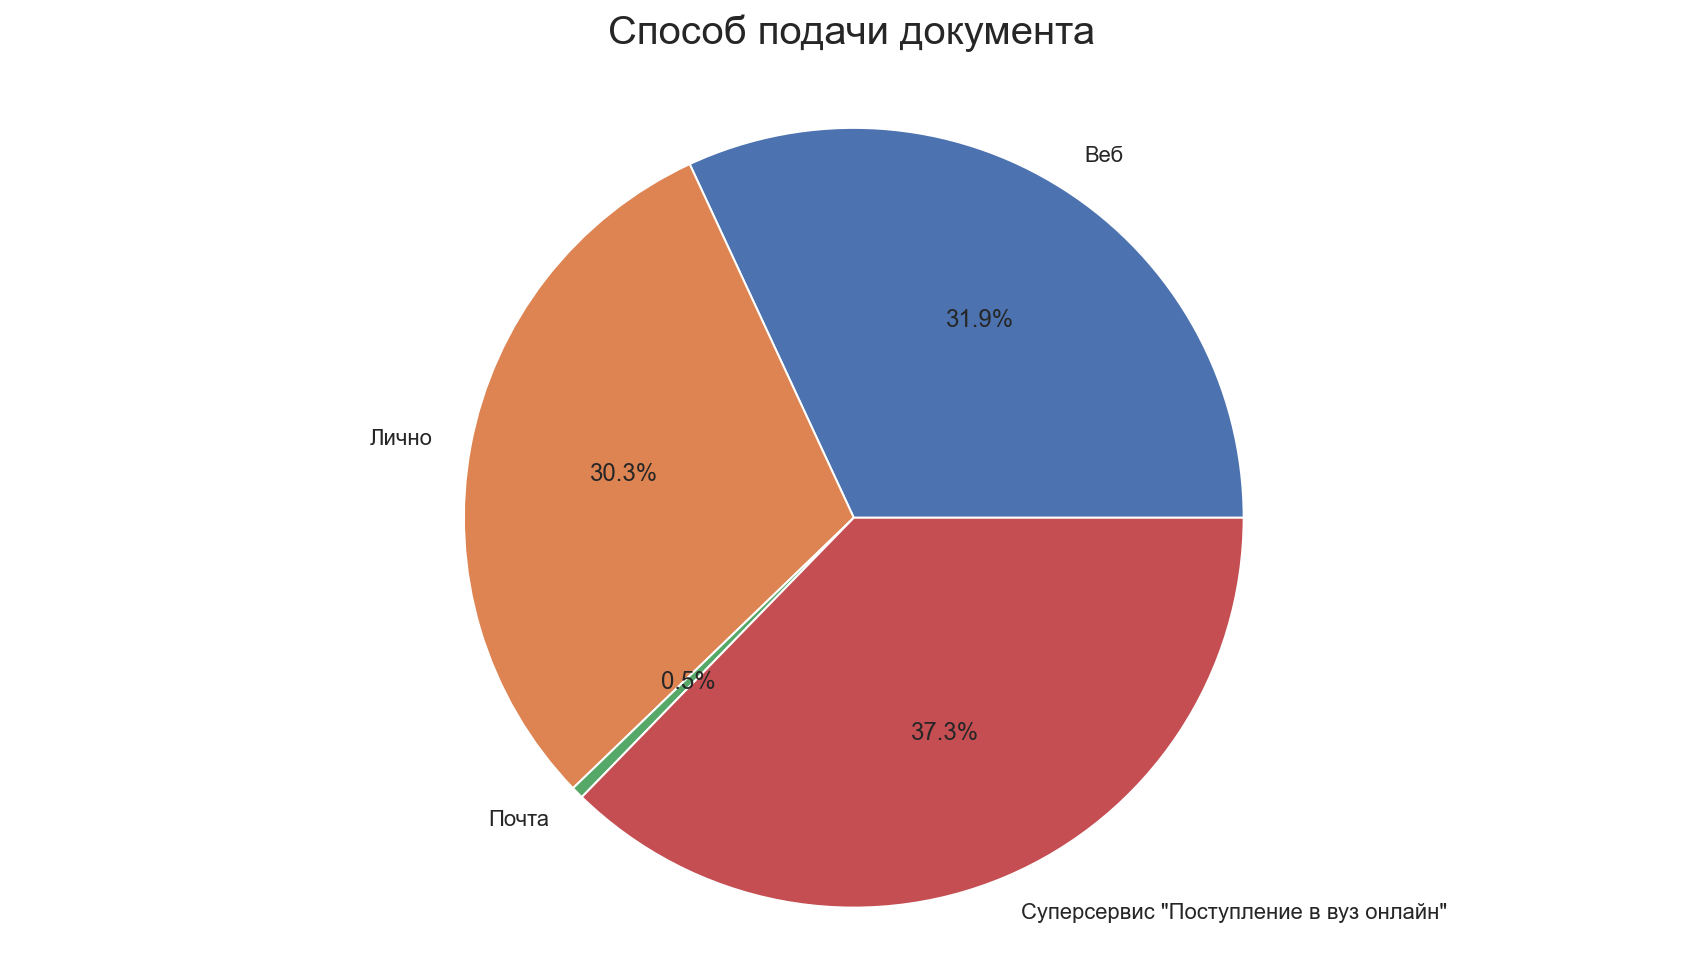

In [168]:
veb = df_way_of_submitting_documents[df_way_of_submitting_documents['Способ подачи документа']=='Веб'].Количество.values[0]
personally = df_way_of_submitting_documents[df_way_of_submitting_documents['Способ подачи документа']=='Лично'].Количество.values[0]
mail = df_way_of_submitting_documents[df_way_of_submitting_documents['Способ подачи документа']=='Почта'].Количество.values[0]
super_service = df_way_of_submitting_documents[df_way_of_submitting_documents['Способ подачи документа']=='Суперсервис "Поступление в вуз онлайн"'].Количество.values[0]

vals = [veb,personally,mail,super_service]
labels = ['Веб','Лично','Почта','Суперсервис "Поступление в вуз онлайн"']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', rotatelabels=False, radius = 10)
plt.title('Способ подачи документа', fontsize = 20)
ax.axis("equal");


### Распределение по основаниям поступления

---
**Комментарий Юлии:**
Основания поступления смотрим по всем заявлениям, один человек может подать на разные формы

---

In [29]:
df_fulltime.head()

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
0,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
1,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
2,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43,01.06.2022,17.0
3,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
4,530-013 41,2022-07-04,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,Лично,NaT,01.06.2022,17.0


In [30]:
reason_for_admission=df_fulltime[['Уникальный_код','Основание_поступления','Категория_приема','Направление-специальность','Факультет','Вид_образования']].sort_values('Уникальный_код',ascending = False)
reason_for_admission

,Уникальный_код,Основание_поступления,Категория_приема,Направление-специальность,Факультет,Вид_образования
7652,99939,бюджетная основа,На общих основаниях,08.03.01 Строительство,строительный факультет,Среднее специальное
22849,99926,бюджетная основа,На общих основаниях,07.03.04 Градостроительство,архитектурный факультет,Среднее общее
4434,99926,бюджетная основа,На общих основаниях,01.03.02 Прикладная математика и информатика,строительный факультет,Среднее общее
22851,99926,бюджетная основа,На общих основаниях,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Среднее общее
22850,99926,бюджетная основа,На общих основаниях,07.03.01 Архитектура,архитектурный факультет,Среднее общее
...,...,...,...,...,...,...
6721,00096,бюджетная основа,На общих основаниях,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Среднее общее
6720,00096,полное возмещение затрат,На общих основаниях,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Среднее общее
6722,00096,полное возмещение затрат,На общих основаниях,07.03.01 Архитектура,архитектурный факультет,Среднее общее
29086,00050,полное возмещение затрат,На общих основаниях,40.03.01 Юриспруденция,факультет судебных экспертиз и права в строите...,Среднее общее


In [31]:
reason_for_admission.duplicated().sum()

481

In [32]:
dub = reason_for_admission[reason_for_admission.duplicated(keep=False)].groupby(['Уникальный_код','Основание_поступления','Категория_приема','Направление-специальность']).Вид_образования.count().reset_index().head(35)
dub

,Уникальный_код,Основание_поступления,Категория_приема,Направление-специальность,Вид_образования
0,005-281 62,бюджетная основа,На общих основаниях,08.05.01 Строительство уникальных зданий и соо...,2
1,00589,полное возмещение затрат,На общих основаниях,08.03.01 Строительство,2
2,00589,полное возмещение затрат,На общих основаниях,13.03.01 Теплоэнергетика и теплотехника,2
3,00589,полное возмещение затрат,На общих основаниях,27.03.01 Стандартизация и метрология,2
4,00589,полное возмещение затрат,На общих основаниях,35.03.10 Ландшафтная архитектура,2
5,00653,полное возмещение затрат,На общих основаниях,07.03.01 Архитектура,2
6,008-566 12,бюджетная основа,На общих основаниях,01.03.02 Прикладная математика и информатика,2
7,00915,полное возмещение затрат,На общих основаниях,35.03.10 Ландшафтная архитектура,2
8,011-464 35,полное возмещение затрат,На общих основаниях,40.03.01 Юриспруденция,2
9,012-276 45,полное возмещение затрат,На общих основаниях,38.03.02 Менеджмент,2


In [33]:
reason_for_admission = reason_for_admission.drop_duplicates()

In [34]:
reason_for_admission.duplicated().sum()

0

In [35]:
reason_for_admission.sort_values('Уникальный_код',ascending = False)

,Уникальный_код,Основание_поступления,Категория_приема,Направление-специальность,Факультет,Вид_образования
7652,99939,бюджетная основа,На общих основаниях,08.03.01 Строительство,строительный факультет,Среднее специальное
22850,99926,бюджетная основа,На общих основаниях,07.03.01 Архитектура,архитектурный факультет,Среднее общее
4435,99926,бюджетная основа,На общих основаниях,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Среднее общее
4433,99926,бюджетная основа,На общих основаниях,35.03.10 Ландшафтная архитектура,архитектурный факультет,Среднее общее
22849,99926,бюджетная основа,На общих основаниях,07.03.04 Градостроительство,архитектурный факультет,Среднее общее
...,...,...,...,...,...,...
6721,00096,бюджетная основа,На общих основаниях,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Среднее общее
6720,00096,полное возмещение затрат,На общих основаниях,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Среднее общее
6722,00096,полное возмещение затрат,На общих основаниях,07.03.01 Архитектура,архитектурный факультет,Среднее общее
29086,00050,полное возмещение затрат,На общих основаниях,40.03.01 Юриспруденция,факультет судебных экспертиз и права в строите...,Среднее общее


In [36]:
df_reason_for_admission = reason_for_admission[['Основание_поступления','Уникальный_код']].groupby(['Основание_поступления']).count().reset_index()
df_reason_for_admission.columns = ['Основание поступления','Количество']
df_reason_for_admission

,Основание поступления,Количество
0,бюджетная основа,19728
1,полное возмещение затрат,7670
2,целевой прием,96


In [37]:
df_reason_for_admission_more1 = reason_for_admission[['Основание_поступления','Уникальный_код']].groupby(['Уникальный_код']).Основание_поступления.count().reset_index().sort_values('Основание_поступления',ascending = False)
df_reason_for_admission_more1.columns = ['Уникальный_код','Количество заявлений с разными основаниями поступления']
df_reason_for_admission_more1[df_reason_for_admission_more1['Количество заявлений с разными основаниями поступления'] > 1]

,Уникальный_код,Количество заявлений с разными основаниями поступления
333,054-006 59,26
1299,255-834 60,23
2514,477-273 94,22
2235,421-992 83,22
3763,715-060 76,22
...,...,...
4765,918-292 81,2
2259,424-524 56,2
514,089-682 08,2
1188,224-838 97,2


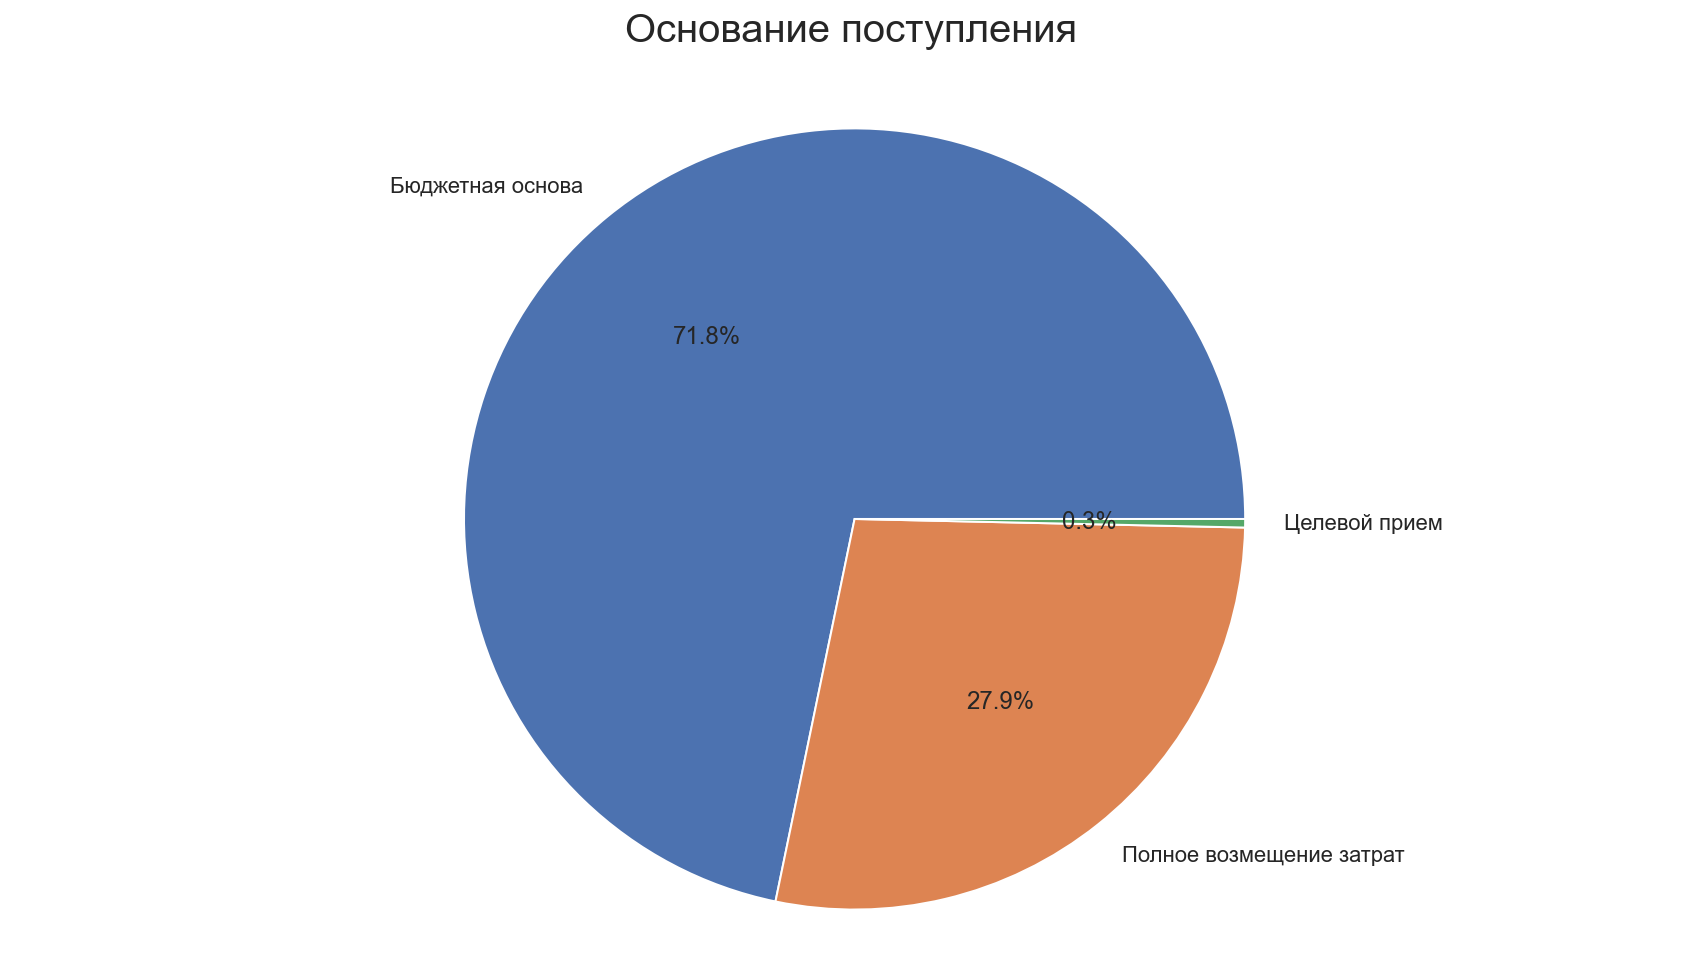

In [169]:
budgetary_basis = df_reason_for_admission[df_reason_for_admission['Основание поступления']=='бюджетная основа'].Количество.values[0]
commercial_basis = df_reason_for_admission[df_reason_for_admission['Основание поступления']=='полное возмещение затрат'].Количество.values[0]
target_reception = df_reason_for_admission[df_reason_for_admission['Основание поступления']=='целевой прием'].Количество.values[0]

vals = [budgetary_basis,commercial_basis,target_reception]
labels = ['Бюджетная основа','Полное возмещение затрат','Целевой прием']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', rotatelabels=False, radius = 10)
plt.title('Основание поступления', fontsize = 20)
ax.axis("equal");

### Общее количество заявлений по основаниям поступления - 27494, уникальное количество абитуриентов - 5334 человек. Количество заявлений по основаниям выше уникального количества абитуриентов в связи с тем, что 4497 абитуриентов подали заявления по разным основаниям и на разные специальности.

### 	Распределение по уровням подготовки

---
**Комментарий Юлии:**
Усложнила, мы смотрим по заявлениям в целом


---

In [39]:
df_proficiency_level=df_fulltime.drop(columns = 'Доставка_документов')
df_proficiency_level

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,Уровень_подготовки,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Дата_согласия_на_зачисление,dateNow,Возраст
0,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.04 Градостроительство,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,NaT,01.06.2022,17.0
1,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,NaT,01.06.2022,17.0
2,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,2022-07-30 11:41:43,01.06.2022,17.0
3,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Подано,NaT,01.06.2022,17.0
4,530-013 41,2022-07-04,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,Бакалавр,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Подано,NaT,01.06.2022,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,NaT,01.06.2022,21.0
29466,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,NaT,01.06.2022,21.0
29467,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,NaT,01.06.2022,21.0
29468,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,Бакалавр,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,NaT,01.06.2022,21.0


In [40]:
df_proficiency_level.duplicated().sum()

0

In [41]:
df_proficiency_level_distribution = df_proficiency_level[['Уровень_подготовки','Уникальный_код']].groupby(['Уровень_подготовки']).Уникальный_код.count().reset_index()
df_proficiency_level_distribution.columns = ['Уровень_подготовки','Количество']
df_proficiency_level_distribution

,Уровень_подготовки,Количество
0,Бакалавр,24574
1,Специалист,3401


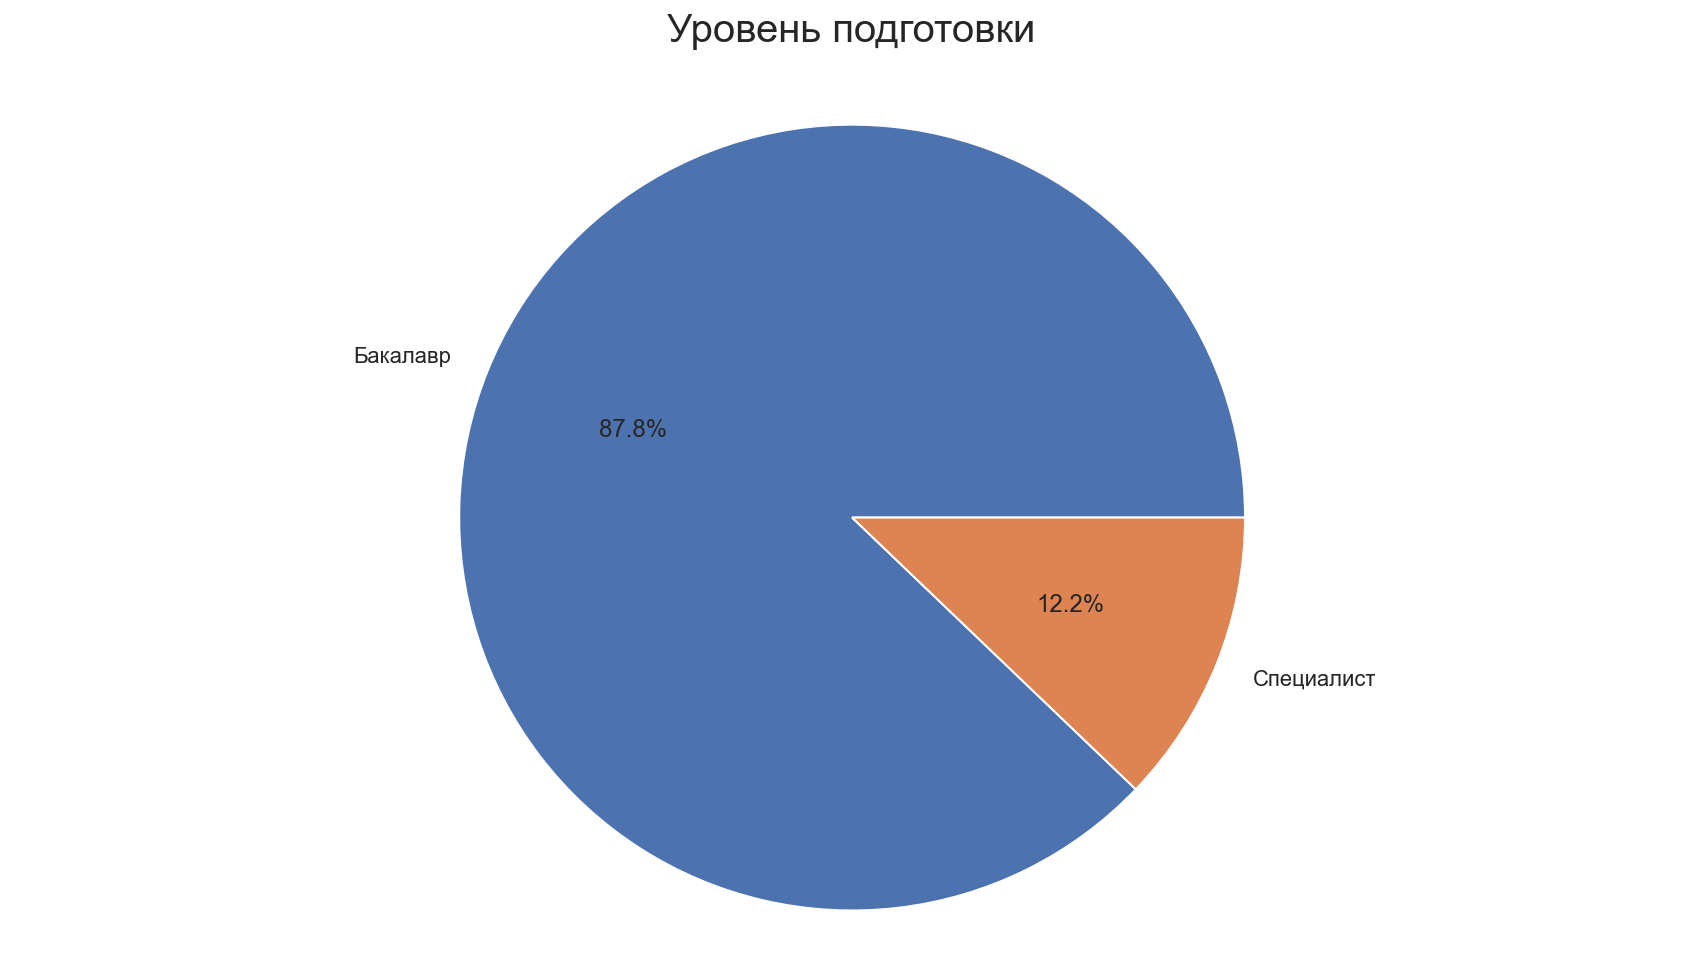

In [170]:
bachelor = df_proficiency_level_distribution[df_proficiency_level_distribution['Уровень_подготовки']=='Бакалавр'].Количество.values[0]
specialist = df_proficiency_level_distribution[df_proficiency_level_distribution['Уровень_подготовки']=='Специалист'].Количество.values[0]

vals = [bachelor,specialist]
labels = ['Бакалавр','Специалист']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', rotatelabels=False, radius = 10)
plt.title('Уровень подготовки', fontsize = 20)
ax.axis("equal");

### 	Распределение по образованию

In [43]:
df_education_type = df_fulltime[['Вид_образования','Уникальный_код','Дата_рождения','Год_завершения','Доставка_документов','Возраст','Основание_поступления']]
df_education_type
#Высшее образование на дату 01.06.2022 может быть у абитуриента, достигшего 22 лет (если в школу пошёл в 6 лет).
# Необходимо отфильтровать абитуриентов, указавших высшее образование, но имеющих возраст менее 22 лет.
#Также уберем повторяющиеся записи по Виду образования и уникальному коду.

,Вид_образования,Уникальный_код,Дата_рождения,Год_завершения,Доставка_документов,Возраст,Основание_поступления
0,Среднее общее,702-875 69,14.08.2004,2022,"Суперсервис ""Поступление в вуз онлайн""",17.0,бюджетная основа
1,Среднее общее,702-875 69,14.08.2004,2022,"Суперсервис ""Поступление в вуз онлайн""",17.0,бюджетная основа
2,Среднее общее,702-875 69,14.08.2004,2022,"Суперсервис ""Поступление в вуз онлайн""",17.0,бюджетная основа
3,Среднее общее,702-875 69,14.08.2004,2022,"Суперсервис ""Поступление в вуз онлайн""",17.0,бюджетная основа
4,Среднее общее,530-013 41,22.10.2004,2022,Лично,17.0,бюджетная основа
...,...,...,...,...,...,...,...
29465,Среднее общее,149-613 49,25.07.2000,2018,Веб,21.0,бюджетная основа
29466,Среднее общее,149-613 49,25.07.2000,2018,Веб,21.0,бюджетная основа
29467,Среднее общее,149-613 49,25.07.2000,2018,Веб,21.0,бюджетная основа
29468,Среднее общее,149-613 49,25.07.2000,2018,Веб,21.0,бюджетная основа


In [44]:
df_education_type.duplicated().sum()

20878

In [45]:
df_education_type = df_education_type.drop_duplicates()

In [46]:
list_education = df_education_type[(df_education_type['Возраст'] < 22) & (df_education_type['Вид_образования'] == 'Высшее')]['Уникальный_код'].tolist()
list_education

['072-157 61',
 '760-856 19',
 '898-693 46',
 '502-801 84',
 '313-738 90',
 '893-357 21',
 '705-306 71']

In [47]:
#выборка показывает, что часть абитуриентов указали высшее образование, имея возраст в 2022 г. младше 22 лет.
df_fulltime[df_fulltime['Уникальный_код'].isin(list_education)]

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
3015,072-157 61,2022-07-06,292,0,Женский,11.06.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Владимирская обл,Среднее общее,2022,Подано,Лично,NaT,01.06.2022,17.0
3016,072-157 61,2022-06-24,292,0,Женский,11.06.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Владимирская обл,Высшее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
12429,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Амурская обл,Высшее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
12430,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.05.01 Строительство уникальных зданий и соо...,строительный факультет,Амурская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
12431,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Амурская обл,Высшее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
12432,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,Амурская обл,Высшее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
12433,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Амурская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
12434,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2022,Зачислен,Веб,2022-07-25 10:04:04,01.06.2022,18.0
12435,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,13.03.02 Электроэнергетика и электротехника,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
12436,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,01.03.02 Прикладная математика и информатика,строительный факультет,Амурская обл,Высшее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0


In [48]:
#заменим значение образования с "Высшее" на "Среднее общее"
df_fulltime['Вид_образования'].where(~(df_fulltime['Уникальный_код'].isin(list_education)), other='Среднее общее', inplace=True)

In [49]:
#проверим результат
df_fulltime[df_fulltime['Уникальный_код'].isin(list_education)]

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
3015,072-157 61,2022-07-06,292,0,Женский,11.06.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Владимирская обл,Среднее общее,2022,Подано,Лично,NaT,01.06.2022,17.0
3016,072-157 61,2022-06-24,292,0,Женский,11.06.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Владимирская обл,Среднее общее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,17.0
12429,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Амурская обл,Среднее общее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
12430,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.05.01 Строительство уникальных зданий и соо...,строительный факультет,Амурская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
12431,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Амурская обл,Среднее общее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
12432,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
12433,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Амурская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
12434,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2022,Зачислен,Веб,2022-07-25 10:04:04,01.06.2022,18.0
12435,760-856 19,2022-07-13,219,0,Мужской,26.03.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,13.03.02 Электроэнергетика и электротехника,факультет инженерной экологии и городского хоз...,Амурская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
12436,760-856 19,2022-07-07,219,0,Мужской,26.03.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,01.03.02 Прикладная математика и информатика,строительный факультет,Амурская обл,Среднее общее,2018,Отозвано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0


In [50]:
df_fulltime[df_fulltime['Вид_образования'] == 'Высшее']

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
1146,434-986 16,2022-06-21,335,0,Женский,23.09.1999,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург г,Высшее,2021,Подано,Лично,NaT,01.06.2022,22.0
1147,434-986 16,2022-06-21,335,0,Женский,23.09.1999,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Высшее,2021,Подано,Лично,NaT,01.06.2022,22.0
1148,434-986 16,2022-06-21,335,0,Женский,23.09.1999,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург г,Высшее,2021,Зачислен,Лично,2022-07-22 14:37:40,01.06.2022,22.0
1149,434-986 16,2022-06-21,335,0,Женский,23.09.1999,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург г,Высшее,2021,Подано,Лично,NaT,01.06.2022,22.0
5022,420-267 07,2022-06-20,260,0,Женский,05.09.1992,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург г,Высшее,2015,Подано,Лично,NaT,01.06.2022,30.0
5023,420-267 07,2022-06-20,260,0,Женский,05.09.1992,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург г,Высшее,2015,Подано,Лично,NaT,01.06.2022,30.0
5024,420-267 07,2022-06-20,260,0,Женский,05.09.1992,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Санкт-Петербург г,Высшее,2015,Подано,Лично,NaT,01.06.2022,30.0
5025,420-267 07,2022-06-20,260,0,Женский,05.09.1992,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург г,Высшее,2015,Подано,Лично,NaT,01.06.2022,30.0
20744,305-369 27,2022-08-15,190,0,Мужской,06.11.1997,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Москва г,Высшее,2019,Подано,Веб,NaT,01.06.2022,25.0
20745,305-369 27,2022-08-15,190,0,Мужской,06.11.1997,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,13.03.02 Электроэнергетика и электротехника,факультет инженерной экологии и городского хоз...,Москва г,Высшее,2019,Подано,Веб,NaT,01.06.2022,25.0


### 7 абитуриентов, указавших высшее образование, имеют возраст менее 22 лет.  Из них 1 абитуриент указал одинаковый год рождения и окончания предыдущей ступени образования (скорее всего указали ошибочно). У всех абитуриентов, проставивших необоснованно высшее образование, документы поданы через Суперсервис "Поступление в вуз онлайн". Возможно необходимо внести предложение в сервис о проверке корректности ввода данных об образовании на основании даты рождения абитуриента.
### Заменим значение признака "Год завершения" у абитуриента с уникальным номером 893-357 21 (индекс 27254) на более подходящее по смыслу - 2022 год (дата рождения 09.12.2003 плюс 18 лет от рождения до окончания общего среднего образования)

In [51]:
df_education_type['Год_завершения'][df_education_type.Уникальный_код =='893-357 21'] = '2022'

In [52]:
df_fulltime['Год_завершения'][df_fulltime.Уникальный_код =='893-357 21'] = '2022'

In [53]:
df_education_type.duplicated().sum()

0

In [54]:
df_education_type = df_fulltime[['Вид_образования','Уникальный_код']].groupby(['Вид_образования']).count().reset_index()
df_education_type.columns = ['Вид образования','Количество']
df_education_type

,Вид образования,Количество
0,Высшее,17
1,Среднее общее,26502
2,Среднее специальное,1456


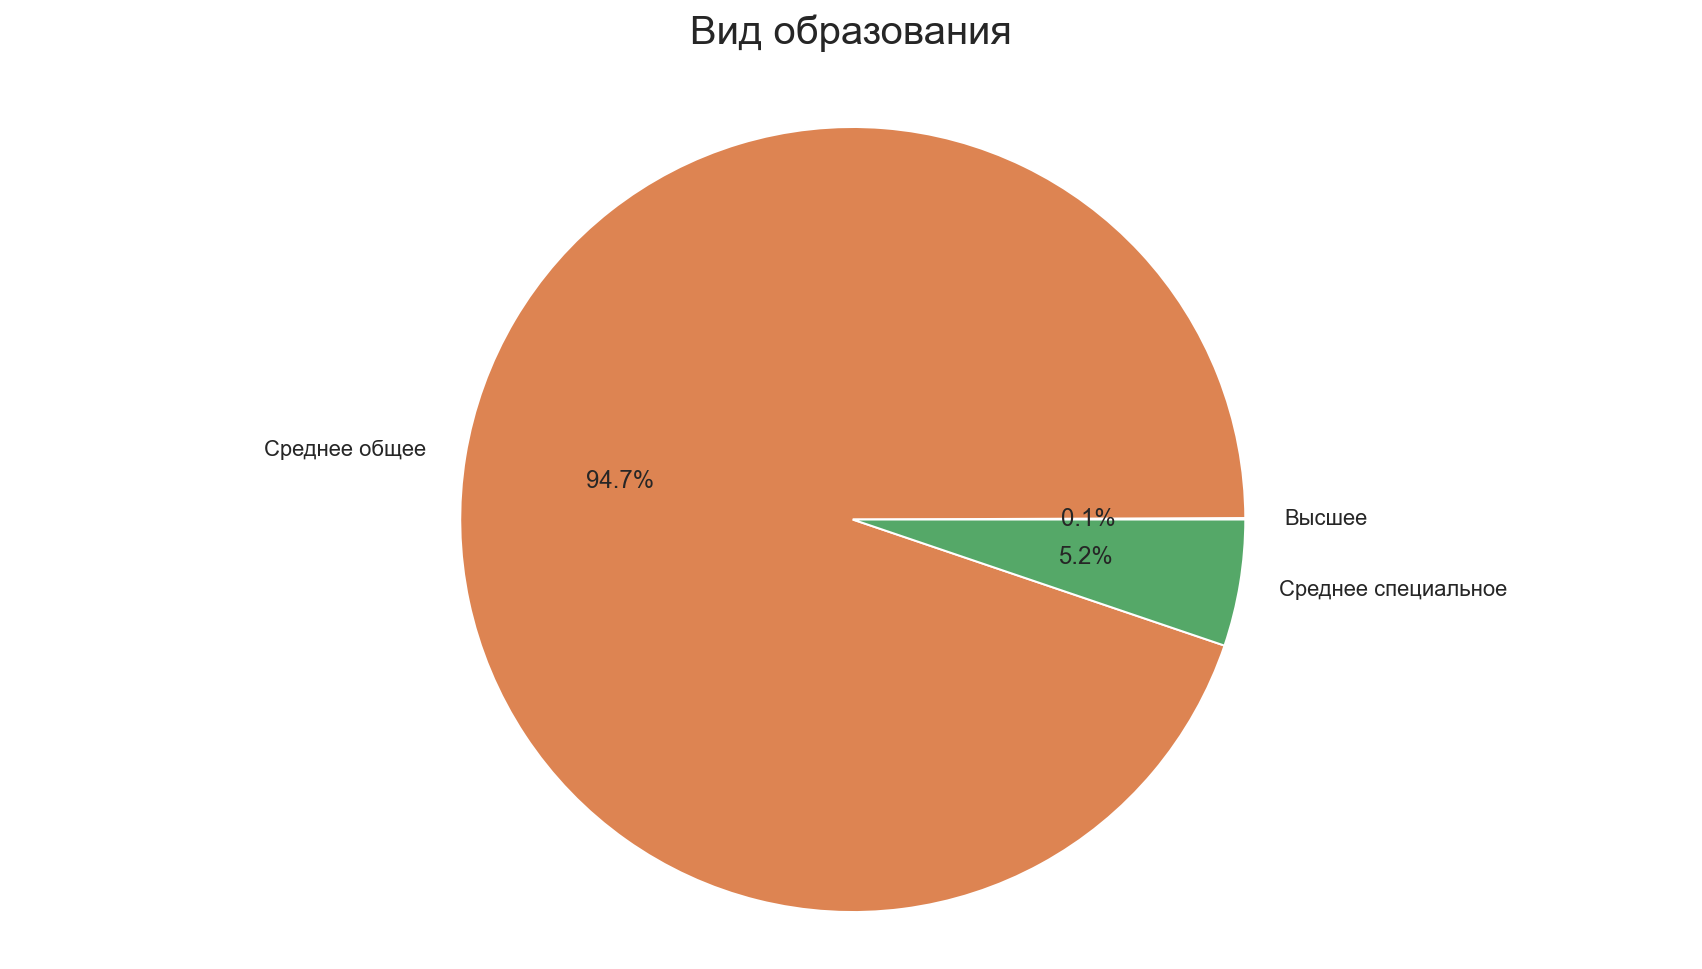

In [171]:
higher = df_education_type[df_education_type['Вид образования']=='Высшее'].Количество.values[0]
average_total = df_education_type[df_education_type['Вид образования']=='Среднее общее'].Количество.values[0]
specialized_secondary = df_education_type[df_education_type['Вид образования']=='Среднее специальное'].Количество.values[0]

vals = [higher,average_total,specialized_secondary]
labels = ['Высшее','Среднее общее','Среднее специальное']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', rotatelabels=False, radius = 10)
plt.title('Вид образования', fontsize = 20)
ax.axis("equal");

### 	Распределение по регионам, гражданству

### Обработаем пропуски (замена на значение "Не определен") и некорректные значения признаков "Распределение по регионам", "Распределение по гражданству".

In [56]:
df_fulltime[df_fulltime['Гражданство'].isna()] 

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
7856,01249,2022-07-14,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7857,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,13.03.02 Электроэнергетика и электротехника,факультет инженерной экологии и городского хоз...,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7858,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,21.03.02 Землеустройство и кадастры,факультет инженерной экологии и городского хоз...,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7859,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,13.03.01 Теплоэнергетика и теплотехника,факультет инженерной экологии и городского хоз...,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7860,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,27.03.01 Стандартизация и метрология,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7861,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,факультет инженерной экологии и городского хоз...,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7862,01249,2022-07-14,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,23.05.01 Наземные транспортно-технологические ...,автомобильно-дорожный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7863,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,15.03.03 Прикладная механика,автомобильно-дорожный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7864,01249,2022-07-08,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,01.03.02 Прикладная математика и информатика,строительный факультет,NaN,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
7865,01249,2022-07-14,239,0,Женский,30.09.2004,NaN,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,NaN,Среднее общее,2022,Зачислен,Веб,2022-08-02 12:09:52,01.06.2022,17.0


In [57]:
df_fulltime['Гражданство'].where(~(df_fulltime['Уникальный_код'] == '038-022 14'), other='НЕ ОПРЕДЕЛЕНО', inplace=True)
df_fulltime['Гражданство'].where(~(df_fulltime['Уникальный_код'] == '01249'), other='НЕ ОПРЕДЕЛЕНО', inplace=True)

In [58]:
sorted(df_fulltime['Гражданство'].unique())

['АЗЕРБАЙДЖАН',
 'АЛЖИР',
 'АРМЕНИЯ',
 'АФГАНИСТАН',
 'БЕЛАРУСЬ',
 'ГРУЗИЯ',
 'ИРАК',
 'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА',
 'ЙЕМЕН',
 'КАЗАХСТАН',
 'КИРГИЗИЯ',
 'КИТАЙ',
 'ЛАТВИЯ',
 'МАРОККО',
 'НЕ ОПРЕДЕЛЕНО',
 'РОССИЯ',
 'РУАНДА',
 'САУДОВСКАЯ АРАВИЯ',
 'ТАДЖИКИСТАН',
 'ТУРКМЕНИЯ',
 'ТУРЦИЯ',
 'Туркменистан',
 'УЗБЕКИСТАН',
 'УКРАИНА']

In [59]:
df_fulltime['Гражданство'].where(~(df_fulltime['Гражданство'].str.upper().str.contains('ТУРКМЕ')), other='ТУРКМЕНИЯ', inplace=True)
df_fulltime['Гражданство'].unique()

array(['РОССИЯ', 'БЕЛАРУСЬ', 'КАЗАХСТАН', 'АРМЕНИЯ', 'ТУРКМЕНИЯ',
       'УЗБЕКИСТАН', 'УКРАИНА', 'НЕ ОПРЕДЕЛЕНО', 'АЗЕРБАЙДЖАН', 'ЙЕМЕН',
       'КИТАЙ', 'ТУРЦИЯ', 'ИРАК', 'МАРОККО', 'ЛАТВИЯ', 'ТАДЖИКИСТАН',
       'РУАНДА', 'АЛЖИР', 'ГРУЗИЯ', 'КИРГИЗИЯ',
       'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА', 'АФГАНИСТАН', 'САУДОВСКАЯ АРАВИЯ'],
      dtype=object)

In [60]:
df_fulltime['Гражданство'].where(~(df_fulltime['Гражданство']== 'ИРАН, ИСЛАМСКАЯ РЕСПУБЛИКА'), other='ИРАН', inplace=True)

In [61]:
sorted(df_fulltime['Гражданство'].unique())

['АЗЕРБАЙДЖАН',
 'АЛЖИР',
 'АРМЕНИЯ',
 'АФГАНИСТАН',
 'БЕЛАРУСЬ',
 'ГРУЗИЯ',
 'ИРАК',
 'ИРАН',
 'ЙЕМЕН',
 'КАЗАХСТАН',
 'КИРГИЗИЯ',
 'КИТАЙ',
 'ЛАТВИЯ',
 'МАРОККО',
 'НЕ ОПРЕДЕЛЕНО',
 'РОССИЯ',
 'РУАНДА',
 'САУДОВСКАЯ АРАВИЯ',
 'ТАДЖИКИСТАН',
 'ТУРКМЕНИЯ',
 'ТУРЦИЯ',
 'УЗБЕКИСТАН',
 'УКРАИНА']

In [62]:
df_fulltime['Регион_по_прописке'].where(~(df_fulltime['Регион_по_прописке'].isna()), other='НЕ ОПРЕДЕЛЕН', inplace=True)

In [63]:
replace_values = {'Адыгея респ':'Адыгея Респ', 'Алтай респ':'Алтай Респ','Белгородская':'Белгородская обл',
                 'Бурятия респ':'Бурятия Респ','Вологодская область':'Вологодская обл','Дагестан респ':'Дагестан Респ',
                 'Карелия респ':'Карелия Респ','Кемеровская област':'Кемеровская область - Кузбасс обл','Кемеровская область':'Кемеровская область - Кузбасс обл',
                 'Кемеровская область - Кузбасс':'Кемеровская область - Кузбасс обл', 'Краснодарский':'Краснодарский край',
                 'Крым Республика':'Крым Респ','Крым респ':'Крым Респ','Ленинградская':'Ленинградская обл',
                 'Московская область':'Московская обл','Нижегородская область':'Нижегородская обл','Респ Саха /Якутия/':'Саха(Якутия) Респ',
                 'Республика Дагестан':'Дагестан Респ','Санкт-Петербург':'Санкт-Петербург г','Саратовская':'Саратовская обл',
                 'Саха /Якутия/ Респ':'Саха(Якутия) Респ','Ставропольский':'Ставропольский край','Татарстан респ':'Татарстан Респ',
                 'Татарстан республика':'Татарстан Респ','Томская':'Томская обл','Ханты-Мансийский Автономный округ - Югра ао':'Ханты-Мансийский Автономный округ - Югра АО',
                 'Чувашская Республика - Чувашия':'Чувашская Республика - Чувашия Респ','Ямало-Ненецкий ао':'Ямало-Ненецкий АО',
                 'г. Санкт-Петербург':'Санкт-Петербург г','город Санкт-Петербург':'Санкт-Петербург г','санкт-петербург':'Санкт-Петербург г',
                 'край Пермский':'Пермский край','-':'НЕ ОПРЕДЕЛЕН','Байконур г': 'Казахстан Респ'}
def multiple_replace(replace_values):
    
    for i, j in replace_values.items():
            df_fulltime['Регион_по_прописке'].where(~(df_fulltime['Регион_по_прописке']== i), other=j, inplace=True)
                   
multiple_replace(replace_values)

In [64]:
sorted(df_fulltime['Регион_по_прописке'].unique())

['Адыгея Респ',
 'Алтай Респ',
 'Алтайский край',
 'Амурская обл',
 'Архангельская обл',
 'Астраханская обл',
 'Башкортостан Респ',
 'Белгородская обл',
 'Брянская обл',
 'Бурятия Респ',
 'Владимирская обл',
 'Волгоградская обл',
 'Вологодская обл',
 'Воронежская обл',
 'Дагестан Респ',
 'Еврейская Аобл',
 'Забайкальский край',
 'Ивановская обл',
 'Ингушетия Респ',
 'Иркутская обл',
 'Кабардино-Балкарская Респ',
 'Казахстан Респ',
 'Калининградская обл',
 'Калмыкия Респ',
 'Калужская обл',
 'Камчатский край',
 'Карачаево-Черкесская Респ',
 'Карелия Респ',
 'Кемеровская область - Кузбасс обл',
 'Кировская обл',
 'Коми Респ',
 'Костромская обл',
 'Краснодарский край',
 'Красноярский край',
 'Крым Респ',
 'Курганская обл',
 'Курская обл',
 'Ленинградская обл',
 'Липецкая обл',
 'Магаданская обл',
 'Марий Эл Респ',
 'Мордовия Респ',
 'Москва г',
 'Московская обл',
 'Мурманская обл',
 'НЕ ОПРЕДЕЛЕН',
 'Ненецкий АО',
 'Нижегородская обл',
 'Новгородская обл',
 'Новосибирская обл',
 'Омская о

In [65]:
df_region_by_registration = df_fulltime[['Регион_по_прописке','Уникальный_код']]
df_region_by_registration

,Регион_по_прописке,Уникальный_код
0,Татарстан Респ,702-875 69
1,Татарстан Респ,702-875 69
2,Татарстан Респ,702-875 69
3,Татарстан Респ,702-875 69
4,Санкт-Петербург г,530-013 41
...,...,...
29465,Санкт-Петербург г,149-613 49
29466,Санкт-Петербург г,149-613 49
29467,Санкт-Петербург г,149-613 49
29468,Санкт-Петербург г,149-613 49


In [66]:
df_region_by_registration.duplicated().sum()

22641

In [67]:
df_region_by_registration = df_region_by_registration.drop_duplicates()

In [68]:
df_region_by_registration.duplicated().sum()

0

In [69]:
df_region_by_registration = df_region_by_registration[['Регион_по_прописке','Уникальный_код']].groupby(['Регион_по_прописке']).count().reset_index().sort_values('Уникальный_код',ascending = False)
df_region_by_registration.columns = ['Регион по прописке','Количество заявлений']
df_region_by_registration = df_region_by_registration.iloc[:15]
df_region_by_registration

,Регион по прописке,Количество заявлений
60,Санкт-Петербург г,1827
37,Ленинградская обл,385
32,Краснодарский край,187
70,Татарстан Респ,129
6,Башкортостан Респ,112
4,Архангельская обл,108
45,НЕ ОПРЕДЕЛЕН,100
80,Ханты-Мансийский Автономный округ - Югра АО,98
44,Мурманская обл,93
12,Вологодская обл,77


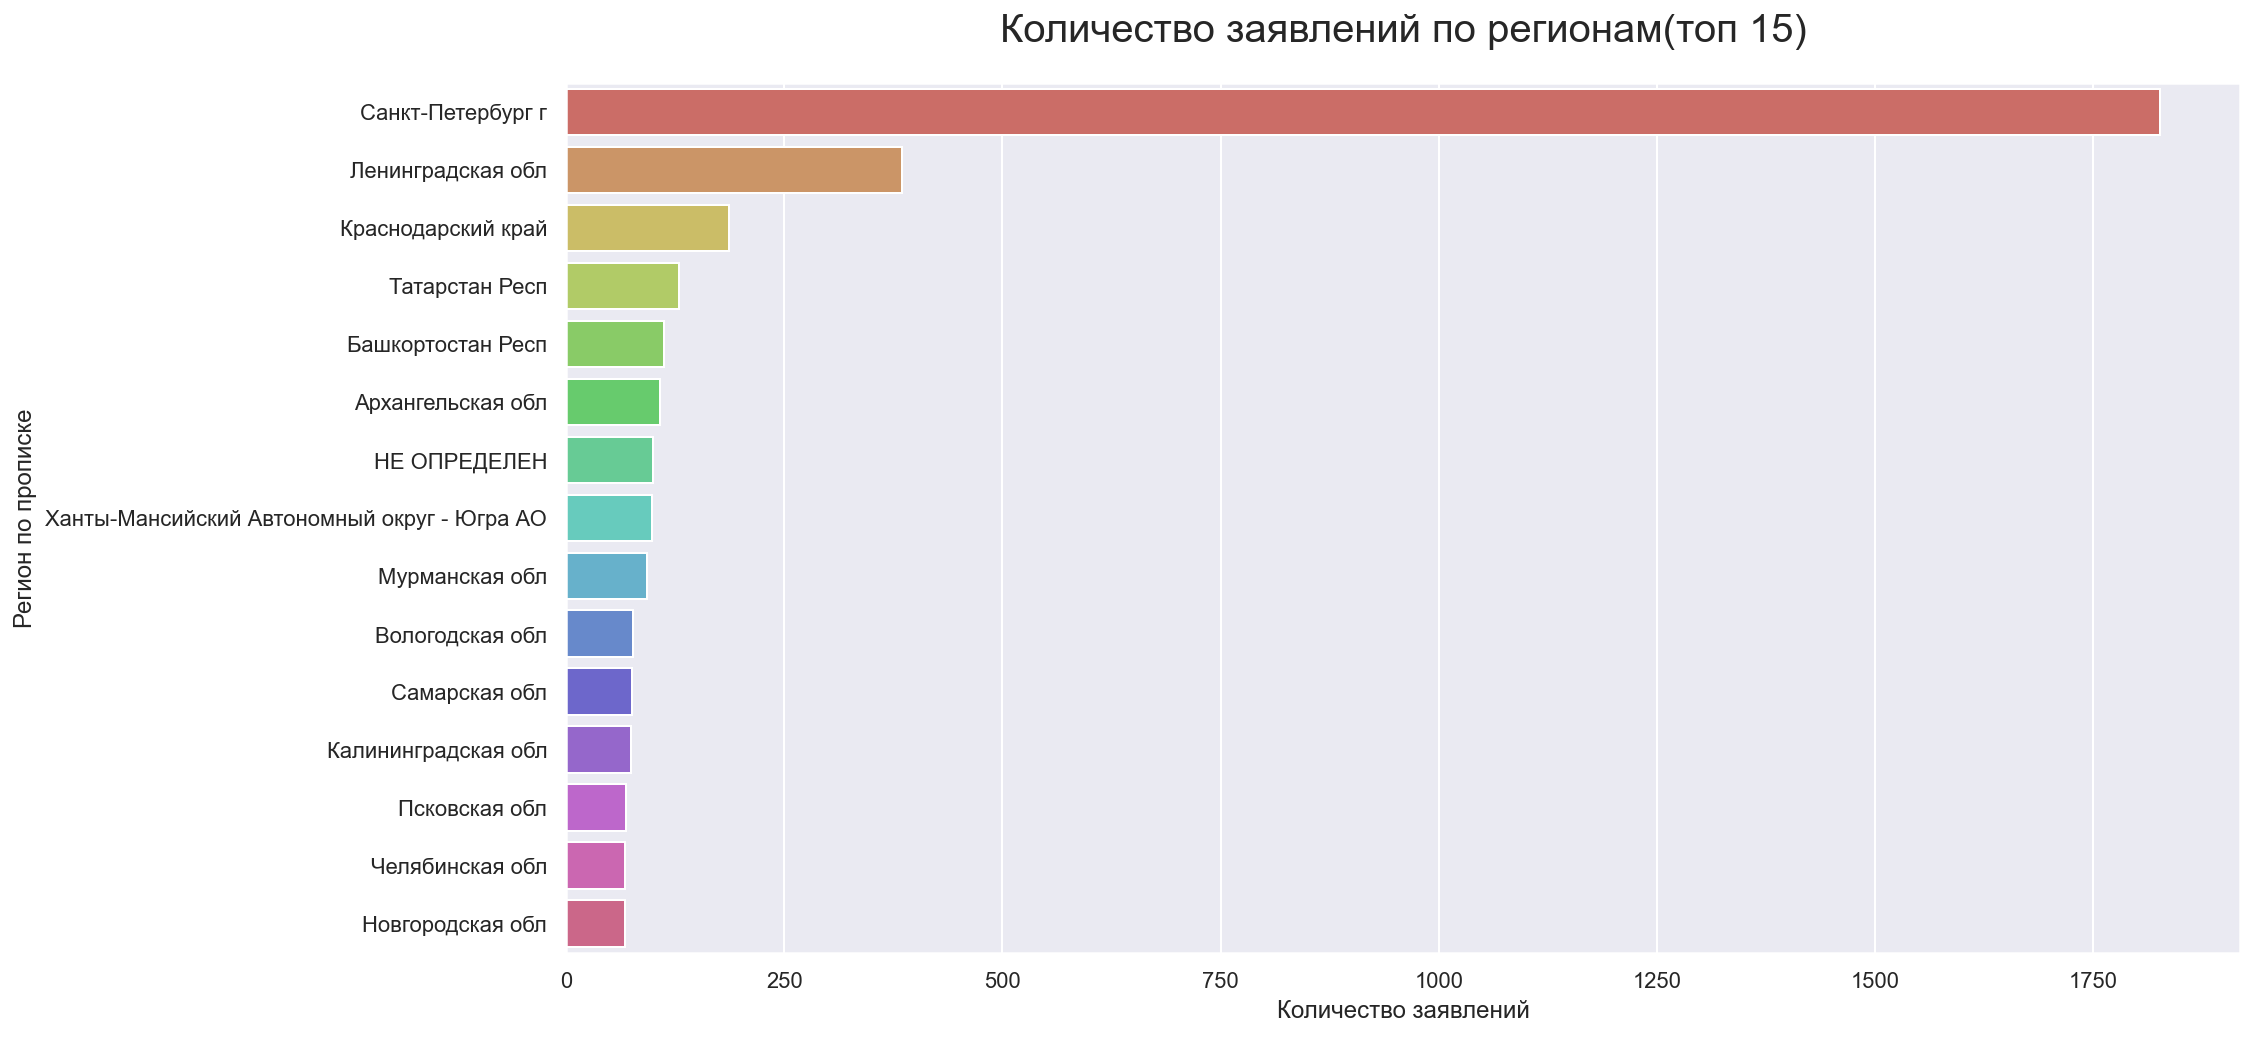

In [172]:
plt.figure(figsize=(15,8))
plt.title('Количество заявлений по регионам(топ 15)', fontsize = 20, loc = 'center')
ax = sns.barplot(x='Количество заявлений', y='Регион по прописке', data=df_region_by_registration, palette='hls')

### Наибольшее количество абитуриентов проживают в г. Санкт-Петербург

In [71]:
df_citizenship = df_fulltime[['Гражданство','Уникальный_код']]
df_citizenship

,Гражданство,Уникальный_код
0,РОССИЯ,702-875 69
1,РОССИЯ,702-875 69
2,РОССИЯ,702-875 69
3,РОССИЯ,702-875 69
4,РОССИЯ,530-013 41
...,...,...
29465,РОССИЯ,149-613 49
29466,РОССИЯ,149-613 49
29467,РОССИЯ,149-613 49
29468,РОССИЯ,149-613 49


In [72]:
df_citizenship.duplicated().sum()

22641

In [73]:
df_citizenship = df_citizenship.drop_duplicates()

In [74]:
df_citizenship.duplicated().sum()

0

In [75]:
df_citizenship = df_citizenship[['Гражданство','Уникальный_код']].groupby(['Гражданство']).count().reset_index().sort_values('Уникальный_код',ascending = False)
df_citizenship.columns = ['Гражданство','Количество заявлений']
df_citizenship = df_citizenship.iloc[:10]
df_citizenship

,Гражданство,Количество заявлений
15,РОССИЯ,5221
9,КАЗАХСТАН,47
4,БЕЛАРУСЬ,11
21,УЗБЕКИСТАН,9
19,ТУРКМЕНИЯ,9
18,ТАДЖИКИСТАН,8
0,АЗЕРБАЙДЖАН,4
11,КИТАЙ,4
8,ЙЕМЕН,2
10,КИРГИЗИЯ,2


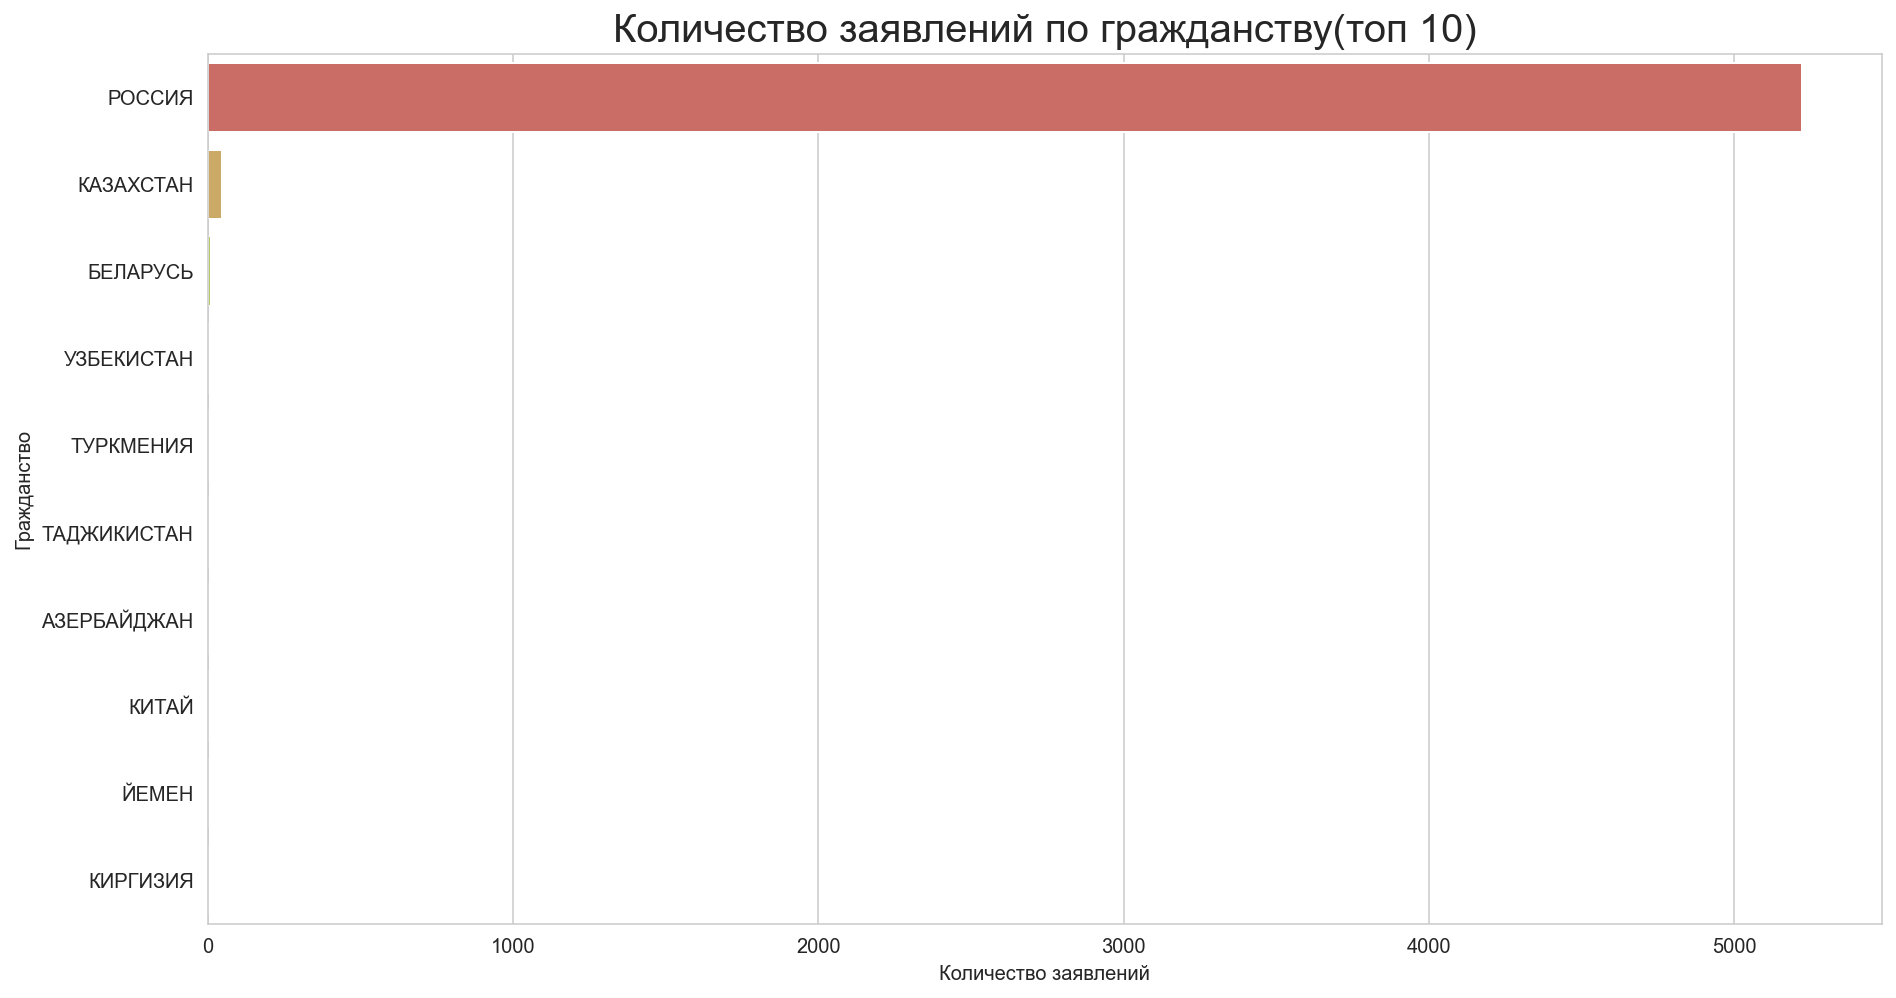

In [76]:
plt.figure(figsize=(15,8))
plt.title('Количество заявлений по гражданству(топ 10)', fontsize = 20, loc = 'center')
ax = sns.barplot(x='Количество заявлений', y='Гражданство', data=df_citizenship, palette='hls')

### Наибольшее количество абитуриентов имеют гражданство Российской Федерации

### 	Количество согласий по направлениям подготовки до момента публикации конкурсных списков

In [77]:
consent_to_enrollment=df_fulltime[df_fulltime['Дата_согласия_на_зачисление'] < '2022-07-27']
consent_to_enrollment = consent_to_enrollment[['Уникальный_код','Направление-специальность']]
consent_to_enrollment

,Уникальный_код,Направление-специальность
7,530-013 41,07.03.01 Архитектура
9,853-207 15,07.03.02 Реконструкция и реставрация архитекту...
29,753-573 07,08.05.01 Строительство уникальных зданий и соо...
31,98514,07.03.01 Архитектура
46,98491,08.03.01 Строительство
...,...,...
28685,951-268 72,40.03.01 Юриспруденция
28688,284-206 07,08.03.01 Строительство
28730,925-969 46,07.03.03 Дизайн архитектурной среды
29168,498-782 37,08.03.01 Строительство


In [78]:
consent_to_enrollment.duplicated().sum()

1

In [79]:
consent_to_enrollment = consent_to_enrollment.drop_duplicates()

In [80]:
consent_to_enrollment.duplicated().sum()

0

In [81]:
consent_to_enrollment=consent_to_enrollment[['Уникальный_код','Направление-специальность']].groupby(['Направление-специальность']).count().reset_index().sort_values('Уникальный_код',ascending = False)
consent_to_enrollment.columns = ['Направление','Количество согласий']
consent_to_enrollment

,Направление,Количество согласий
5,08.03.01 Строительство,159
6,08.05.01 Строительство уникальных зданий и соо...,71
1,07.03.01 Архитектура,46
22,40.03.01 Юриспруденция,45
23,40.05.03 Судебная экспертиза,41
19,38.03.02 Менеджмент,41
18,38.03.01 Экономика,41
21,38.05.01 Экономическая безопасность,33
2,07.03.02 Реконструкция и реставрация архитекту...,26
3,07.03.03 Дизайн архитектурной среды,23


In [82]:
consent_to_enrollment_top15 = consent_to_enrollment.iloc[:15]

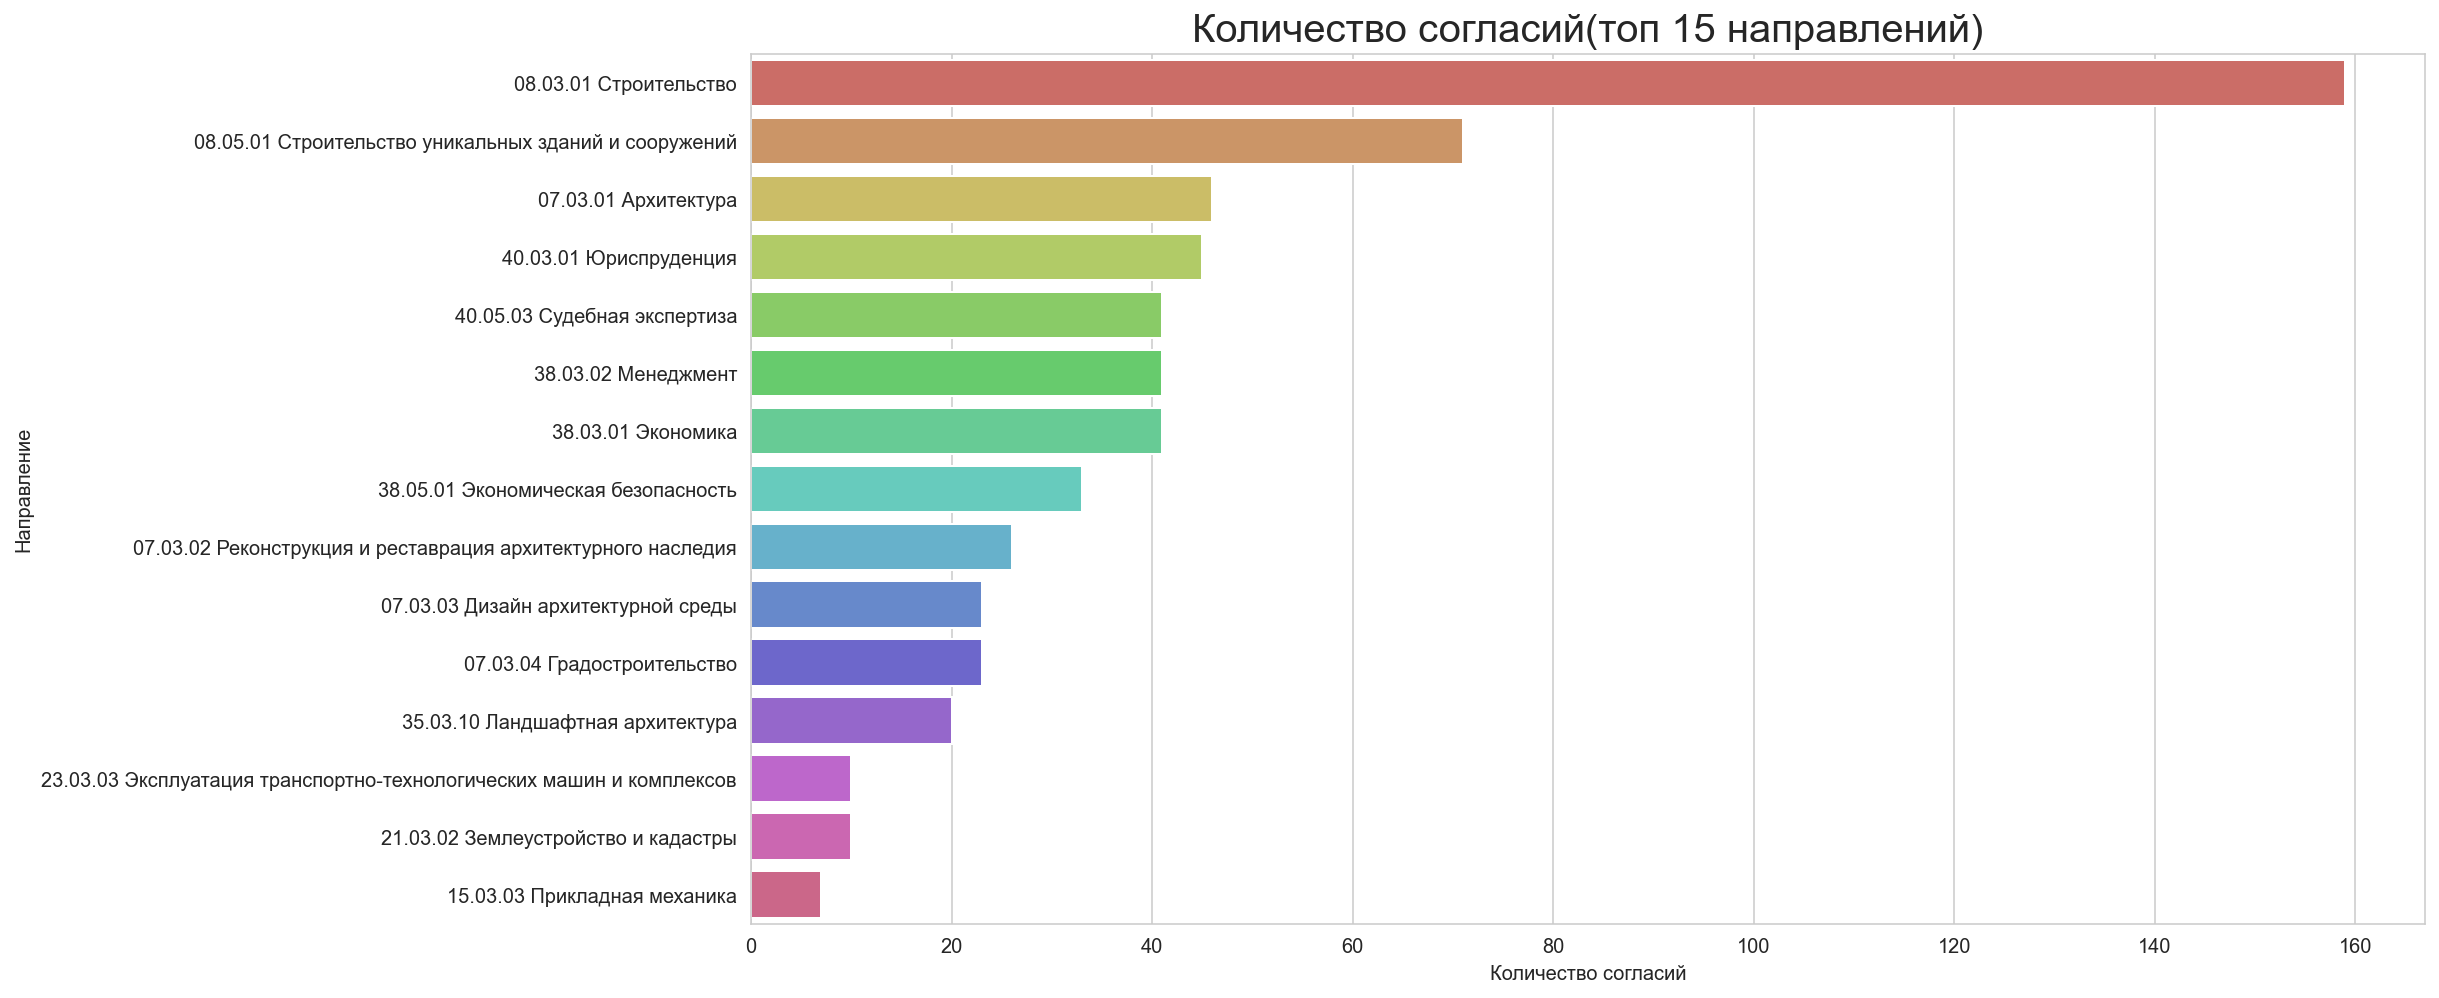

In [83]:
plt.figure(figsize=(15,8))
plt.title('Количество согласий(топ 15 направлений)', fontsize = 20, loc = 'center') 
ax = sns.barplot(x='Количество согласий', y='Направление', data=consent_to_enrollment_top15, palette='hls')

## Вывод по первой части задания:
- Дата начала приёма документов - 20 июня 2022 г., дата окончания приема документов - 31 августа 2022 г.
- Общее количество заявлений - 27975;
- Количество уникальных абитуриентов - 5334 человек;
- К увеличению колчества поданых заявлений приводит возможность у одного человека подавать заявления разным способом ('Суперсервис "Поступление в вуз онлайн"','Лично','Веб','Почта');
- 7 абитуриентов, указавших высшее образование, имеют возраст менее 22 лет. Из них 1 абитуриент указал одинаковый год рождения и окончания предыдущей ступени образования (скорее всего указали ошибочно). У всех абитуриентов, проставивших необоснованно высшее образование, документы поданы через Суперсервис "Поступление в вуз онлайн". Возможно необходимо внести предложение в сервис о проверке корректности ввода данных об образовании на основании даты рождения абитуриента;
- Большинство пропущенных значений выявлены по признакам "Гражанство", "Регион по прописке". Возможно необходимо предложить внести в формы для заполнения данных свойство обязательного заполнения поля. Кроме этого в указанных признаках встречается заполнение поля прочерком (необходимо учесть при корректировки свойства поля - добавить длину поля более одного символа, например);
- По признакам "Гражанство", "Регион по прописке" встречается некорректное наименование. Предлагается создание словарей для заполнения указанных признаков, что позволит пользователю вводить данные автозаполнением.

---
**Комментарий Юлии:**
Елена, у тебя хорошая работа! Немного надо поработать с датой и выводы изменятся. В регионах, обрати внимание,м ного некорректных наименований, их н

---

 ## Портрет абитуриента

### Проверим выбросы даных по признаку "Год завершения" 

In [84]:
df_fulltime['Год_завершения'] = df_fulltime['Год_завершения'].astype(int)

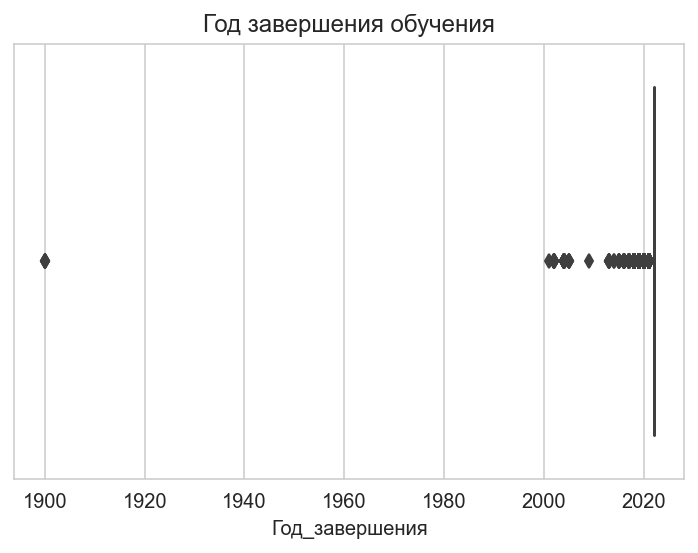

In [85]:
sns.boxplot(df_fulltime['Год_завершения']).set(title = 'Год завершения обучения');

### Признак "Год завершения" имеет один выброс со значением "1900"

In [86]:
df_fulltime[df_fulltime['Год_завершения'] == 1900]
# заявление абитуриента с уникальным номером 400-322 24 имеет значение признака "Год_завершения" = 1900, указана дата рождеия - 17.06.2004.
# возможно предположить, что Год завершения должен иметь значение - 2022. Проведем замену значения

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
22368,400-322 24,2022-07-10,183,0,Мужской,17.06.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,38.03.02 Менеджмент,факультет экономики и управления,Санкт-Петербург г,Среднее общее,1900,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
22370,400-322 24,2022-07-10,183,0,Мужской,17.06.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,38.03.01 Экономика,факультет экономики и управления,Санкт-Петербург г,Среднее общее,1900,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
22371,400-322 24,2022-07-10,183,0,Мужской,17.06.2004,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,38.03.01 Экономика,факультет экономики и управления,Санкт-Петербург г,Среднее общее,1900,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
22372,400-322 24,2022-07-10,183,0,Мужской,17.06.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,38.03.02 Менеджмент,факультет экономики и управления,Санкт-Петербург г,Среднее общее,1900,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0
22375,400-322 24,2022-07-10,183,0,Мужской,17.06.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,38.05.01 Экономическая безопасность,факультет экономики и управления,Санкт-Петербург г,Среднее общее,1900,Подано,"Суперсервис ""Поступление в вуз онлайн""",NaT,01.06.2022,18.0


In [87]:
df_fulltime['Год_завершения'].where(~(df_fulltime['Год_завершения'] == 1900), other = 2022, inplace=True)
df_fulltime['Год_завершения'].unique()

array([2022, 2021, 2020, 2019, 2018, 2016, 2017, 2004, 2015, 2013, 2005,
       2002, 2014, 2009, 2001])

### Проверим возраст абитуриентов на аномальные значения

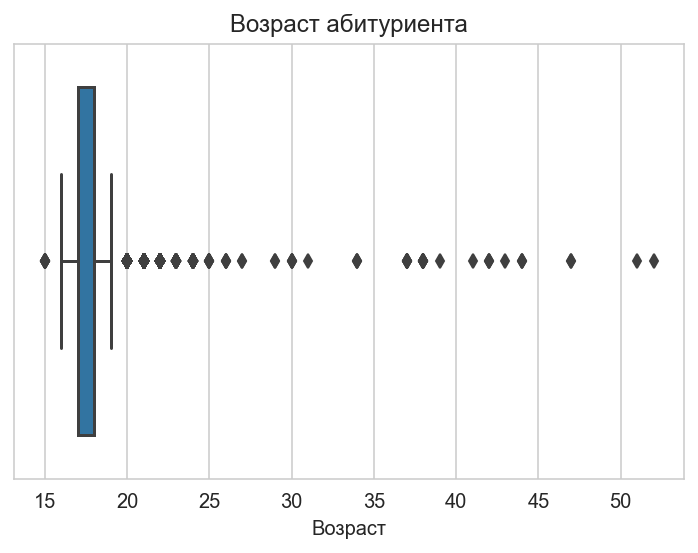

In [88]:
sns.boxplot(df_fulltime['Возраст']).set(title = 'Возраст абитуриента');

In [89]:
df_fulltime[df_fulltime['Возраст'] < 16.0].Уникальный_код.unique()

array(['730-042 99'], dtype=object)

### Найден один абитуриент младше 16 лет. Так как возраст поступления законодательно не ограничен, исключать запись не будем

### Проверим значения признака "Вид_образования" на разные значения для уникальных кодов абитуриентов

In [90]:
educ = df_fulltime[['Уникальный_код','Вид_образования']]
educ

,Уникальный_код,Вид_образования
0,702-875 69,Среднее общее
1,702-875 69,Среднее общее
2,702-875 69,Среднее общее
3,702-875 69,Среднее общее
4,530-013 41,Среднее общее
...,...,...
29465,149-613 49,Среднее общее
29466,149-613 49,Среднее общее
29467,149-613 49,Среднее общее
29468,149-613 49,Среднее общее


In [91]:
educ.duplicated().sum()

22640

In [92]:
educ = educ.drop_duplicates()

In [93]:
educ.duplicated().sum()

0

In [94]:
#разные значения вида образования для уникальных кодов абитуриентов не выявлены
educ = educ.groupby(['Уникальный_код']).Вид_образования.count().reset_index().sort_values('Вид_образования', ascending = False).head(15)
educ

,Уникальный_код,Вид_образования
2294,431-594 41,2
0,00044,1
3552,675-718 40,1
3560,676-160 20,1
3559,675-987 15,1
3558,675-931 44,1
3557,675-900 94,1
3556,675-791 49,1
3555,675-785 47,1
3554,675-773 47,1


## В соответствии с заданием выбираем для анализа две категории абитуриентов: 
- Зачисленный на контракт абитуриент;
- Ушедший абитуриент.

In [95]:
#делаем выборку абитуриентов, зачисленных с основанием поступления - "полное возмещение". 
#проверяем с помощью группировки и сортировки по убыванию наличие дубликатов - не выявлены. 
# можно сделать вывод, что всего абитуриентов, поступивших по указанному выше признаку - 714.
df_contract = df_fulltime[(df_fulltime['Состояние'] == 'Зачислен') & (df_fulltime['Основание_поступления'] == 'полное возмещение затрат')]
df_contract.groupby(['Уникальный_код']).Дата_подачи_заявления.count().reset_index().sort_values('Дата_подачи_заявления', ascending = False)

,Уникальный_код,Дата_подачи_заявления
0,003-449 61,1
490,707-338 11,1
470,677-127 98,1
471,680-433 60,1
472,680-856 21,1
...,...,...
240,349-578 31,1
241,349-607 83,1
242,350-361 52,1
243,350-729 82,1


In [96]:
df_contract

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
1148,434-986 16,2022-06-21,335,0,Женский,23.09.1999,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.04 Градостроительство,архитектурный факультет,Санкт-Петербург г,Высшее,2021,Зачислен,Лично,2022-07-22 14:37:40,01.06.2022,22.0
1154,84045,2022-06-30,334,0,Женский,15.07.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Краснодарский край,Среднее общее,2022,Зачислен,Веб,2022-08-09 14:14:34,01.06.2022,17.0
1160,96120,2022-07-29,334,0,Женский,24.11.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Костромская обл,Среднее общее,2022,Зачислен,Веб,2022-08-11 10:08:29,01.06.2022,17.0
1279,232-617 77,2022-06-27,331,0,Женский,20.04.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Зачислен,Лично,2022-07-27 13:09:59,01.06.2022,18.0
1431,043-849 78,2022-06-27,327,0,Женский,27.09.2004,РОССИЯ,полное возмещение затрат,На общих основаниях,очная,...,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Зачислен,Лично,2022-08-09 16:25:25,01.06.2022,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,05879,2022-08-11,100,0,Мужской,19.12.2004,ТАДЖИКИСТАН,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,НЕ ОПРЕДЕЛЕН,Среднее общее,2022,Зачислен,Веб,2022-08-30 10:29:06,01.06.2022,17.0
28542,04756,2022-07-22,95,0,Мужской,22.08.1992,ТУРКМЕНИЯ,полное возмещение затрат,На общих основаниях,очная,...,23.03.03 Эксплуатация транспортно-технологичес...,автомобильно-дорожный факультет,НЕ ОПРЕДЕЛЕН,Среднее общее,2009,Зачислен,Веб,2022-08-23 11:56:05,01.06.2022,29.0
28544,69971,2022-08-02,95,0,Мужской,22.01.1995,МАРОККО,полное возмещение затрат,На общих основаниях,очная,...,38.03.02 Менеджмент,факультет экономики и управления,НЕ ОПРЕДЕЛЕН,Среднее общее,2013,Зачислен,Лично,2022-08-02 15:33:27,01.06.2022,27.0
28575,04644,2022-08-26,90,0,Мужской,04.09.2002,ТАДЖИКИСТАН,полное возмещение затрат,На общих основаниях,очная,...,09.03.02 Информационные системы и технологии,строительный факультет,Санкт-Петербург г,Среднее общее,2020,Зачислен,Веб,2022-08-26 11:13:09,01.06.2022,20.0


In [97]:
df_contract_oll = df_fulltime[df_fulltime['Состояние'] == 'Зачислен']
df_contract_oll

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
2,702-875 69,2022-07-30,323,0,Женский,14.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.01 Архитектура,архитектурный факультет,Татарстан Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 11:41:43,01.06.2022,17.0
7,530-013 41,2022-07-04,301,0,Женский,22.10.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.01 Архитектура,архитектурный факультет,Санкт-Петербург г,Среднее общее,2022,Зачислен,Лично,2022-07-25 12:28:56,01.06.2022,17.0
9,853-207 15,2022-06-22,295,0,Женский,31.12.2003,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.02 Реконструкция и реставрация архитекту...,архитектурный факультет,Санкт-Петербург г,Среднее общее,2021,Зачислен,Лично,2022-07-25 13:06:48,01.06.2022,18.0
12,96659,2022-07-20,288,0,Мужской,23.01.2000,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,35.03.10 Ландшафтная архитектура,архитектурный факультет,Ханты-Мансийский Автономный округ - Югра АО,Среднее специальное,2020,Зачислен,Веб,2022-07-27 16:45:04,01.06.2022,22.0
16,354-557 60,2022-07-30,288,5,Женский,05.08.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.01 Архитектура,архитектурный факультет,Мордовия Респ,Среднее общее,2022,Зачислен,"Суперсервис ""Поступление в вуз онлайн""",2022-07-30 13:32:33,01.06.2022,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28489,05879,2022-08-11,100,0,Мужской,19.12.2004,ТАДЖИКИСТАН,полное возмещение затрат,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,НЕ ОПРЕДЕЛЕН,Среднее общее,2022,Зачислен,Веб,2022-08-30 10:29:06,01.06.2022,17.0
28542,04756,2022-07-22,95,0,Мужской,22.08.1992,ТУРКМЕНИЯ,полное возмещение затрат,На общих основаниях,очная,...,23.03.03 Эксплуатация транспортно-технологичес...,автомобильно-дорожный факультет,НЕ ОПРЕДЕЛЕН,Среднее общее,2009,Зачислен,Веб,2022-08-23 11:56:05,01.06.2022,29.0
28544,69971,2022-08-02,95,0,Мужской,22.01.1995,МАРОККО,полное возмещение затрат,На общих основаниях,очная,...,38.03.02 Менеджмент,факультет экономики и управления,НЕ ОПРЕДЕЛЕН,Среднее общее,2013,Зачислен,Лично,2022-08-02 15:33:27,01.06.2022,27.0
28575,04644,2022-08-26,90,0,Мужской,04.09.2002,ТАДЖИКИСТАН,полное возмещение затрат,На общих основаниях,очная,...,09.03.02 Информационные системы и технологии,строительный факультет,Санкт-Петербург г,Среднее общее,2020,Зачислен,Веб,2022-08-26 11:13:09,01.06.2022,20.0


In [98]:
len(df_contract_oll['Уникальный_код'].unique())

1900

In [99]:
#сформируем список абитуриентов, зачисленных на одно из направлений
list_df_contract_oll = df_contract_oll['Уникальный_код'].tolist()
list_df_contract_oll

['702-875 69',
 '530-013 41',
 '853-207 15',
 '96659',
 '354-557 60',
 '753-573 07',
 '98514',
 '782-989 39',
 '98491',
 '263-217 38',
 '98909',
 '644-977 65',
 '730-327 52',
 '573-055 63',
 '970-773 33',
 '01180',
 '947-972 92',
 '131-087 02',
 '223-408 95',
 '737-946 44',
 '176-022 77',
 '170-657 66',
 '152-497 72',
 '602-894 22',
 '573-054 62',
 '00496',
 '838-961 11',
 '81089',
 '515-342 21',
 '054-006 59',
 '00598',
 '100-601 72',
 '097-802 70',
 '949-032 02',
 '410-083 32',
 '339-986 57',
 '226-516 30',
 '542-241 68',
 '637-907 16',
 '400-924 60',
 '96293',
 '783-576 47',
 '032-457 71',
 '138-190 50',
 '330-182 46',
 '96321',
 '975-481 42',
 '423-061 57',
 '954-614 03',
 '305-202 23',
 '511-865 78',
 '639-927 53',
 '286-465 97',
 '944-760 82',
 '265-078 92',
 '556-313 49',
 '850-881 78',
 '460-681 42',
 '951-935 16',
 '224-133 85',
 '647-870 92',
 '208-946 97',
 '562-797 61',
 '022-873 55',
 '144-112 68',
 '694-398 23',
 '316-292 64',
 '675-440 29',
 '618-838 22',
 '96291',
 '735

In [100]:
#сделаем выборку абитуриентов, не зачисленных в уинверситет
df_not_contract = df_fulltime[df_fulltime['Состояние'] != 'Зачислен']
df_not_contract = df_not_contract[~df_not_contract['Уникальный_код'].isin(list_df_contract_oll)]
df_not_contract

,Уникальный_код,Дата_подачи_заявления,Сумма_баллов,Баллы_конкурсные,Пол,Дата_рождения,Гражданство,Основание_поступления,Категория_приема,Форма_обучения,...,Направление-специальность,Факультет,Регион_по_прописке,Вид_образования,Год_завершения,Состояние,Доставка_документов,Дата_согласия_на_зачисление,dateNow,Возраст
27,742-177 65,2022-07-22,270,0,Мужской,15.01.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,38.03.02 Менеджмент,факультет экономики и управления,Санкт-Петербург г,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
28,742-177 65,2022-07-22,270,0,Мужской,15.01.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,38.03.01 Экономика,факультет экономики и управления,Санкт-Петербург г,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
38,01247,2022-07-08,259,0,Женский,02.05.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.03 Дизайн архитектурной среды,архитектурный факультет,Хабаровский край,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
39,01247,2022-07-08,259,0,Женский,02.05.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,07.03.01 Архитектура,архитектурный факультет,Хабаровский край,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,18.0
52,784-901 36,2022-06-30,239,0,Женский,13.09.2004,РОССИЯ,бюджетная основа,Имеющие особое право,очная,...,21.03.02 Землеустройство и кадастры,факультет инженерной экологии и городского хоз...,Саратовская обл,Среднее общее,2022,Подано,Веб,NaT,01.06.2022,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29465,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,08.03.01 Строительство,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0
29466,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,15.03.03 Прикладная механика,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0
29467,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,01.03.02 Прикладная математика и информатика,строительный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0
29468,149-613 49,2022-07-22,0,0,Мужской,25.07.2000,РОССИЯ,бюджетная основа,На общих основаниях,очная,...,23.03.01 Технология транспортных процессов,автомобильно-дорожный факультет,Санкт-Петербург г,Среднее общее,2018,Подано,Веб,NaT,01.06.2022,21.0


In [101]:
#сформируем датафрейм для уникальных абитуриентов, которые не были зачислены
df_not_contract_unique = df_not_contract[['Уникальный_код','Сумма_баллов','Пол','Регион_по_прописке','Вид_образования','Возраст']]
df_not_contract_unique

,Уникальный_код,Сумма_баллов,Пол,Регион_по_прописке,Вид_образования,Возраст
27,742-177 65,270,Мужской,Санкт-Петербург г,Среднее общее,18.0
28,742-177 65,270,Мужской,Санкт-Петербург г,Среднее общее,18.0
38,01247,259,Женский,Хабаровский край,Среднее общее,18.0
39,01247,259,Женский,Хабаровский край,Среднее общее,18.0
52,784-901 36,239,Женский,Саратовская обл,Среднее общее,17.0
...,...,...,...,...,...,...
29465,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0
29466,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0
29467,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0
29468,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0


In [102]:
df_not_contract_unique.duplicated().sum()

13128

In [103]:
df_not_contract_unique[df_not_contract_unique.duplicated(keep=False)]

,Уникальный_код,Сумма_баллов,Пол,Регион_по_прописке,Вид_образования,Возраст
27,742-177 65,270,Мужской,Санкт-Петербург г,Среднее общее,18.0
28,742-177 65,270,Мужской,Санкт-Петербург г,Среднее общее,18.0
38,01247,259,Женский,Хабаровский край,Среднее общее,18.0
39,01247,259,Женский,Хабаровский край,Среднее общее,18.0
52,784-901 36,239,Женский,Саратовская обл,Среднее общее,17.0
...,...,...,...,...,...,...
29465,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0
29466,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0
29467,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0
29468,149-613 49,0,Мужской,Санкт-Петербург г,Среднее общее,21.0


In [104]:
df_not_contract_unique = df_not_contract_unique.drop_duplicates()
df_not_contract_unique.duplicated().sum()

0

In [105]:
df_not_contract_unique

,Уникальный_код,Сумма_баллов,Пол,Регион_по_прописке,Вид_образования,Возраст
27,742-177 65,270,Мужской,Санкт-Петербург г,Среднее общее,18.0
38,01247,259,Женский,Хабаровский край,Среднее общее,18.0
52,784-901 36,239,Женский,Саратовская обл,Среднее общее,17.0
59,077-211 20,232,Женский,Пермский край,Среднее общее,17.0
60,445-460 75,232,Мужской,Санкт-Петербург г,Среднее общее,18.0
...,...,...,...,...,...,...
29447,74598,0,Мужской,Челябинская обл,Среднее специальное,23.0
29453,041-541 96,0,Мужской,Санкт-Петербург г,Среднее общее,34.0
29456,02250,0,Мужской,НЕ ОПРЕДЕЛЕН,Среднее общее,17.0
29462,932-664 04,0,Мужской,Мурманская обл,Среднее специальное,20.0


In [106]:
#сформируем датафрейм из признаков 'Уникальный_код' и 'Пол' и далее очистим записи от дубликатов для того, чтобы
#найти уникальное количество абитуриентов, не зачисленных в университет, и разделим их по полу.
df_not_contract_sex = pd.DataFrame({'Уникальный_код':df_not_contract_unique['Уникальный_код'],'Пол':df_not_contract_unique['Пол']})
df_not_contract_sex

,Уникальный_код,Пол
27,742-177 65,Мужской
38,01247,Женский
52,784-901 36,Женский
59,077-211 20,Женский
60,445-460 75,Мужской
...,...,...
29447,74598,Мужской
29453,041-541 96,Мужской
29456,02250,Мужской
29462,932-664 04,Мужской


In [107]:
df_not_contract_sex.duplicated().sum()

350

In [108]:
df_not_contract_sex[df_not_contract_sex.duplicated(keep=False)]

,Уникальный_код,Пол
301,164-053 49,Женский
307,164-053 49,Женский
336,96939,Женский
1181,008-119 78,Мужской
1302,315-421 88,Женский
...,...,...
29254,431-594 41,Мужской
29291,969-706 05,Мужской
29295,501-801 70,Мужской
29298,762-569 76,Женский


In [109]:
df_not_contract_sex = df_not_contract_sex.drop_duplicates()

In [110]:
df_not_contract_sex.duplicated().sum()

0

In [111]:
df_not_contract_sex

,Уникальный_код,Пол
27,742-177 65,Мужской
38,01247,Женский
52,784-901 36,Женский
59,077-211 20,Женский
60,445-460 75,Мужской
...,...,...
29447,74598,Мужской
29453,041-541 96,Мужской
29456,02250,Мужской
29462,932-664 04,Мужской


### Группировка по полу для двух категорий (зачислен по контракту, не зачислен)

In [112]:
# зачислен по контракту
df_contract_sex = df_contract.groupby(['Пол']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_sex.columns = ['Пол','Количество']
df_contract_sex

,Пол,Количество
0,Женский,373
1,Мужской,341


In [113]:
# не зачислен
df_not_contract_sex = df_not_contract_sex.groupby(['Пол']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_sex.columns = ['Пол','Количество']
df_not_contract_sex

,Пол,Количество
0,Женский,1774
1,Мужской,1660


### Группировка по возрасту по двум категориям (зачислен по контракту, не зачислен)

In [114]:
# зачислен по контракту
df_contract_age = df_contract.groupby(['Возраст']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_age.columns = ['Возраст','Количество']
df_contract_age['Процент'] = round(df_contract_age['Количество'] / len(df_fulltime.Уникальный_код.unique()) * 100,1)
df_contract_age

,Возраст,Количество,Процент
3,18.0,314,5.9
2,17.0,269,5.0
4,19.0,67,1.3
5,20.0,23,0.4
6,21.0,22,0.4
7,22.0,6,0.1
1,16.0,5,0.1
9,24.0,2,0.0
11,27.0,2,0.0
0,15.0,1,0.0


In [115]:
#сформируем датафрейм из признаков 'Уникальный_код' и 'Возраст' и далее очистим записи от дубликатов для того, чтобы
#найти уникальное количество абитуриентов, не зачисленных в университет, и разделим их по возрасту.
df_not_contract_age = pd.DataFrame({'Уникальный_код':df_not_contract_unique['Уникальный_код'],'Возраст':df_not_contract_unique['Возраст']})
df_not_contract_age.columns = ['Уникальный_код','Возраст']
df_not_contract_age

,Уникальный_код,Возраст
27,742-177 65,18.0
38,01247,18.0
52,784-901 36,17.0
59,077-211 20,17.0
60,445-460 75,18.0
...,...,...
29447,74598,23.0
29453,041-541 96,34.0
29456,02250,17.0
29462,932-664 04,20.0


In [116]:
df_not_contract_age.duplicated().sum()

350

In [117]:
df_not_contract_age[df_not_contract_age.duplicated(keep=False)]

,Уникальный_код,Возраст
301,164-053 49,18.0
307,164-053 49,18.0
336,96939,16.0
1181,008-119 78,18.0
1302,315-421 88,17.0
...,...,...
29254,431-594 41,22.0
29291,969-706 05,20.0
29295,501-801 70,18.0
29298,762-569 76,17.0


In [118]:
df_not_contract_age = df_not_contract_age.drop_duplicates()

In [119]:
df_not_contract_age.duplicated().sum()

0

In [120]:
df_not_contract_age

,Уникальный_код,Возраст
27,742-177 65,18.0
38,01247,18.0
52,784-901 36,17.0
59,077-211 20,17.0
60,445-460 75,18.0
...,...,...
29447,74598,23.0
29453,041-541 96,34.0
29456,02250,17.0
29462,932-664 04,20.0


In [121]:
# не зачислен
df_not_contract_age = df_not_contract_age.groupby(['Возраст']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_age.columns = ['Возраст','Количество']
df_not_contract_age['Процент'] = round(df_not_contract_age['Количество'] / len(df_fulltime.Уникальный_код.unique()) * 100,1)
df_not_contract_age

,Возраст,Количество,Процент
2,18.0,1501,28.1
1,17.0,1391,26.1
3,19.0,249,4.7
4,20.0,120,2.2
5,21.0,67,1.3
0,16.0,54,1.0
6,22.0,19,0.4
7,23.0,9,0.2
8,24.0,8,0.1
17,39.0,1,0.0


### Группировка по количеству  входных баллов для двух категорий (зачислен по контракту, не зачислен)

In [122]:
# зачислен по контракту
df_contract_input_score = df_contract.groupby(['Сумма_баллов']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_input_score.columns = ['Сумма_баллов','Количество']
df_contract_input_score

,Сумма_баллов,Количество
42,164,14
73,195,13
48,170,13
60,182,13
78,200,13
...,...,...
122,259,1
123,270,1
124,274,1
126,287,1


In [123]:
#сформируем датафрейм из признаков 'Уникальный_код' и 'Сумма_баллов'.
df_not_contract_input_score = df_not_contract_unique.groupby(['Сумма_баллов']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_input_score.columns = ['Сумма_баллов','Количество']
df_not_contract_input_score = df_not_contract_input_score.iloc[:50]
df_not_contract_input_score

,Сумма_баллов,Количество
0,0,153
155,212,46
150,207,43
161,218,42
157,214,42
145,202,41
163,220,41
146,203,41
164,221,39
147,204,39


### Группировка по образованию по двум категориям (зачислен по контракту, не зачислен)

In [124]:
# зачислен по контракту
df_contract_education = df_contract.groupby(['Вид_образования']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_education.columns = ['Вид_образования','Количество']
df_contract_education

,Вид_образования,Количество
1,Среднее общее,666
2,Среднее специальное,46
0,Высшее,2


In [125]:
#сформируем датафрейм из признаков 'Уникальный_код' и 'Вид_образования' и далее очистим записи от дубликатов для того, чтобы
#найти уникальное количество абитуриентов, не зачисленных в университет, и разделим их по образованию.
df_not_contract_education = pd.DataFrame({'Уникальный_код':df_not_contract_unique['Уникальный_код'],'Вид_образования':df_not_contract_unique['Вид_образования']})
df_not_contract_education.columns = ['Уникальный_код','Вид_образования']
df_not_contract_education

,Уникальный_код,Вид_образования
27,742-177 65,Среднее общее
38,01247,Среднее общее
52,784-901 36,Среднее общее
59,077-211 20,Среднее общее
60,445-460 75,Среднее общее
...,...,...
29447,74598,Среднее специальное
29453,041-541 96,Среднее общее
29456,02250,Среднее общее
29462,932-664 04,Среднее специальное


In [126]:
df_not_contract_education.duplicated().sum()

349

In [127]:
df_not_contract_education[df_not_contract_education.duplicated(keep=False)]

,Уникальный_код,Вид_образования
301,164-053 49,Среднее общее
307,164-053 49,Среднее общее
336,96939,Среднее общее
1181,008-119 78,Среднее общее
1302,315-421 88,Среднее общее
...,...,...
29251,99595,Среднее специальное
29291,969-706 05,Среднее общее
29295,501-801 70,Среднее общее
29298,762-569 76,Среднее общее


In [128]:
df_not_contract_education = df_not_contract_education.drop_duplicates()

In [129]:
df_not_contract_education.duplicated().sum()

0

In [130]:
df_not_contract_education

,Уникальный_код,Вид_образования
27,742-177 65,Среднее общее
38,01247,Среднее общее
52,784-901 36,Среднее общее
59,077-211 20,Среднее общее
60,445-460 75,Среднее общее
...,...,...
29447,74598,Среднее специальное
29453,041-541 96,Среднее общее
29456,02250,Среднее общее
29462,932-664 04,Среднее специальное


In [131]:
df_not_contract_education.groupby(['Уникальный_код']).Вид_образования.count().reset_index().sort_values('Вид_образования', ascending = False).head(10)

,Уникальный_код,Вид_образования
1487,431-594 41,2
0,00044,1
2293,675-490 12,1
2283,672-737 97,1
2284,673-348 26,1
2285,673-353 99,1
2286,673-478 09,1
2287,674-088 31,1
2288,674-224 85,1
2289,674-550 22,1


In [132]:
# не зачислен
df_not_contract_education = df_not_contract_education.groupby(['Вид_образования']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_education.columns = ['Вид_образования','Количество']
df_not_contract_education

,Вид_образования,Количество
1,Среднее общее,3210
2,Среднее специальное,221
0,Высшее,4


### Группировка по региону проживания по двум категориям (зачислен по контракту, не зачислен)

In [133]:
# зачислен по контракту
df_contract_region = df_contract.groupby(['Регион_по_прописке']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_region.columns = ['Регион_по_прописке','Количество']
df_contract_region = df_contract_region.iloc[:10]
df_contract_region

,Регион_по_прописке,Количество
47,Санкт-Петербург г,317
27,Ленинградская обл,64
23,Краснодарский край,23
32,НЕ ОПРЕДЕЛЕН,23
31,Мурманская обл,19
65,Ханты-Мансийский Автономный округ - Югра АО,13
35,Новгородская обл,12
55,Ставропольский край,10
24,Красноярский край,10
50,Сахалинская обл,9


In [134]:
#сформируем датафрейм из признаков 'Уникальный_код' и 'Регион_по_прописке' и далее очистим записи от дубликатов для того, чтобы
#найти уникальное количество абитуриентов, не зачисленных в университет, и разделим их по региону прописки.
df_not_contract_region = pd.DataFrame({'Уникальный_код':df_not_contract_unique['Уникальный_код'],'Регион_по_прописке':df_not_contract_unique['Регион_по_прописке']})
df_not_contract_region.columns = ['Уникальный_код','Регион_по_прописке']
df_not_contract_region

,Уникальный_код,Регион_по_прописке
27,742-177 65,Санкт-Петербург г
38,01247,Хабаровский край
52,784-901 36,Саратовская обл
59,077-211 20,Пермский край
60,445-460 75,Санкт-Петербург г
...,...,...
29447,74598,Челябинская обл
29453,041-541 96,Санкт-Петербург г
29456,02250,НЕ ОПРЕДЕЛЕН
29462,932-664 04,Мурманская обл


In [135]:
df_not_contract_region.duplicated().sum()

350

In [136]:
df_not_contract_region[df_not_contract_region.duplicated(keep=False)]

,Уникальный_код,Регион_по_прописке
301,164-053 49,Иркутская обл
307,164-053 49,Иркутская обл
336,96939,Алтай Респ
1181,008-119 78,Пермский край
1302,315-421 88,Санкт-Петербург г
...,...,...
29254,431-594 41,Рязанская обл
29291,969-706 05,Костромская обл
29295,501-801 70,Красноярский край
29298,762-569 76,Амурская обл


In [137]:
df_not_contract_region = df_not_contract_region.drop_duplicates()

In [138]:
df_not_contract_region.duplicated().sum()

0

In [139]:
df_not_contract_region

,Уникальный_код,Регион_по_прописке
27,742-177 65,Санкт-Петербург г
38,01247,Хабаровский край
52,784-901 36,Саратовская обл
59,077-211 20,Пермский край
60,445-460 75,Санкт-Петербург г
...,...,...
29447,74598,Челябинская обл
29453,041-541 96,Санкт-Петербург г
29456,02250,НЕ ОПРЕДЕЛЕН
29462,932-664 04,Мурманская обл


In [140]:
df_not_contract_region = df_not_contract_region.groupby(['Регион_по_прописке']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_region.columns = ['Регион_по_прописке','Количество']
df_not_contract_region = df_not_contract_region.iloc[:10]
df_not_contract_region

,Регион_по_прописке,Количество
60,Санкт-Петербург г,1043
37,Ленинградская обл,230
32,Краснодарский край,124
70,Татарстан Респ,103
6,Башкортостан Респ,82
4,Архангельская обл,73
80,Ханты-Мансийский Автономный округ - Югра АО,65
22,Калининградская обл,57
59,Самарская обл,56
44,Мурманская обл,54


### Группировка по способу подачи документов по двум категориям (зачислен по контракту, не зачислен)

In [141]:
#зачислен
df_contract_count_statements = df_contract.groupby(['Доставка_документов']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_count_statements.columns = ['Доставка_документов','Количество']
df_contract_count_statements

,Доставка_документов,Количество
1,Лично,364
0,Веб,225
3,"Суперсервис ""Поступление в вуз онлайн""",121
2,Почта,4


In [142]:
#не зачислен
df_not_contract_count_statements = df_not_contract.groupby(['Доставка_документов']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_count_statements.columns = ['Доставка_документов','Количество']
df_not_contract_count_statements

,Доставка_документов,Количество
3,"Суперсервис ""Поступление в вуз онлайн""",7548
0,Веб,5652
1,Лично,3648
2,Почта,64


### Группировка по направлениям обучения по двум категориям (зачислен по контракту, не зачислен)

In [143]:
#зачислен
df_contract_direction = df_contract.groupby(['Направление-специальность']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_contract_direction.columns = ['Специальность','Количество']
df_contract_direction

,Специальность,Количество
5,08.03.01 Строительство,96
16,38.03.02 Менеджмент,78
19,40.05.03 Судебная экспертиза,76
15,38.03.01 Экономика,73
18,40.03.01 Юриспруденция,71
6,08.05.01 Строительство уникальных зданий и соо...,66
17,38.05.01 Экономическая безопасность,53
4,07.03.04 Градостроительство,39
2,07.03.02 Реконструкция и реставрация архитекту...,38
1,07.03.01 Архитектура,29


In [144]:
#не зачислен
df_not_contract_direction = df_not_contract.groupby(['Направление-специальность']).Уникальный_код.count().reset_index().sort_values('Уникальный_код', ascending = False)
df_not_contract_direction.columns = ['Специальность','Количество']
df_not_contract_direction

,Специальность,Количество
5,08.03.01 Строительство,2912
6,08.05.01 Строительство уникальных зданий и соо...,1153
17,35.03.10 Ландшафтная архитектура,971
1,07.03.01 Архитектура,950
12,21.03.02 Землеустройство и кадастры,803
3,07.03.03 Дизайн архитектурной среды,803
4,07.03.04 Градостроительство,791
11,20.03.01 Техносферная безопасность,785
13,23.03.01 Технология транспортных процессов,782
10,15.03.03 Прикладная механика,780


### Для визуализации уникальных данных используем ранее подготовленные датафреймы:

#### по полу:
- df_contract_sex
- df_not_contract_sex

#### по возрасту
- df_contract_age
- df_not_contract_age

#### по образованию
- df_contract_education
- df_not_contract_education

#### по количеству входных баллов
- df_contract_input_score
- df_not_contract_input_score

#### по региону проживания
- df_contract_region 
- df_not_contract_region

#### по способуподачи документов
- df_contract_count_statements
- df_not_contract_count_statements

#### по направлению обучения
- df_contract_direction
- df_not_contract_direction

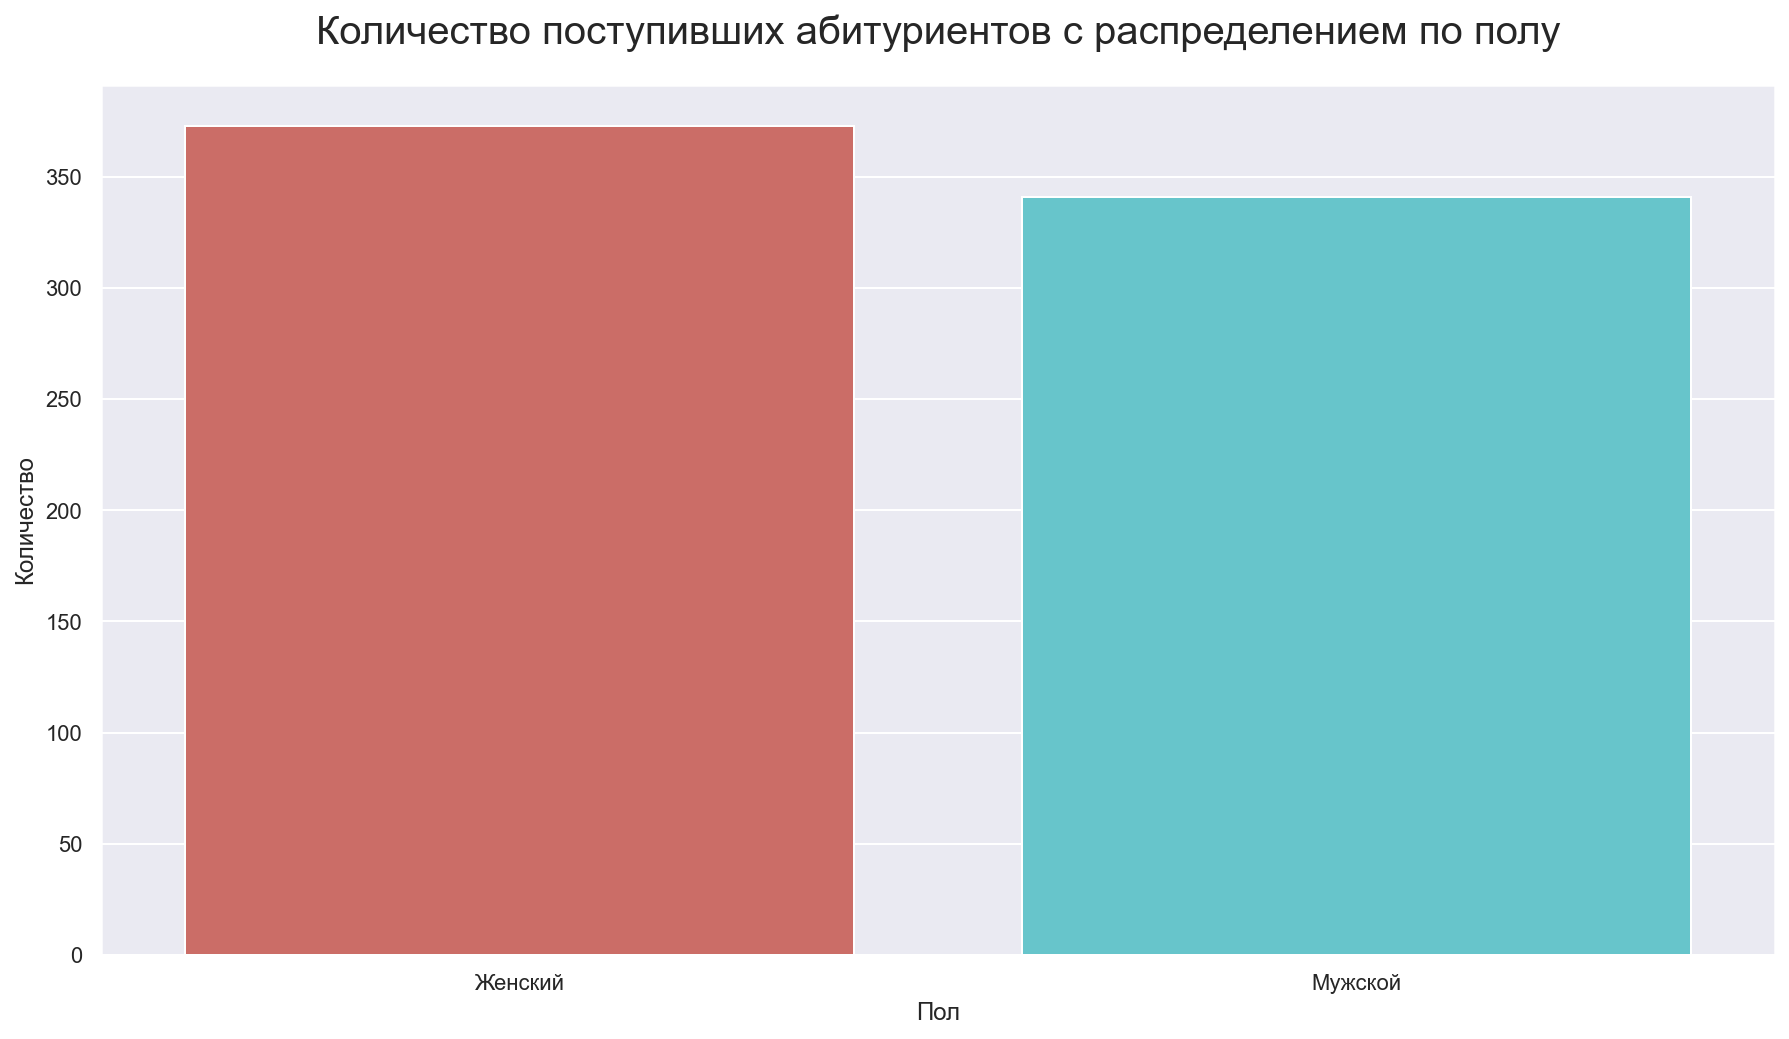

In [173]:
plt.rc('axes', titlesize = 20, titlepad = 20.5)
gr= sns.barplot(x="Пол", y="Количество", data=df_contract_sex, palette='hls').set(title = 'Количество поступивших абитуриентов с распределением по полу');

### Нет значительной разницы среди поступивших по полу.

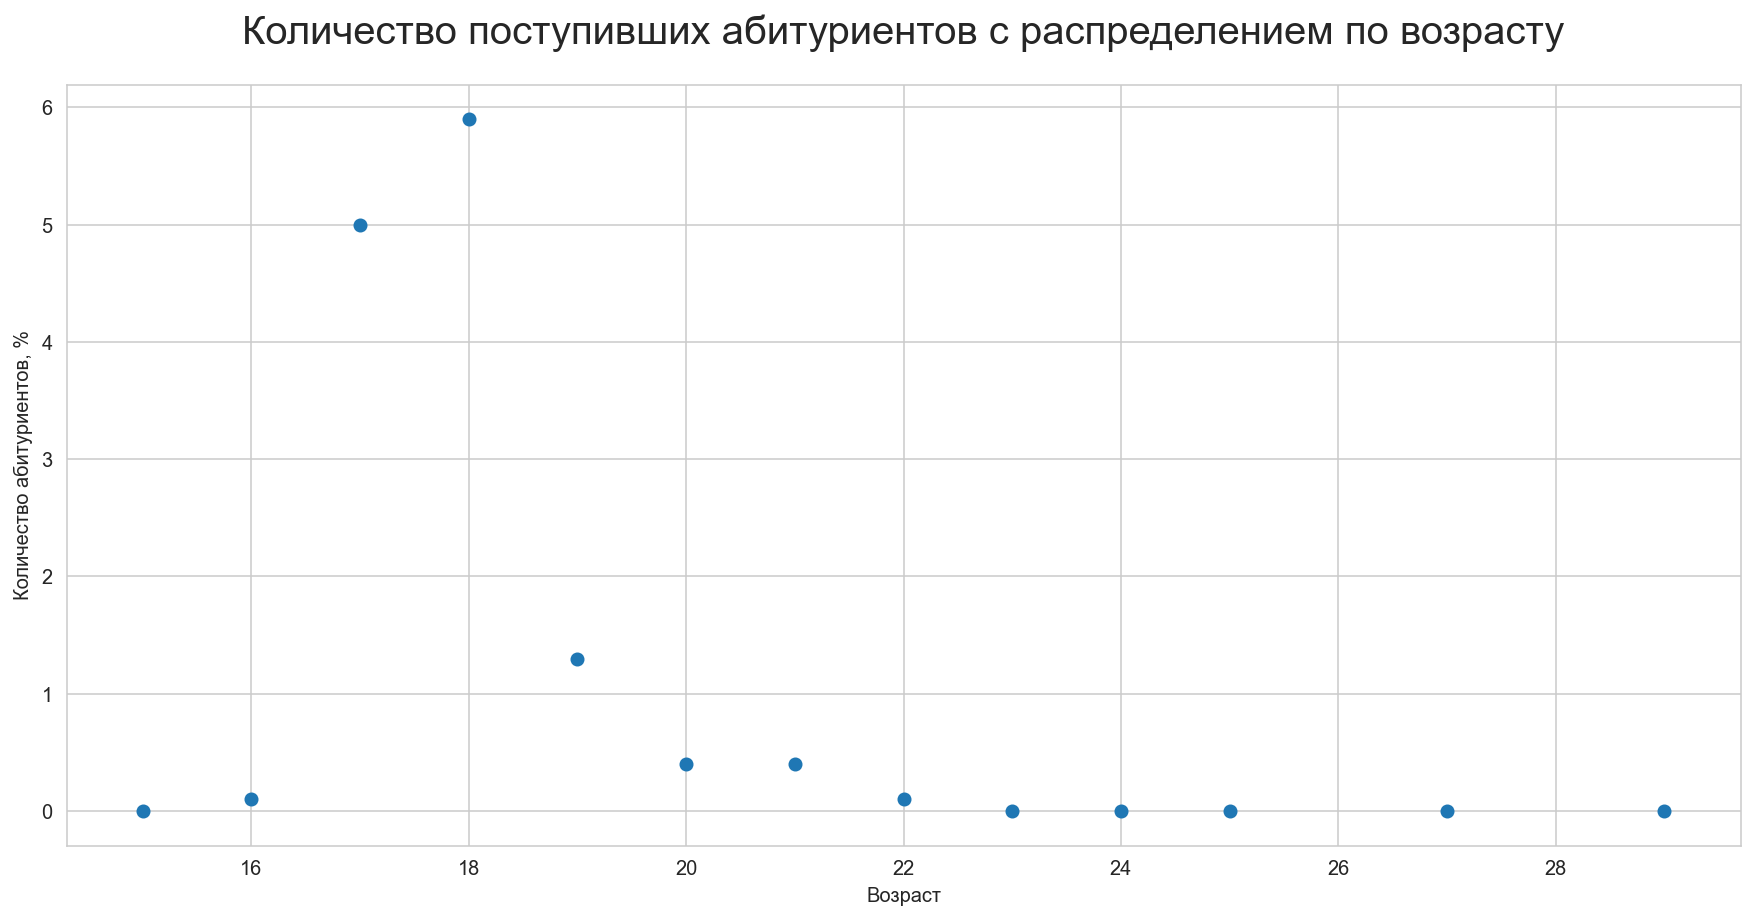

In [146]:
fig, ax = plt.subplots(figsize=(15, 7))
agg = df_contract_age['Возраст']
count_agg = df_contract_age['Процент']
plt.scatter(agg, count_agg)
plt.title('Количество поступивших абитуриентов с распределением по возрасту', fontsize= 20 , loc='center', pad =20.5)
plt.xlabel('Возраст')
plt.ylabel('Количество абитуриентов, %');

### Среди поступивших большую часть составляют абитуриенты в возрасте 17-18 лет

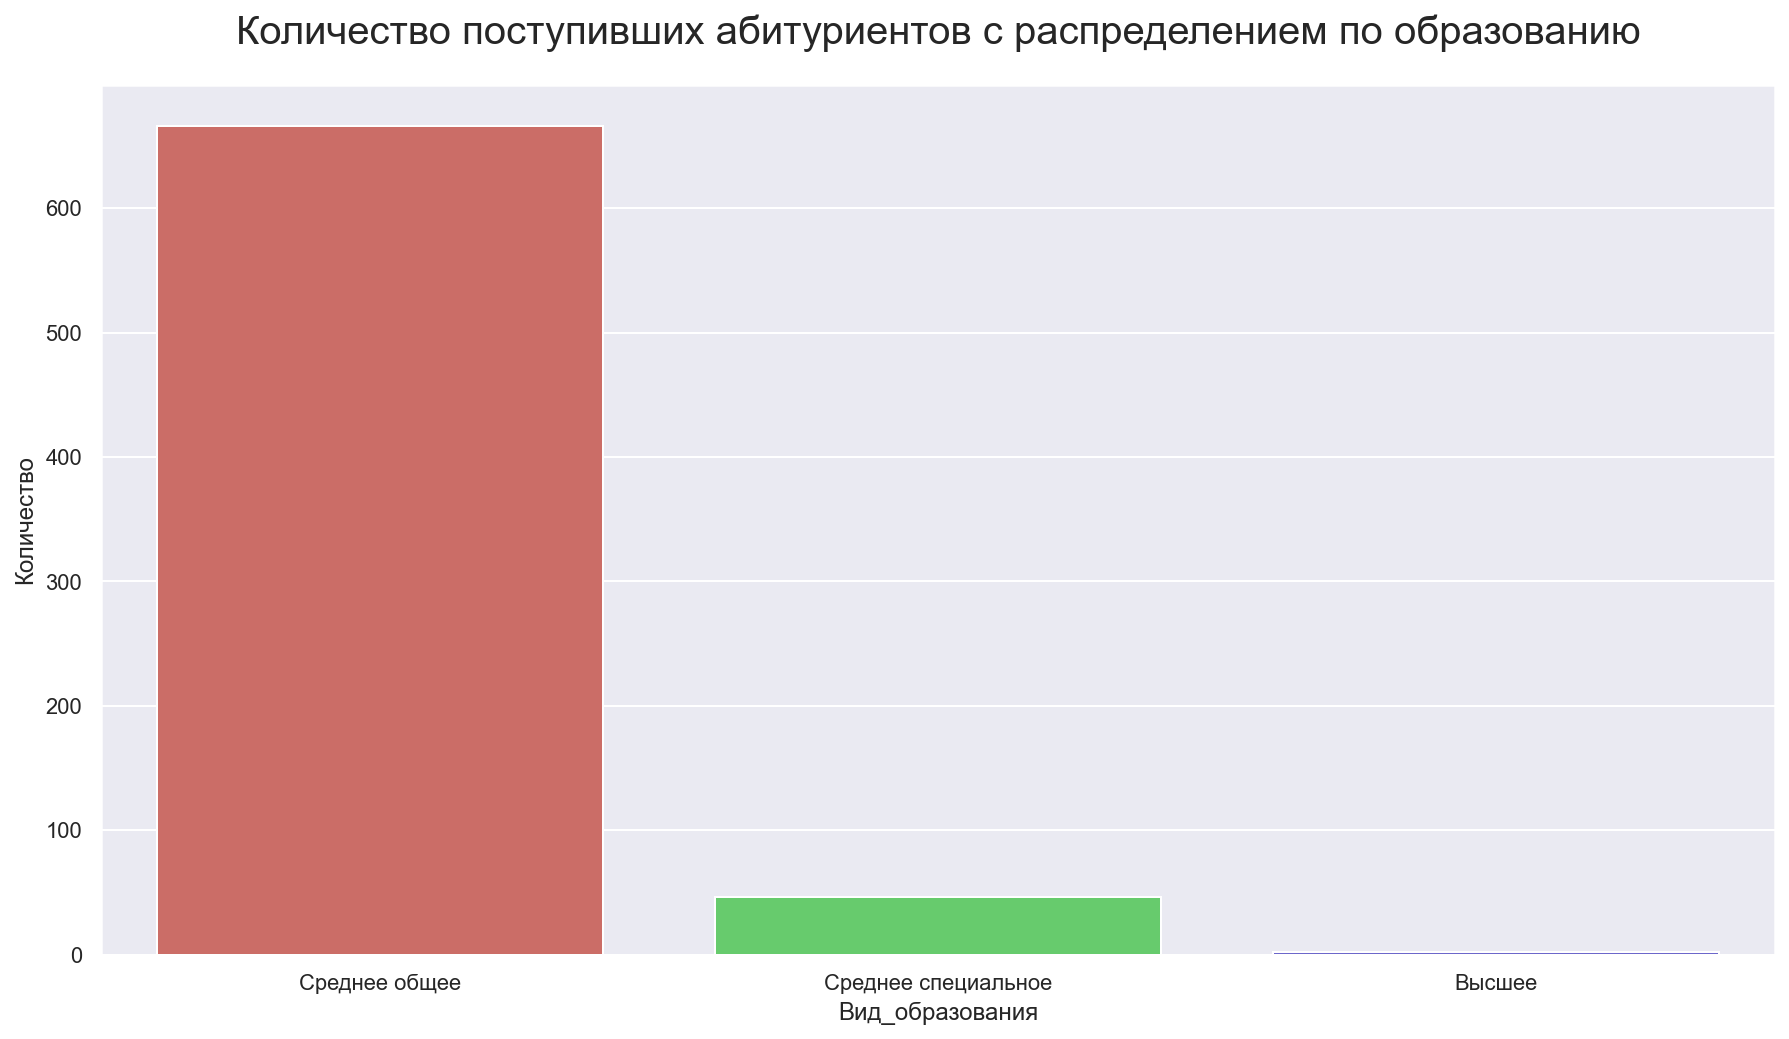

In [174]:
plt.rc('axes', titlesize = 20, titlepad = 20.5)
sns.barplot(x="Вид_образования", y="Количество", data=df_contract_education, palette='hls').set(title = 'Количество поступивших абитуриентов с распределением по образованию');

### Практически все поступившие имеют среднее общее образование

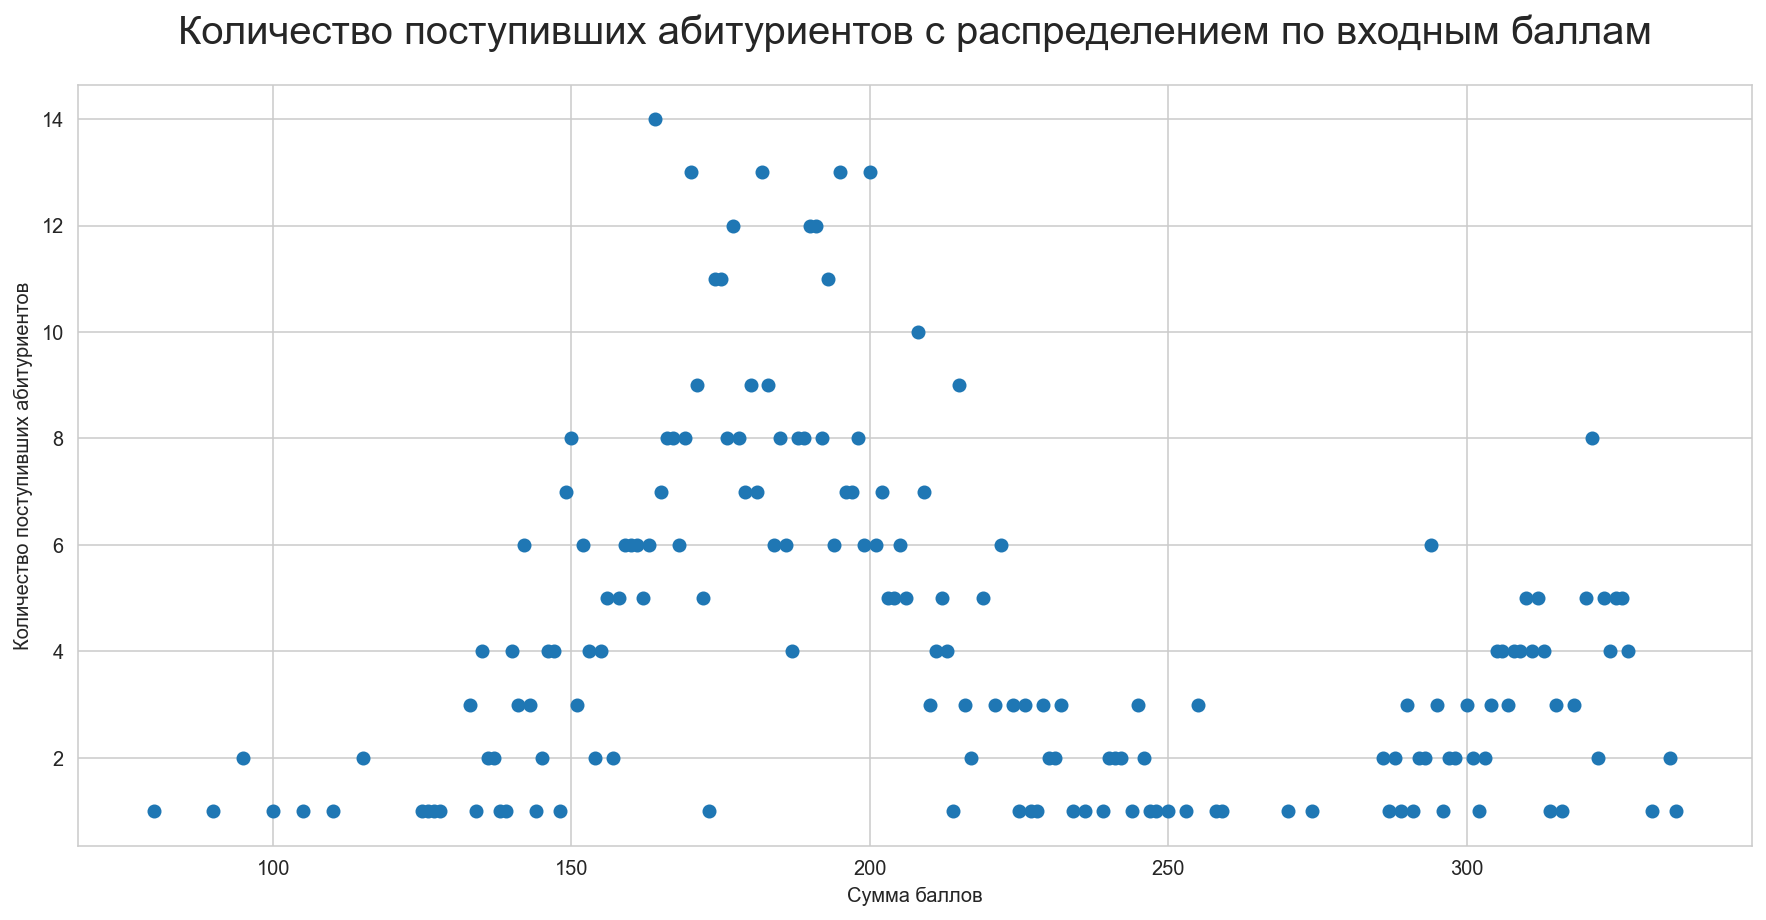

In [148]:
fig, ax = plt.subplots(figsize=(15, 7))
score = df_contract_input_score['Сумма_баллов']
count_score = df_contract_input_score['Количество']
plt.scatter(score,count_score)
plt.title('Количество поступивших абитуриентов с распределением по входным баллам', fontsize= 20 , loc='center', pad =20.5 )
plt.xlabel('Сумма баллов')
plt.ylabel('Количество поступивших абитуриентов');

### Наибольшее количество поступивших абитуриентов имели входные баллы в диапазоне 150-200 баллов

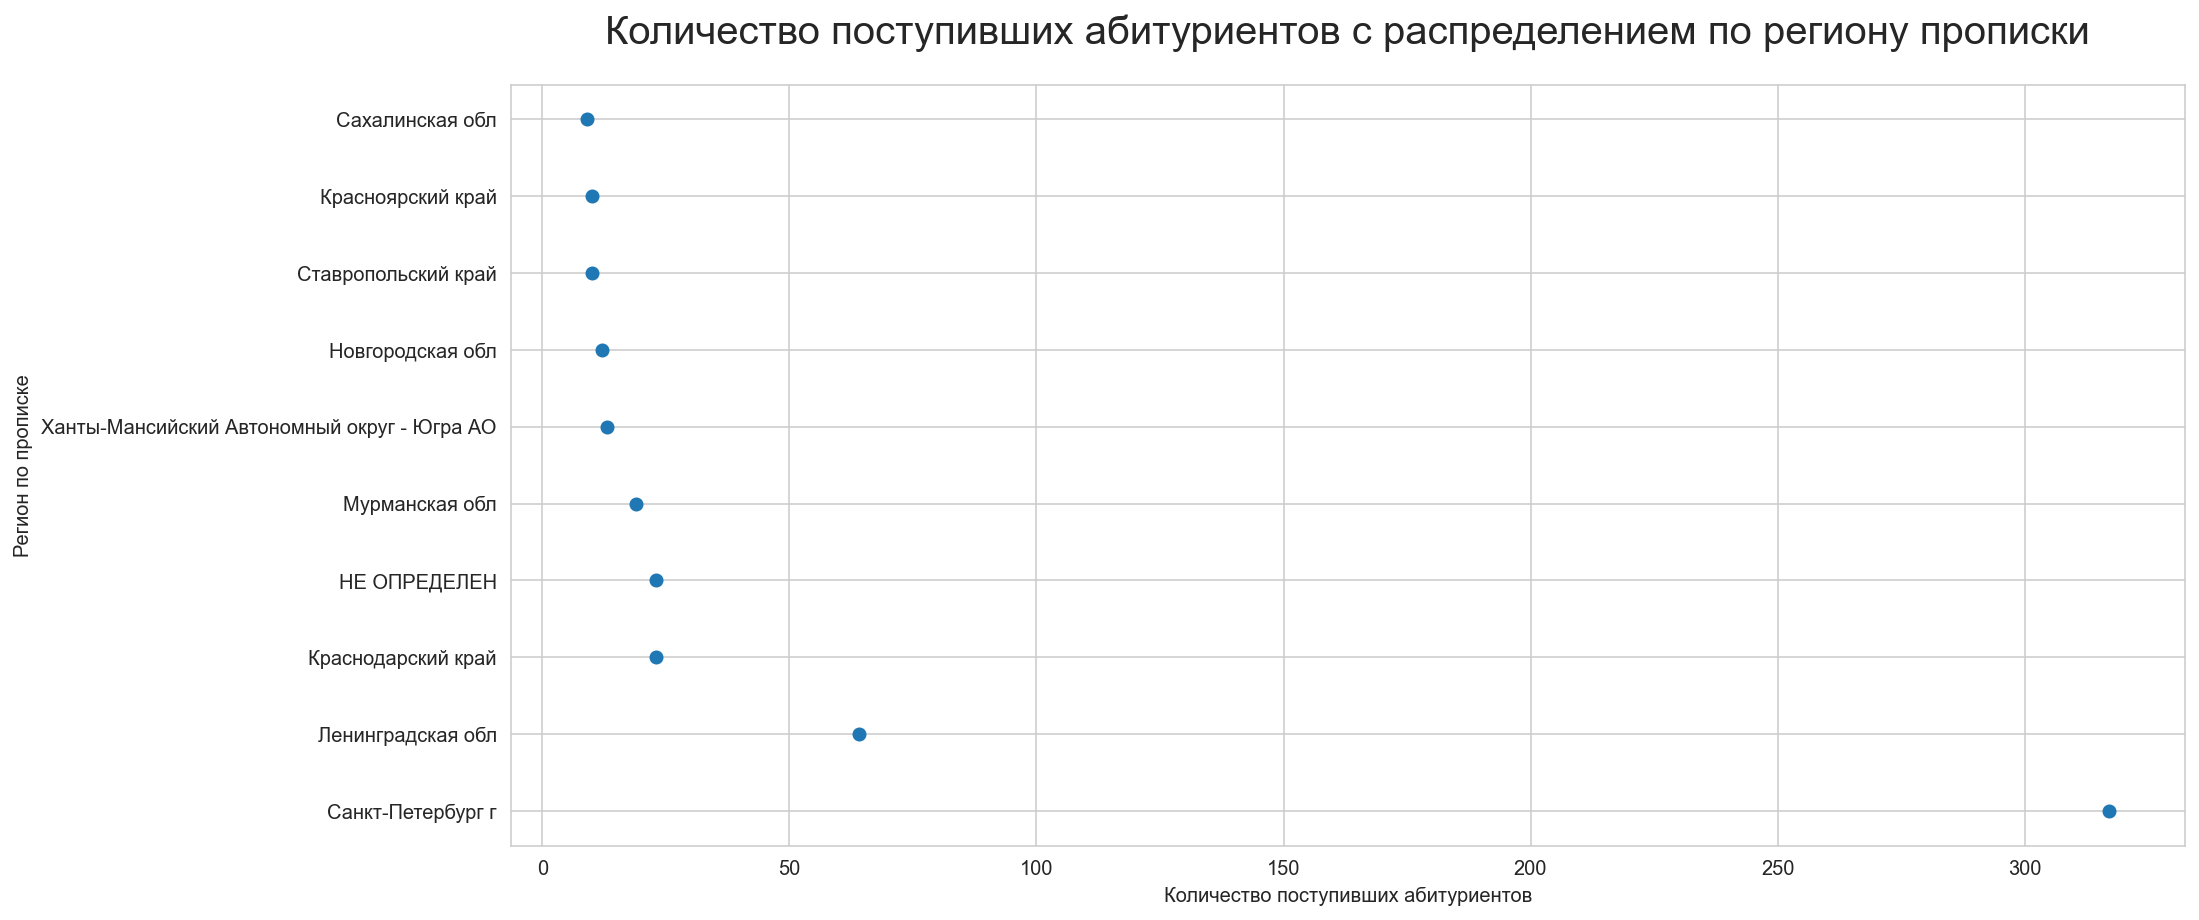

In [149]:
fig, ax = plt.subplots(figsize=(15, 7))
region = df_contract_region['Регион_по_прописке']
count_reg = df_contract_region['Количество']
plt.scatter(count_reg,region)
plt.title('Количество поступивших абитуриентов с распределением по региону прописки', fontsize= 20 , loc='center', pad =20.5 )
plt.ylabel('Регион по прописке')
plt.xlabel('Количество поступивших абитуриентов');

### Наибольшее количество поступивших абитуриентов проживают в г. Санкт-Петербург.

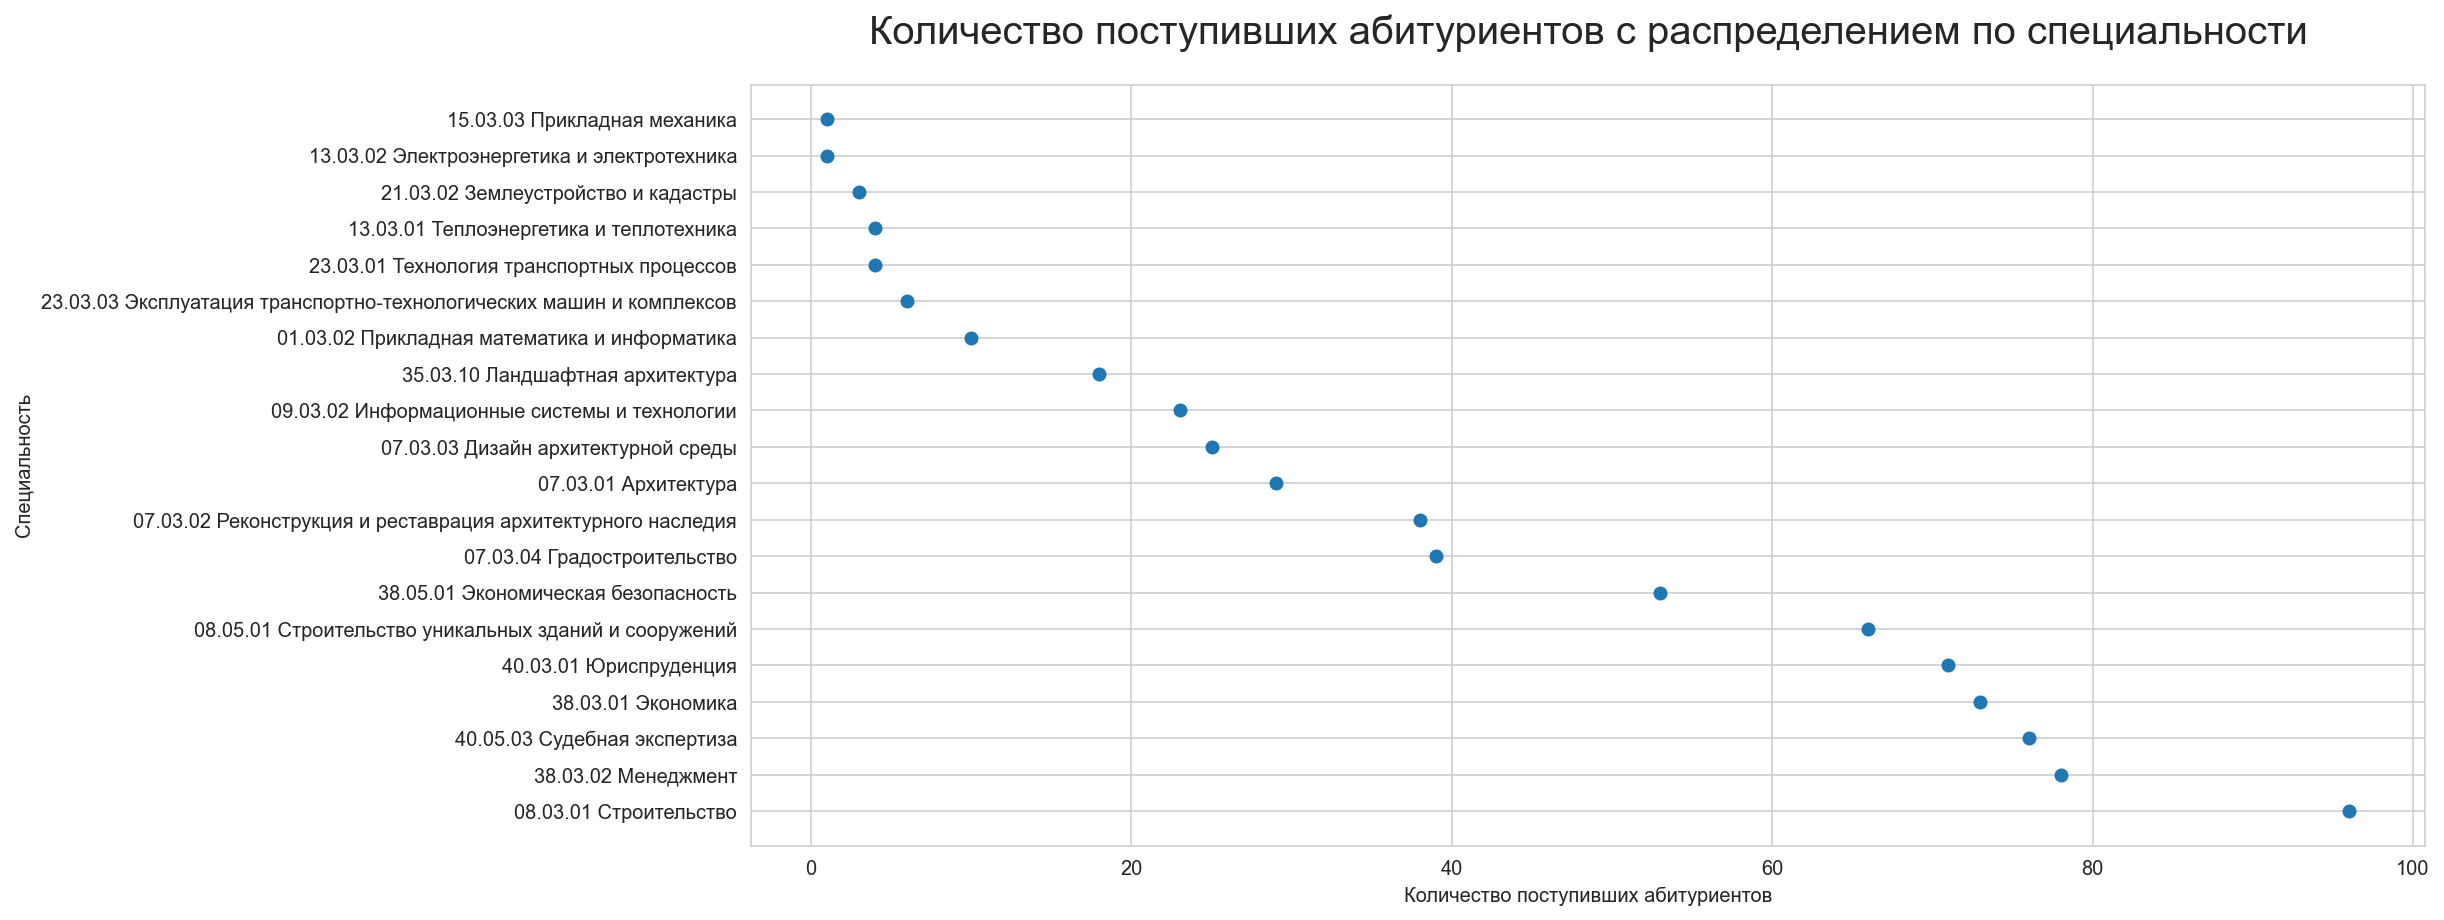

In [150]:
fig, ax = plt.subplots(figsize=(15, 7))
direction = df_contract_direction['Специальность']
count_direction = df_contract_direction['Количество']
plt.scatter(count_direction,direction)
plt.title('Количество поступивших абитуриентов с распределением по специальности', fontsize= 20 , loc='center', pad =20.5 )
plt.ylabel('Специальность')
plt.xlabel('Количество поступивших абитуриентов');

### Наибольшей популярностью среди поступивших абитуриентов пользовались специальности: 08.03.01 Строительство, 38.03.02 Менеджмент, 40.05.03 Судебная экспертиза. Самое низкое количество поступивших абитуриентов на специальностях:13.03.02 Электроэнергетика и электротехника	и 15.03.03 Прикладная механика - по одному поступившему.

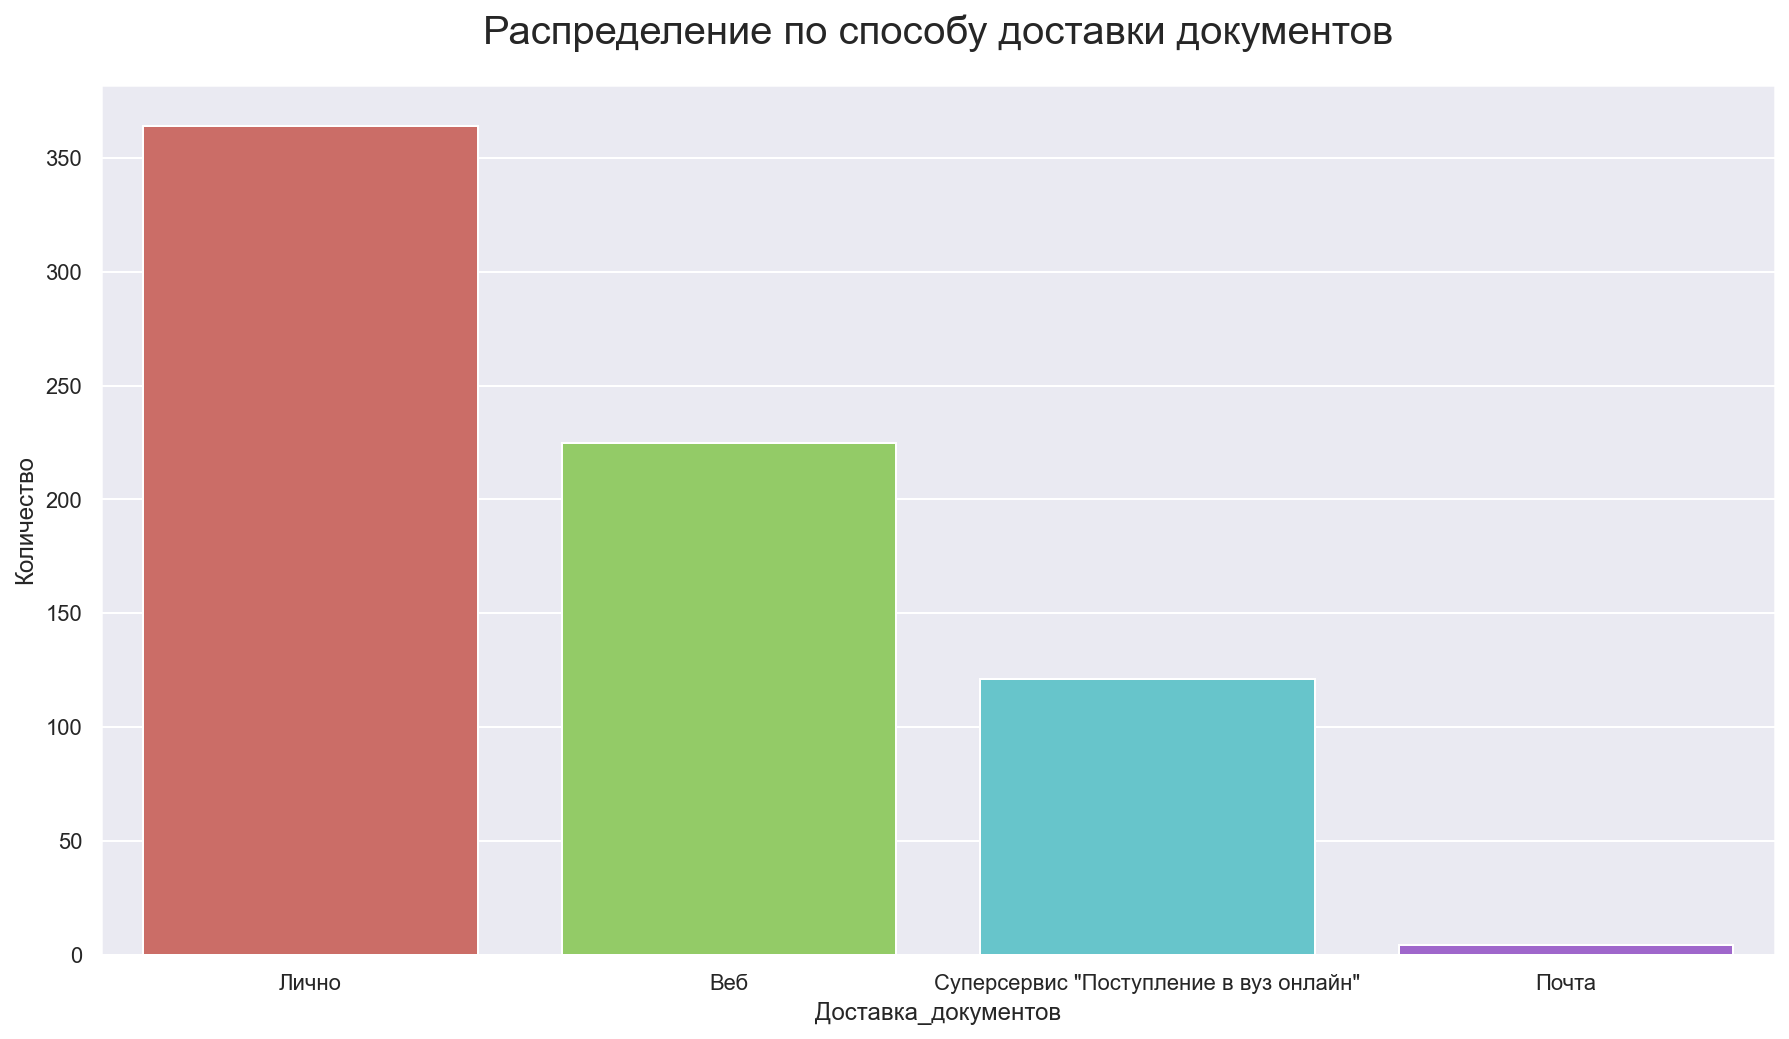

In [175]:
plt.rc('axes', titlesize = 20, titlepad = 20.5)
sns.barplot(x="Доставка_документов", y="Количество", data=df_contract_count_statements, palette='hls').set(title = 'Распределение по способу доставки документов');

### Наибольшее количество документов поступившие абитуриенты предоставляли лично.

### Анализ по не поступившим абитуриентам

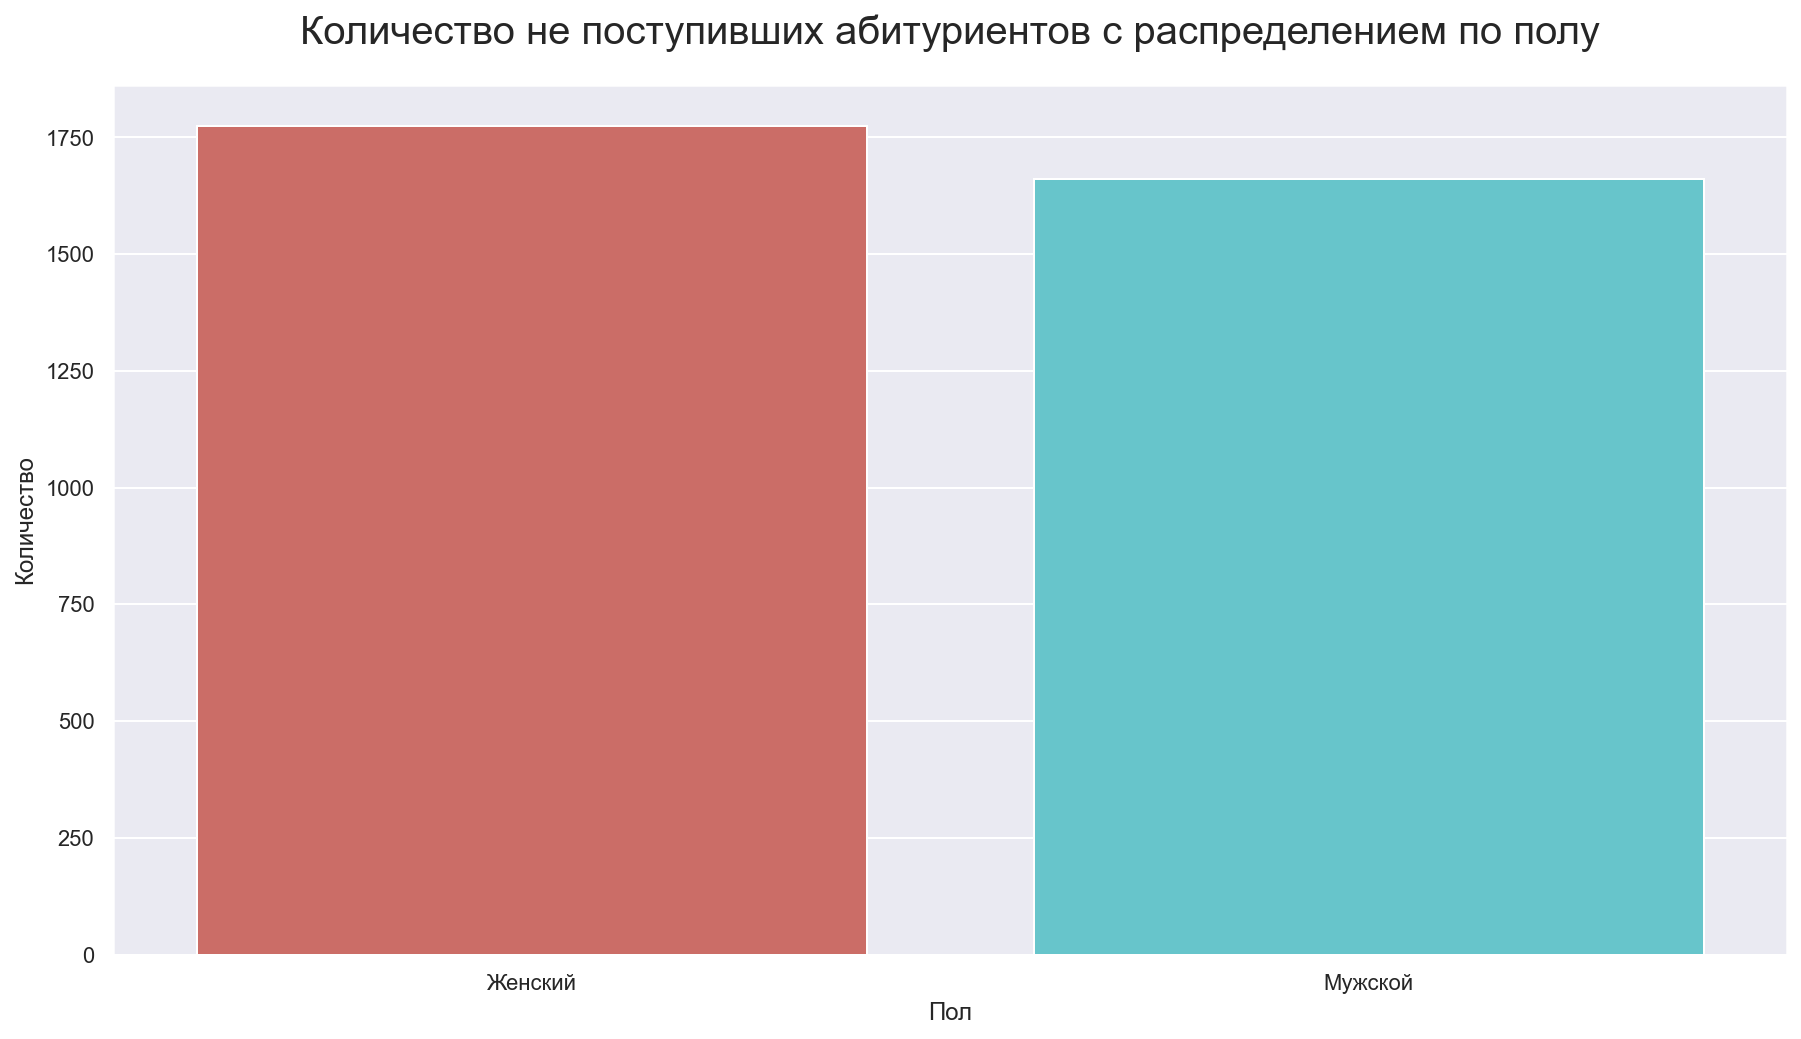

In [176]:
plt.rc('axes', titlesize = 20, titlepad = 20.5)
gr= sns.barplot(x="Пол", y="Количество", data=df_not_contract_sex, palette='hls').set(title = 'Количество не поступивших абитуриентов с распределением по полу');

### Нет значительной разницы среди не поступивших по полу.

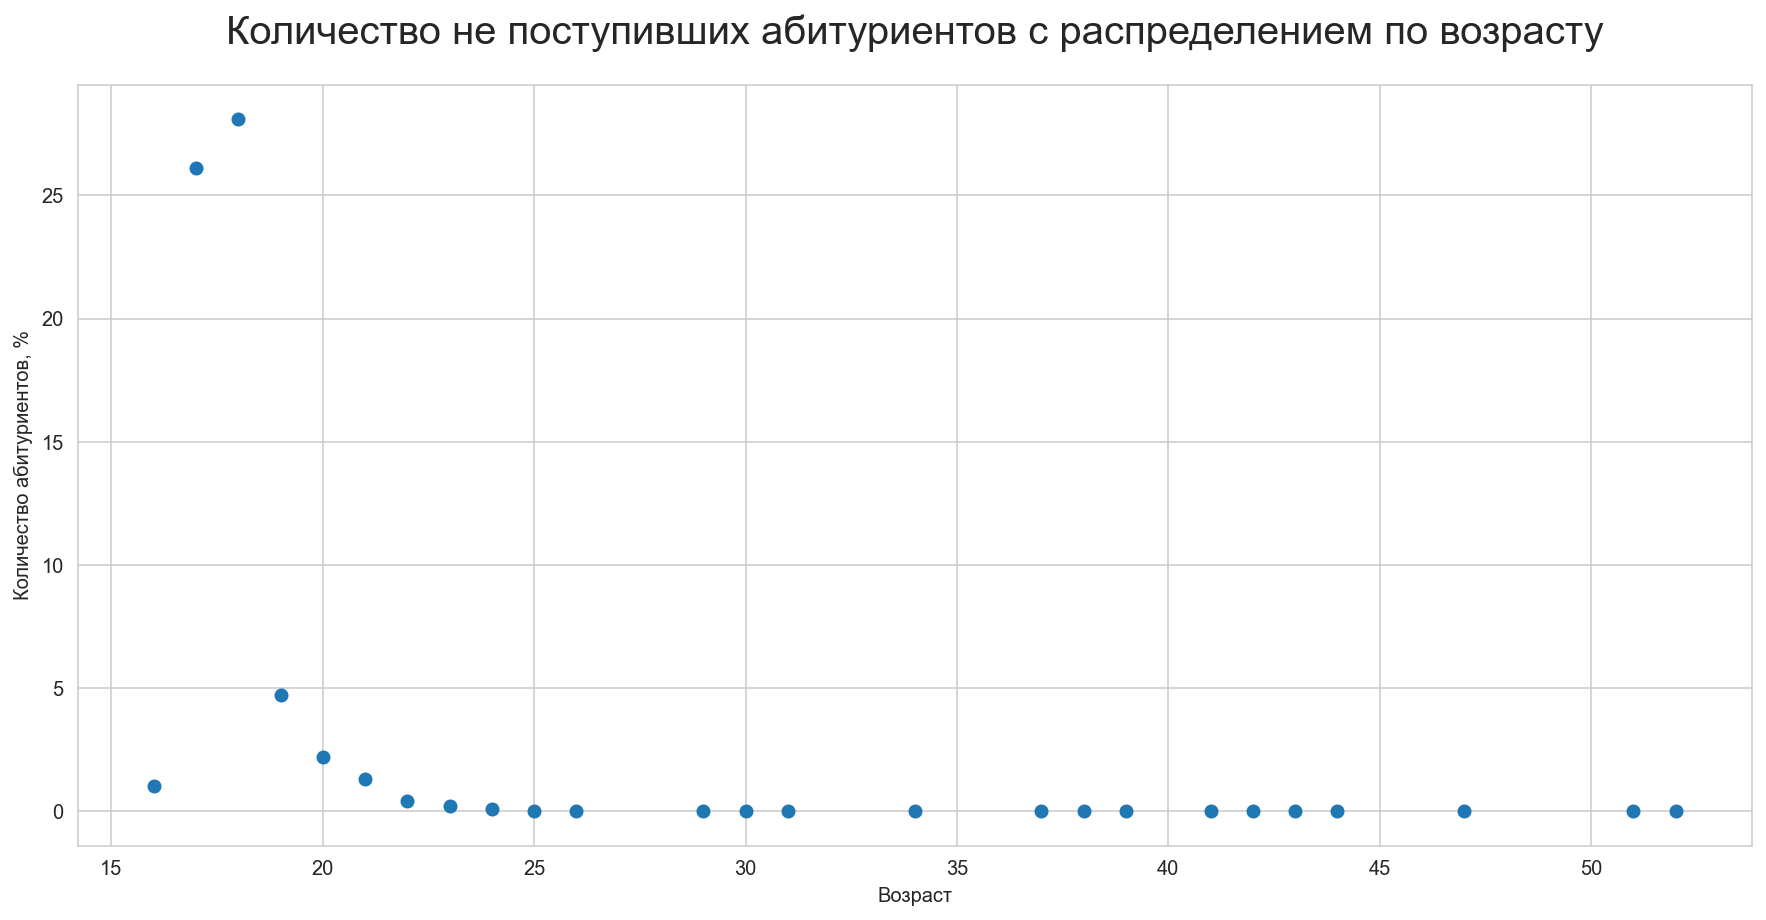

In [153]:
fig, ax = plt.subplots(figsize=(15,7))
agg = df_not_contract_age['Возраст']
count_agg = df_not_contract_age['Процент']
plt.scatter(agg, count_agg)
plt.title('Количество не поступивших абитуриентов с распределением по возрасту', fontsize= 20 , loc='center', pad =20.5)
plt.xlabel('Возраст')
plt.ylabel('Количество абитуриентов, %');

### Среди не поступивших также большее количество составляют абитуриенты 17-18 лет. Необходимо отметить, что суммарно поступавшие в возрасте 17-18 лет составляют 30-35% от общего числа абитуриентов.

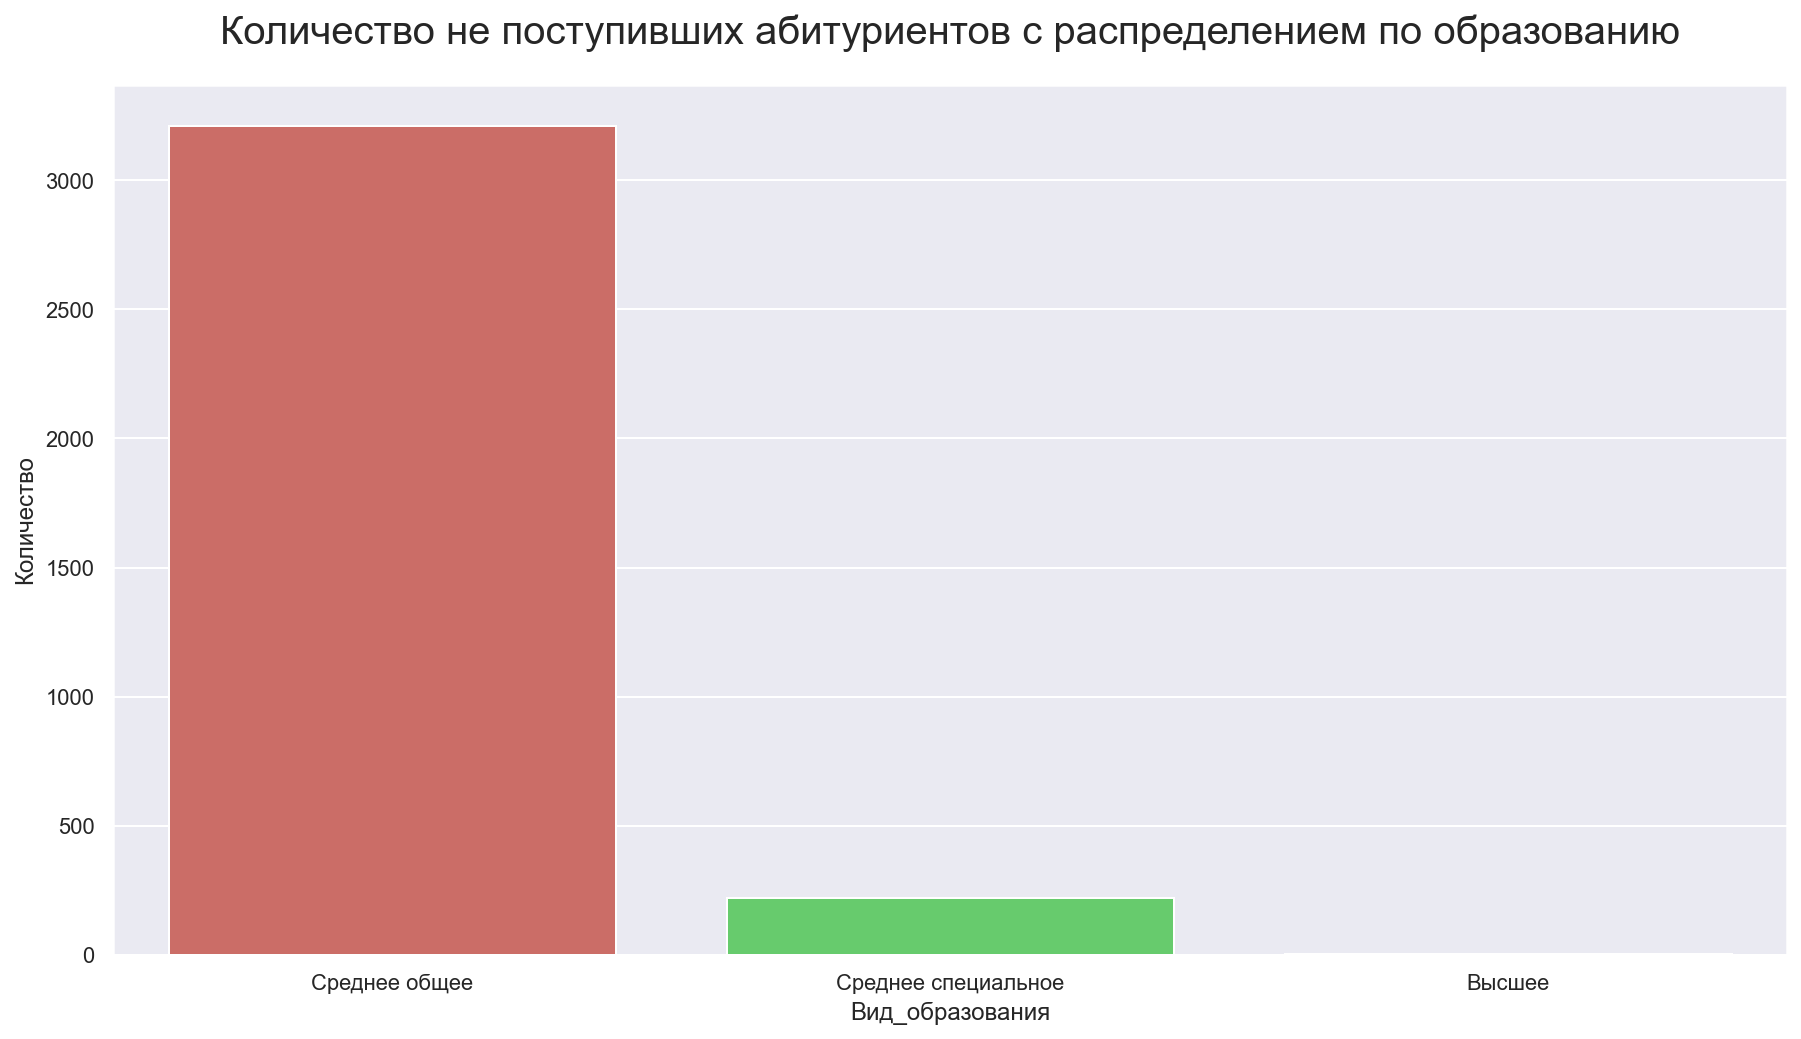

In [177]:
plt.rc('axes', titlesize = 20, titlepad = 20.5)
sns.barplot(x="Вид_образования", y="Количество", data=df_not_contract_education, palette='hls').set(title = 'Количество не поступивших абитуриентов с распределением по образованию');

### Практически все не поступившие имеют среднее общее образование

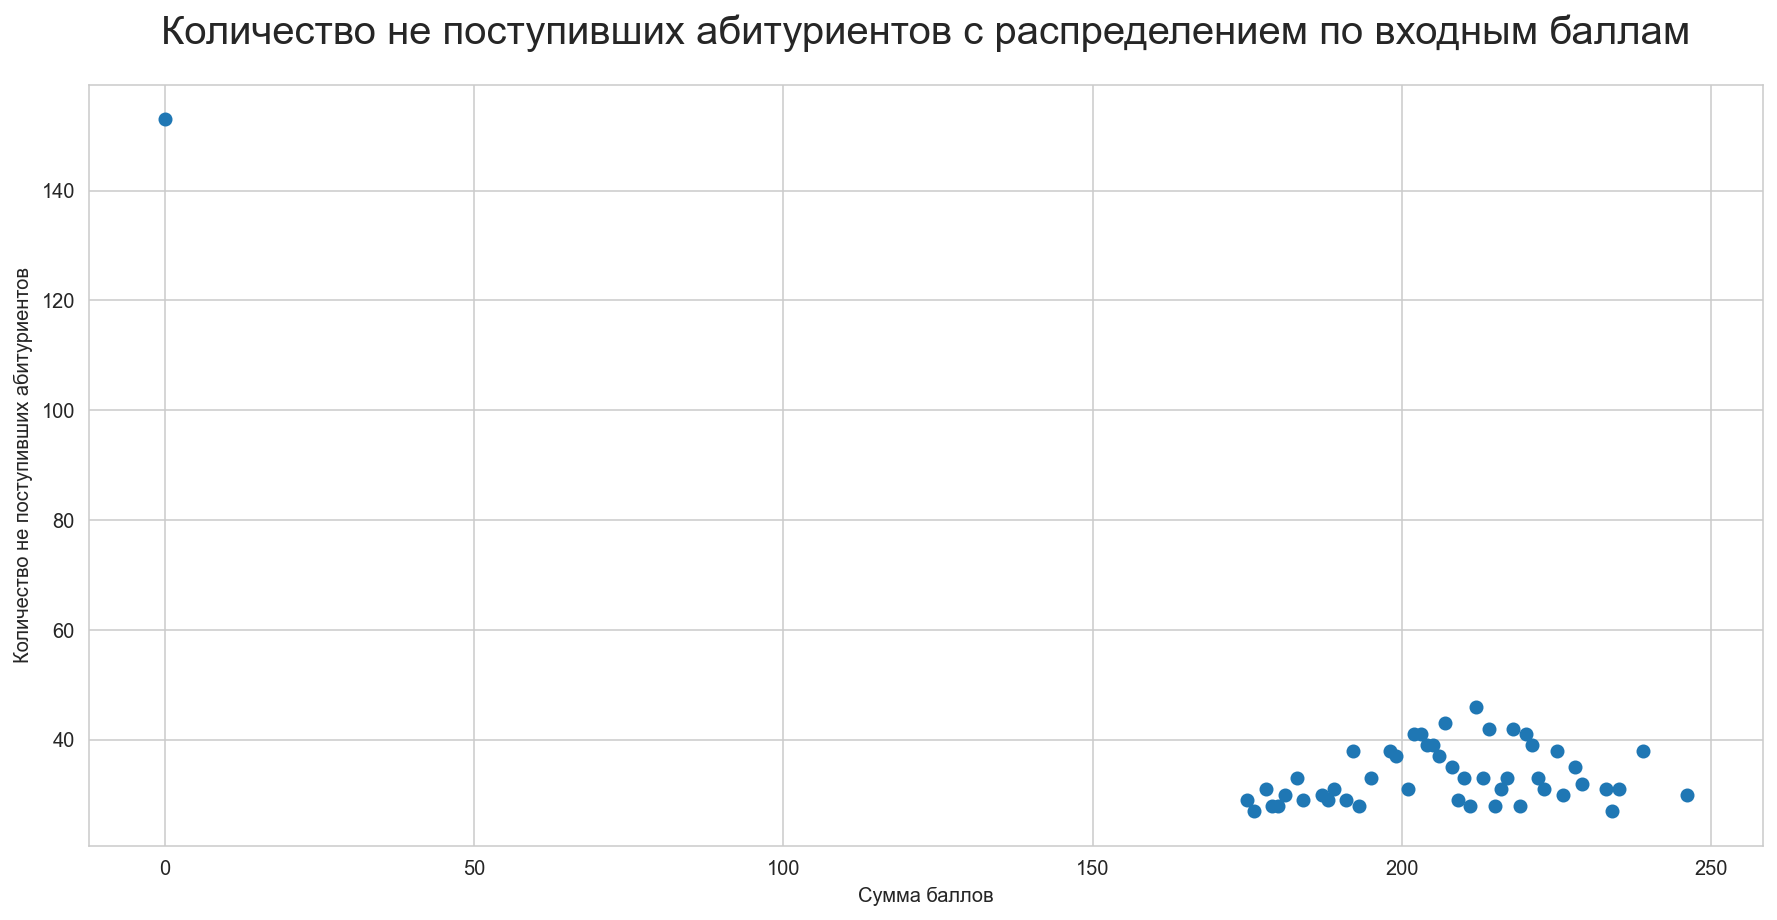

In [155]:
fig, ax = plt.subplots(figsize=(15, 7))
score = df_not_contract_input_score['Сумма_баллов']
count_score = df_not_contract_input_score['Количество']
plt.scatter(score,count_score)
plt.title('Количество не поступивших абитуриентов с распределением по входным баллам', fontsize= 20 , loc='center', pad =20.5 )
plt.xlabel('Сумма баллов')
plt.ylabel('Количество не поступивших абитуриентов');

### Наибольшее количество не поступивших абитуриентов имели сумму баллов, равную нулю.  Меньше всего из непоступивших имели сумму баллов 160-250

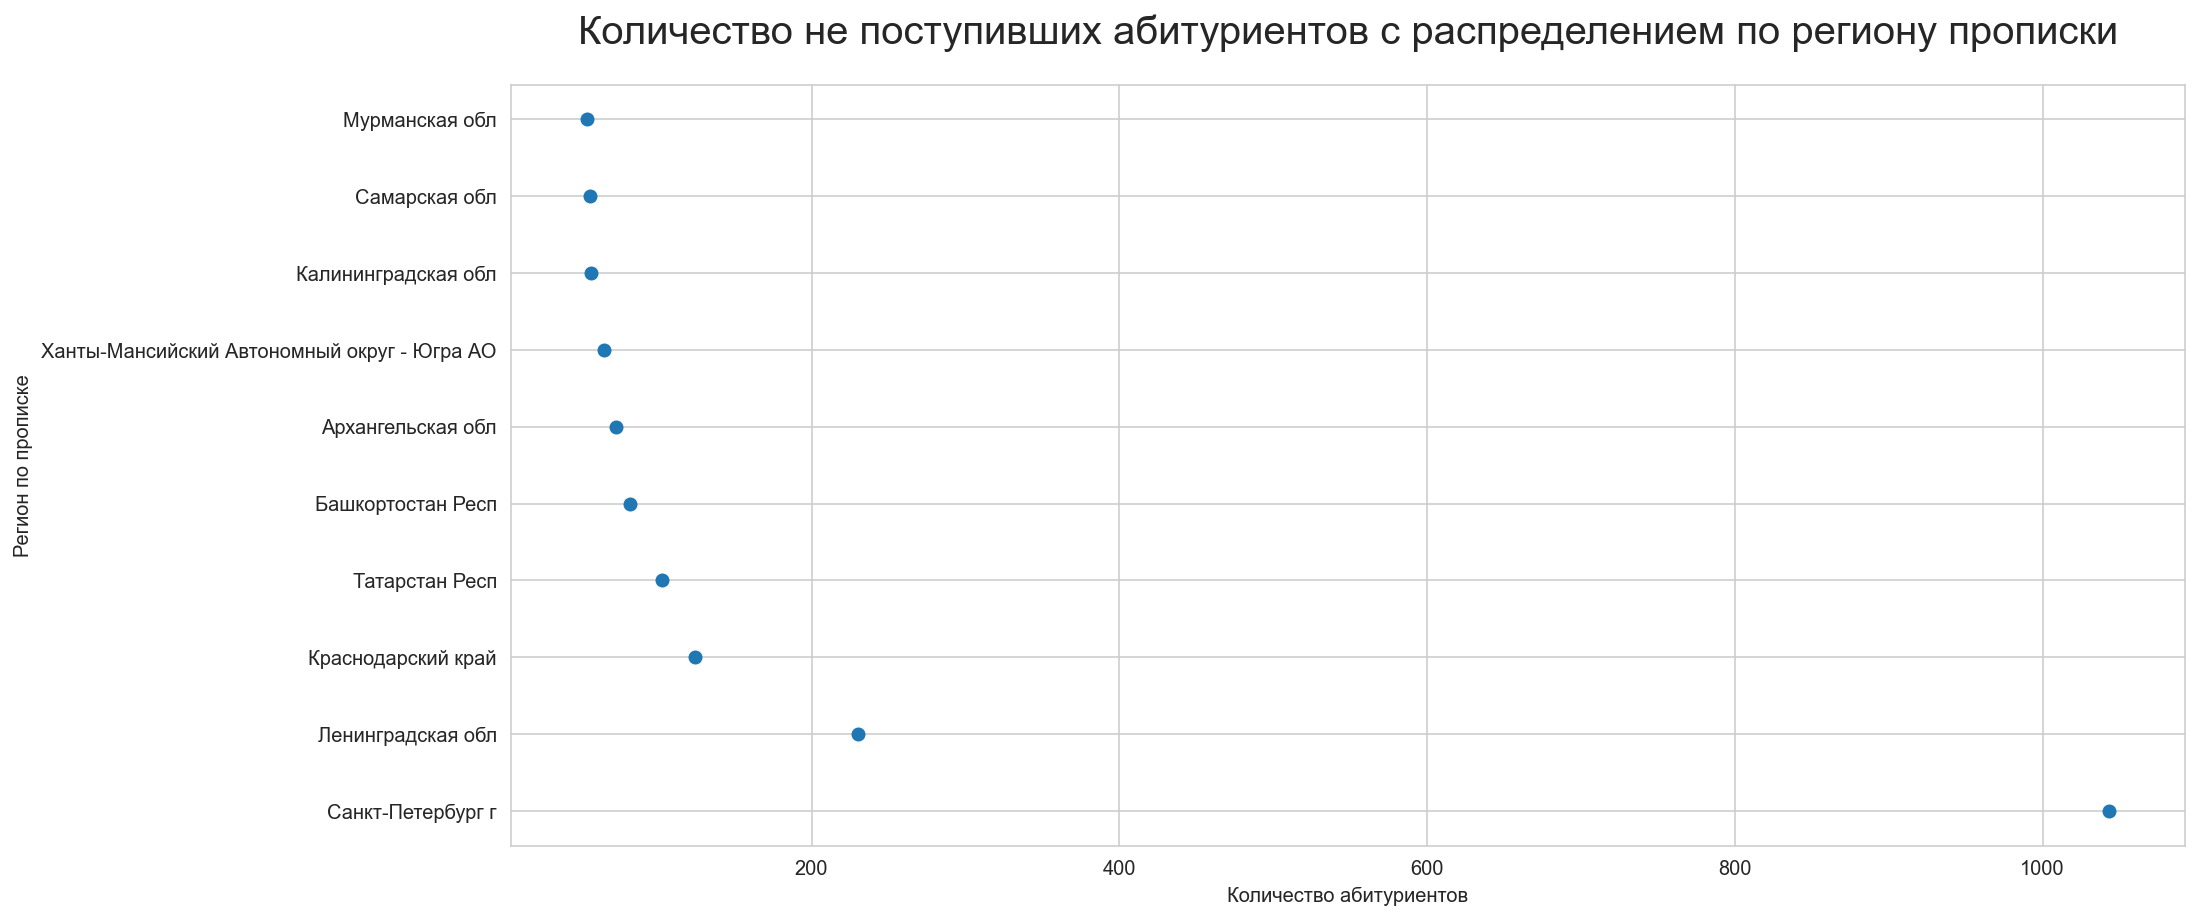

In [156]:
fig, ax = plt.subplots(figsize=(15, 7))
region = df_not_contract_region['Регион_по_прописке']
count_reg = df_not_contract_region['Количество']
plt.scatter(count_reg,region)
plt.title('Количество не поступивших абитуриентов с распределением по региону прописки', fontsize= 20 , loc='center', pad =20.5 )
plt.ylabel('Регион по прописке')
plt.xlabel('Количество абитуриентов');

### Наибольшее количество не поступивших абитуриентов проживают в г. Санкт-Петербург.

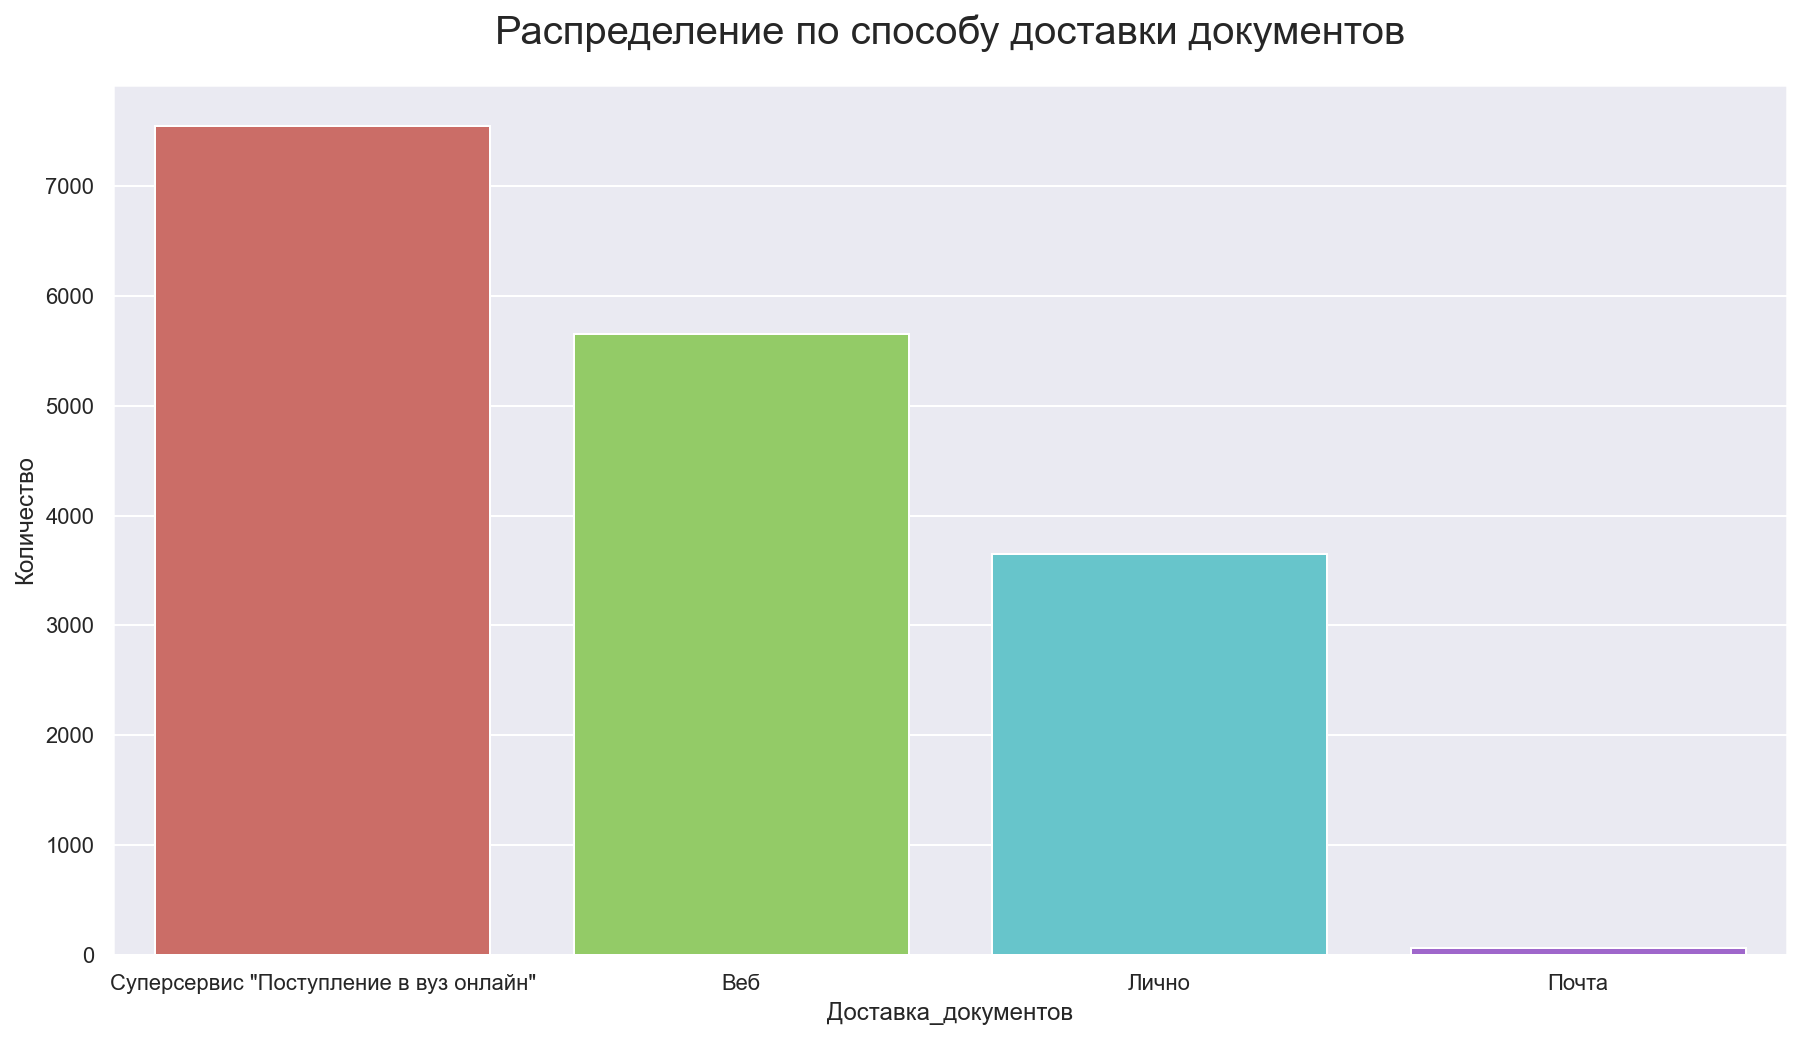

In [178]:
plt.rc('axes', titlesize = 20, titlepad = 20.5)
sns.barplot(x="Доставка_документов", y="Количество", data=df_not_contract_count_statements, palette='hls').set(title = 'Распределение по способу доставки документов');

### Наибольшее количество не поступивших абитуриентов подавали документы через Суперсервис "Поступление в вуз онлайн"

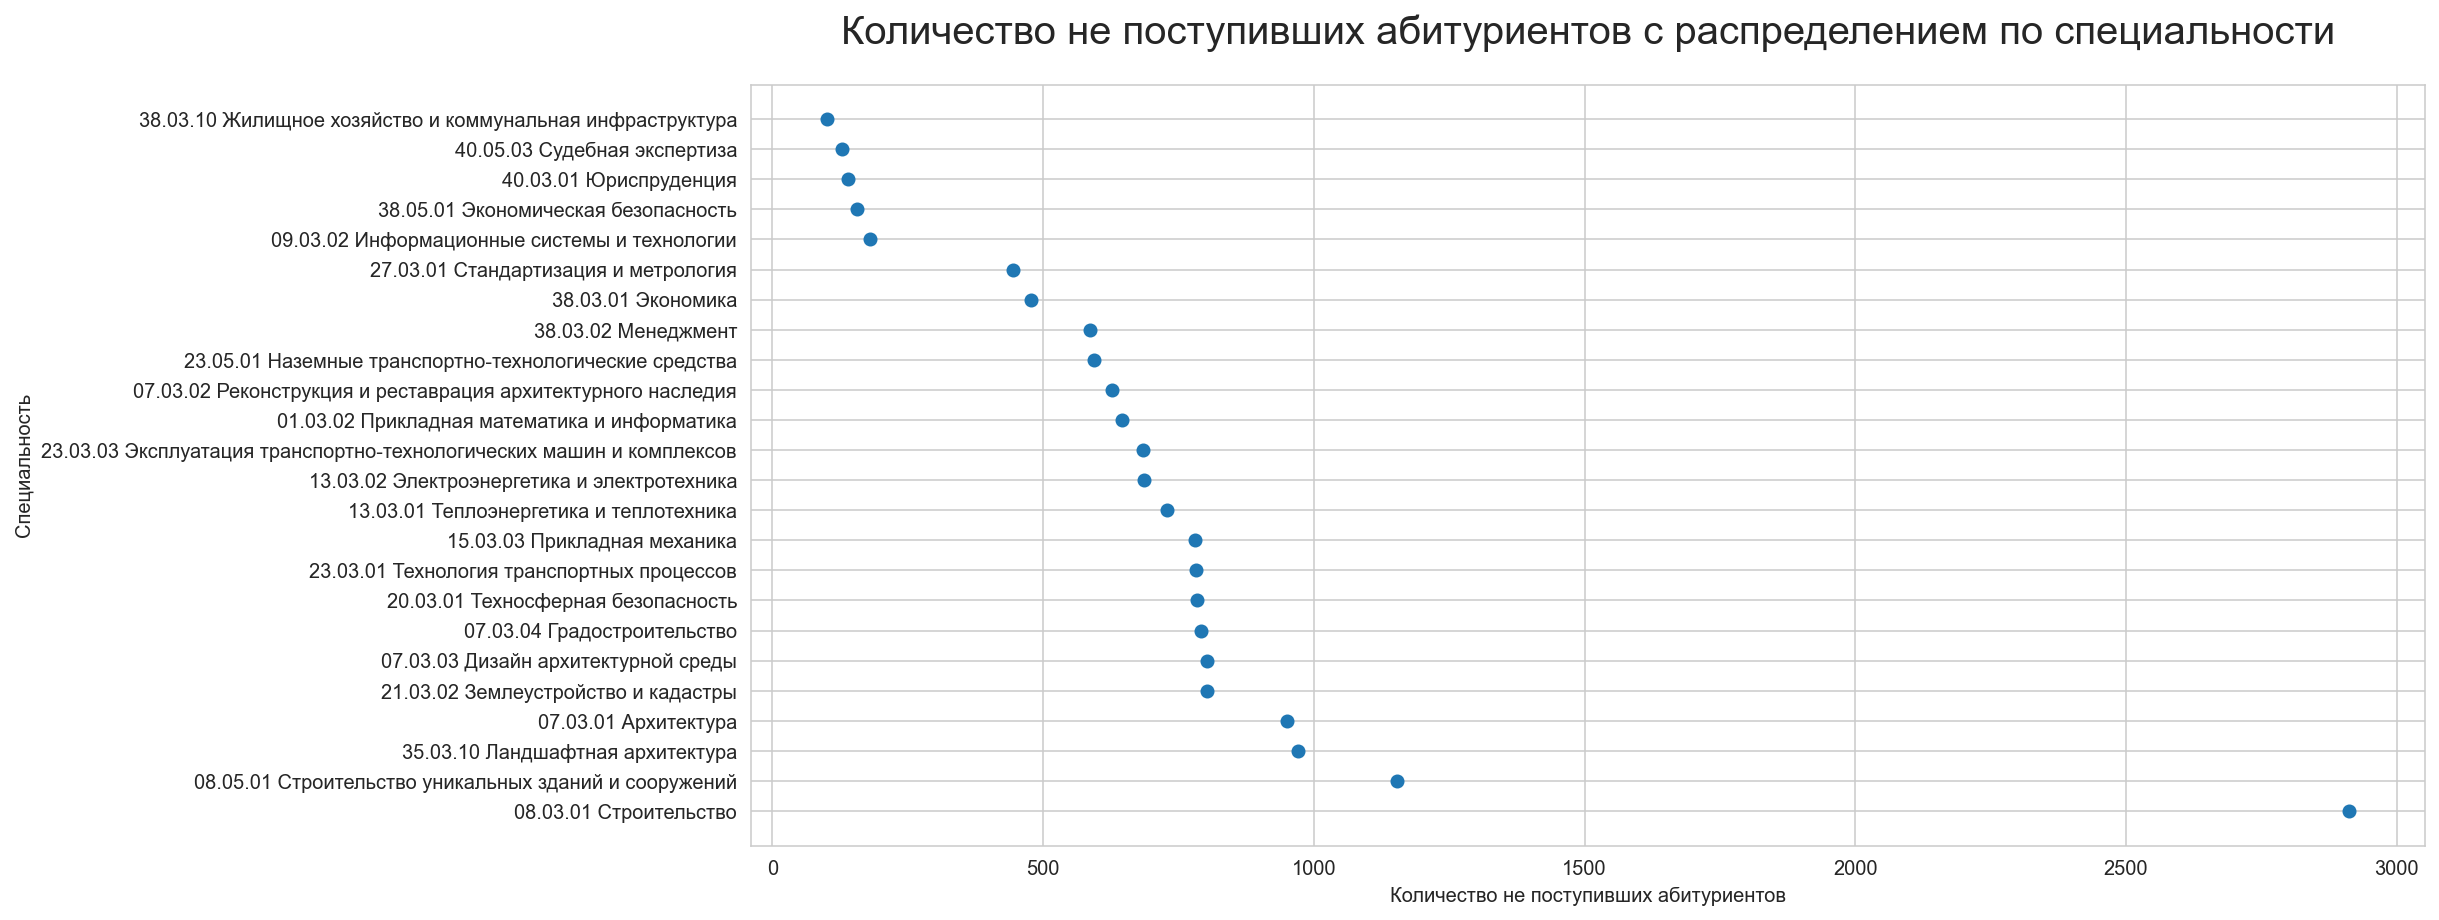

In [158]:
fig, ax = plt.subplots(figsize=(15, 7))
direction = df_not_contract_direction['Специальность']
count_direction = df_not_contract_direction['Количество']
plt.scatter(count_direction,direction)
plt.title('Количество не поступивших абитуриентов с распределением по специальности', fontsize= 20 , loc='center', pad =20.5 )
plt.ylabel('Специальность')
plt.xlabel('Количество не поступивших абитуриентов');

### Из не поступивших абитуриентов большее количество заявлений было по направлению  08.03.01 Строительство.

### Приведем часть признаков к категориальным значениям и с помощью тепловой карты рассмотрим взаимосвязь признаков

In [159]:
df_for_heatmap= df_for_heatmap = df_fulltime[['Сумма_баллов','Баллы_конкурсные','Возраст','Пол','Гражданство','Вид_образования','Основание_поступления']]
df_for_heatmap


,Сумма_баллов,Баллы_конкурсные,Возраст,Пол,Гражданство,Вид_образования,Основание_поступления
0,323,0,17.0,Женский,РОССИЯ,Среднее общее,бюджетная основа
1,323,0,17.0,Женский,РОССИЯ,Среднее общее,бюджетная основа
2,323,0,17.0,Женский,РОССИЯ,Среднее общее,бюджетная основа
3,323,0,17.0,Женский,РОССИЯ,Среднее общее,бюджетная основа
4,301,0,17.0,Женский,РОССИЯ,Среднее общее,бюджетная основа
...,...,...,...,...,...,...,...
29465,0,0,21.0,Мужской,РОССИЯ,Среднее общее,бюджетная основа
29466,0,0,21.0,Мужской,РОССИЯ,Среднее общее,бюджетная основа
29467,0,0,21.0,Мужской,РОССИЯ,Среднее общее,бюджетная основа
29468,0,0,21.0,Мужской,РОССИЯ,Среднее общее,бюджетная основа


In [160]:
df_for_heatmap = df_for_heatmap.replace({'Пол':{'Женский':1, 'Мужской':2}})


In [161]:
df_for_heatmap = df_for_heatmap.replace({'Основание_поступления':{'бюджетная основа':1, 'целевой прием':2,'полное возмещение затрат':3}})


In [162]:
df_for_heatmap = df_for_heatmap.replace({'Вид_образования':{'Среднее общее':1, 'Среднее специальное':2,'Высшее':3}})


In [163]:
df_for_heatmap = df_for_heatmap.replace({'Гражданство':{'РОССИЯ':1, 'БЕЛАРУСЬ':2,'КАЗАХСТАН':3,
                                                       'АРМЕНИЯ':4,'УЗБЕКИСТАН':5,'УКРАИНА':6,
                                                       'АЗЕРБАЙДЖАН':7,'ЙЕМЕН':8,'КИТАЙ':9,
                                                       'ТУРЦИЯ':10,'ИРАК':11,'МАРОККО':12,
                                                       'ЛАТВИЯ':13,'ТАДЖИКИСТАН':14,'РУАНДА':15,
                                                       'АЛЖИР':16,'ГРУЗИЯ':17,'МОЛДОВА':18,
                                                       'ЭСТОНИЯ':19,'КИРГИЗИЯ':20,'ТУРКМЕНИЯ':21,
                                                       'ИРАН':22,'АФГАНИСТАН':23,
                                                       'САУДОВСКАЯ АРАВИЯ':24,'НЕ ОПРЕДЕЛЕНО':25}})


In [164]:
df_for_heatmap

,Сумма_баллов,Баллы_конкурсные,Возраст,Пол,Гражданство,Вид_образования,Основание_поступления
0,323,0,17.0,1,1,1,1
1,323,0,17.0,1,1,1,1
2,323,0,17.0,1,1,1,1
3,323,0,17.0,1,1,1,1
4,301,0,17.0,1,1,1,1
...,...,...,...,...,...,...,...
29465,0,0,21.0,2,1,1,1
29466,0,0,21.0,2,1,1,1
29467,0,0,21.0,2,1,1,1
29468,0,0,21.0,2,1,1,1


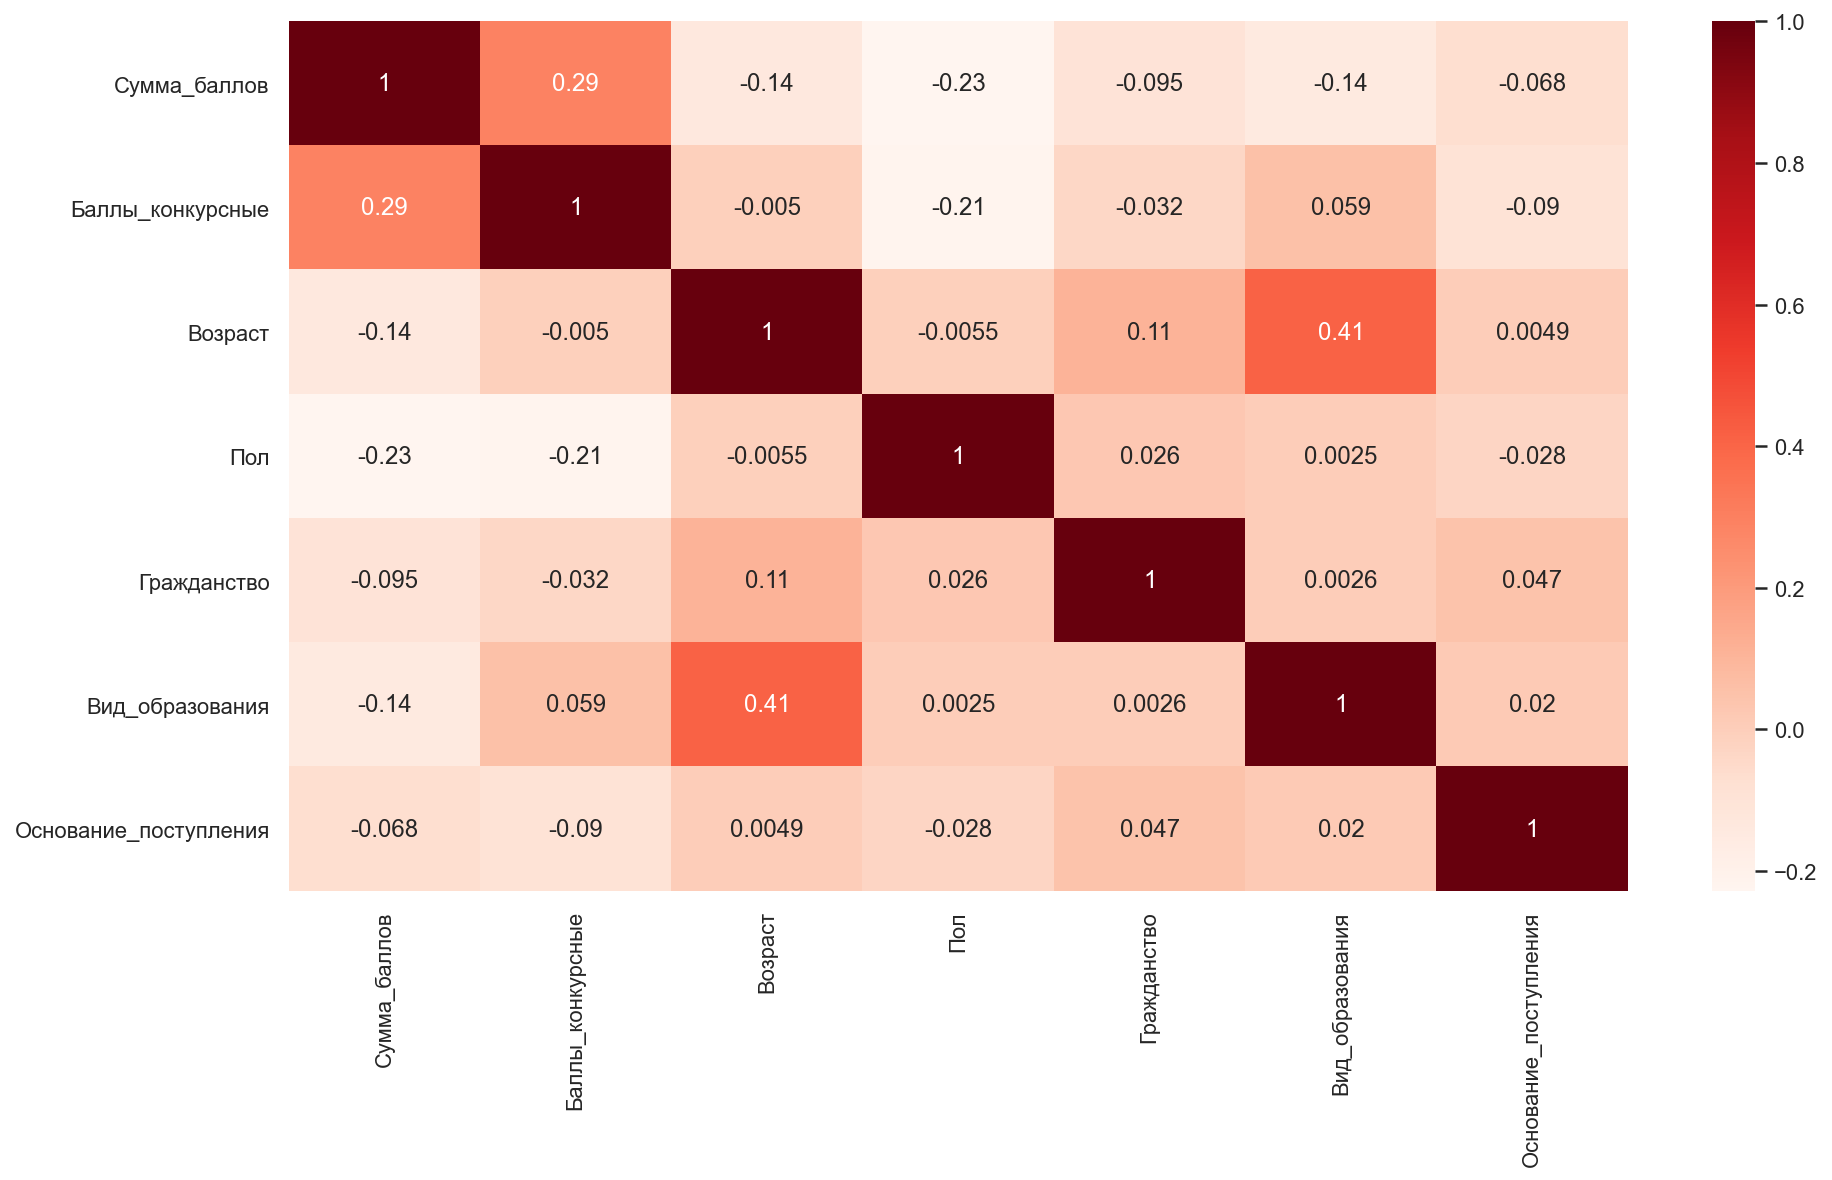

In [165]:
corr = df_for_heatmap.corr()
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(corr, cmap="Reds", annot = True);

### С помощью тепловой карты можно сделать вывод об отсутсвии значимых взаимосвязей между категориальными признаками.